start_point: 1937644

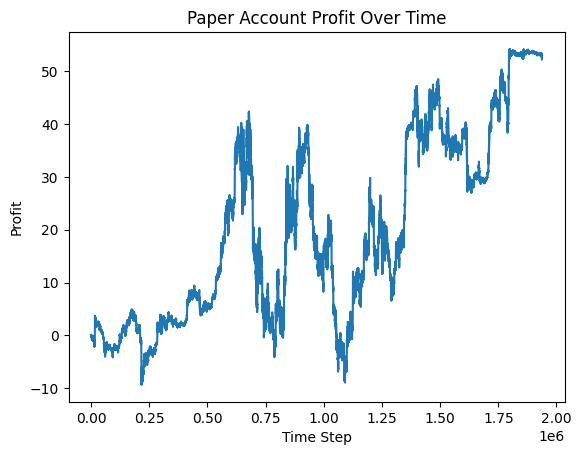

In [7]:
# for 100K model

import pandas as pd
import numpy as np
import pandas as pd
from Get_balance import get_free_btc, get_free_usd, get_free_usdt
from joblib import dump, load
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import matplotlib.pyplot as plt

n_steps = 30

delta_t_trading = 60

historic_data_input_filename = "../Prediction_Model/LSTM/BTCUSDT4Y1MKline_cleaned_24features_nSteps"+str(n_steps)+".csv"
historic_df = pd.read_csv(historic_data_input_filename)
historic_df=historic_df[['Open Time','Close', 'Volume']]

model_parameters_file = '../Prediction_Model/GradientBoosting/GB_model_data_100K_parameters_10000_1000_2_1_10_10.pkl'

paper_trading=True
symbol = 'BTC/USDT'
Exchange_Comission=0
position_ratio=0.02
quantity=0
paper_account_profit=0
type="MARKET"
trade_approved = False
num_approved_trades=0
trade_comission=0

def fetch_historic_data(start, end):
    return historic_df[start : end].copy()

model = GradientBoostingRegressor(n_estimators=10000,  
                                  max_depth=1000,      
                                  min_samples_split=2,
                                  learning_rate=1, 
                                  min_samples_leaf=10,
                                  n_iter_no_change=10, 
                                  loss='squared_error')

model = joblib.load(model_parameters_file)

def trade_evaluation():

    global num_approved_trades

    side=None

    if paper_trading==True:
        U=1
        BTC_balance=0.00193116*U
        USDT_balance=47.79670558*U
    
    elif paper_trading==False:
        BTC_balance=get_free_btc()
        USDT_balance=get_free_usdt()

    
    # position ratio: 0.02
    # BTC_balance=0.00193116

    quantity_long=position_ratio*BTC_balance
    quantity_short=position_ratio*USDT_balance/current_price

    price_gap_percent=abs((predicted_price-current_price)/current_price*100)

    trade_comission_long=0
    trade_comission_short=0

    potential_profit_long=(predicted_price-current_price)*quantity_long
    potential_profit_short=-(predicted_price-current_price)*quantity_short

    if potential_profit_long > (trade_comission_long):
        side="BUY"
        trade_approved=True
        num_approved_trades+=1

    elif potential_profit_short> (trade_comission_short):
        side='SELL'
        trade_approved=True
        num_approved_trades+=1

    else:
        side='None'
        trade_approved=False


    if side=='BUY':
        quantity=quantity_long
        trade_comission=trade_comission_long
    elif side=='SELL':
        quantity=quantity_short
        trade_comission=trade_comission_short
    else:
        quantity=0
        trade_comission=0

    return trade_approved, side, quantity

prediction = []

# start_point = len(historic_df) - 5000
# end_point = start_point + n_steps + 1
start_point = 0
end_point = start_point + n_steps + 1
iteration_step = 1

paper_account_profit_list = []

while end_point < len(historic_df) and (end_point + 2 * delta_t_trading < len(historic_df)):

    df = fetch_historic_data(start_point, end_point) 
    df=df[['Open Time','Close', 'Volume']]

    predicting_index = df.columns.get_loc('Close')

    current_price = float(df.iloc[-1]['Close'])

    scaled_data = df.values

    X = []
    for i in range(n_steps, len(scaled_data)):
        X.append(scaled_data[i - n_steps:i])
    X = np.array(X)

    n_features = X.shape[2]
    X = X.reshape((X.shape[0], X.shape[1], n_features))

    # flatten input
    n_input = X.shape[1] * X.shape[2]
    X_flat = X.reshape((X.shape[0], n_input))

    predicted_price = model.predict(X_flat)

    trade_approved, side, quantity = trade_evaluation()

    if trade_approved:
        
        if paper_trading==True:

            if side=='SELL':

                sold_price=float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                SecTrade_bought_price=float(fetch_historic_data(end_point + delta_t_trading, end_point + 2*delta_t_trading).iloc[-1]['Close'])
                paper_account_profit+=(-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))

            elif side=='BUY':

                purchased_price=float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                SecTrade_sold_price=float(fetch_historic_data(end_point + delta_t_trading, end_point + 2*delta_t_trading).iloc[-1]['Close'])
                paper_account_profit+=(+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                
    paper_account_profit_list.append(paper_account_profit)

    start_point += iteration_step
    end_point += iteration_step
    print("\rstart_point: {}".format(start_point), end="")

plt.plot(paper_account_profit_list)
plt.title('Paper Account Profit Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

profit_df = pd.DataFrame(paper_account_profit_list, columns=['Profit'])
profit_df.to_csv('profit_over_time.csv', index=False)

start_point: 1937644

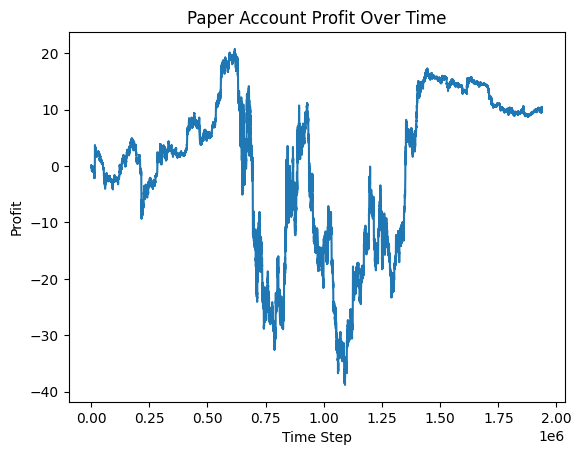

In [1]:
# for 500K model

import pandas as pd
import numpy as np
import pandas as pd
from Get_balance import get_free_btc, get_free_usd, get_free_usdt
from joblib import dump, load
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import matplotlib.pyplot as plt

n_steps = 30

delta_t_trading = 60

historic_data_input_filename = "../Prediction_Model/LSTM/BTCUSDT4Y1MKline_cleaned_24features_nSteps"+str(n_steps)+".csv"
historic_df = pd.read_csv(historic_data_input_filename)
historic_df=historic_df[['Open Time','Close', 'Volume']]

model_parameters_file = '../Prediction_Model/GradientBoosting/GB_model_data_500K_parameters_10000_1000_2_1_10_10.pkl'

paper_trading=True
symbol = 'BTC/USDT'
Exchange_Comission=0
position_ratio=0.02
quantity=0
paper_account_profit=0
type="MARKET"
trade_approved = False
num_approved_trades=0
trade_comission=0

def fetch_historic_data(start, end):
    return historic_df[start : end].copy()

model = GradientBoostingRegressor(n_estimators=10000,  
                                  max_depth=1000,      
                                  min_samples_split=2,
                                  learning_rate=1, 
                                  min_samples_leaf=10,
                                  n_iter_no_change=10, 
                                  loss='squared_error')

model = joblib.load(model_parameters_file)

def trade_evaluation():

    global num_approved_trades

    side=None

    if paper_trading==True:
        U=1
        BTC_balance=0.00193116*U
        USDT_balance=47.79670558*U
    
    elif paper_trading==False:
        BTC_balance=get_free_btc()
        USDT_balance=get_free_usdt()

    
    # position ratio: 0.02
    # BTC_balance=0.00193116

    quantity_long=position_ratio*BTC_balance
    quantity_short=position_ratio*USDT_balance/current_price

    price_gap_percent=abs((predicted_price-current_price)/current_price*100)

    trade_comission_long=0
    trade_comission_short=0

    potential_profit_long=(predicted_price-current_price)*quantity_long
    potential_profit_short=-(predicted_price-current_price)*quantity_short

    if potential_profit_long > (trade_comission_long):
        side="BUY"
        trade_approved=True
        num_approved_trades+=1

    elif potential_profit_short> (trade_comission_short):
        side='SELL'
        trade_approved=True
        num_approved_trades+=1

    else:
        side='None'
        trade_approved=False


    if side=='BUY':
        quantity=quantity_long
        trade_comission=trade_comission_long
    elif side=='SELL':
        quantity=quantity_short
        trade_comission=trade_comission_short
    else:
        quantity=0
        trade_comission=0

    return trade_approved, side, quantity

prediction = []

# start_point = len(historic_df) - 5000
# end_point = start_point + n_steps + 1
start_point = 0
end_point = start_point + n_steps + 1
iteration_step = 1

paper_account_profit_list = []

while end_point < len(historic_df) and (end_point + 2 * delta_t_trading < len(historic_df)):

    df = fetch_historic_data(start_point, end_point) 
    df=df[['Open Time','Close', 'Volume']]

    predicting_index = df.columns.get_loc('Close')

    current_price = float(df.iloc[-1]['Close'])

    scaled_data = df.values

    X = []
    for i in range(n_steps, len(scaled_data)):
        X.append(scaled_data[i - n_steps:i])
    X = np.array(X)

    n_features = X.shape[2]
    X = X.reshape((X.shape[0], X.shape[1], n_features))

    # flatten input
    n_input = X.shape[1] * X.shape[2]
    X_flat = X.reshape((X.shape[0], n_input))

    predicted_price = model.predict(X_flat)

    trade_approved, side, quantity = trade_evaluation()

    if trade_approved:
        
        if paper_trading==True:

            if side=='SELL':

                sold_price=float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                SecTrade_bought_price=float(fetch_historic_data(end_point + delta_t_trading, end_point + 2*delta_t_trading).iloc[-1]['Close'])
                paper_account_profit+=(-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))

            elif side=='BUY':

                purchased_price=float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                SecTrade_sold_price=float(fetch_historic_data(end_point + delta_t_trading, end_point + 2*delta_t_trading).iloc[-1]['Close'])
                paper_account_profit+=(+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                
    paper_account_profit_list.append(paper_account_profit)

    start_point += iteration_step
    end_point += iteration_step
    print("\rstart_point: {}".format(start_point), end="")

plt.plot(paper_account_profit_list)
plt.title('Paper Account Profit Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

profit_df = pd.DataFrame(paper_account_profit_list, columns=['Profit'])
profit_df.to_csv('profit_over_time.csv', index=False)

start_point: 1937644

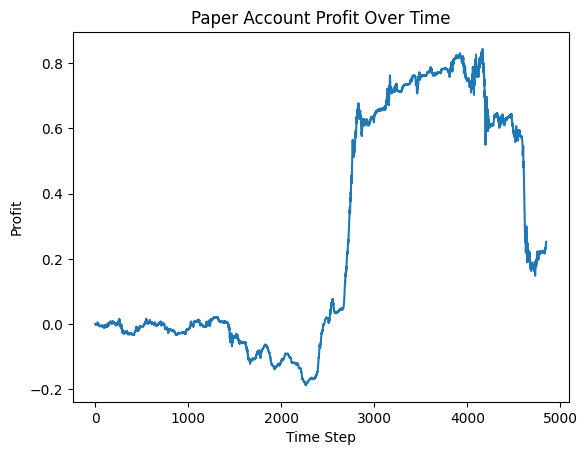

In [2]:
# for 500K model, only the last 5000, for only profit calculation

import pandas as pd
import numpy as np
import pandas as pd
from Get_balance import get_free_btc, get_free_usd, get_free_usdt
from joblib import dump, load
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import matplotlib.pyplot as plt

n_steps = 30

delta_t_trading = 60

historic_data_input_filename = "../Prediction_Model/LSTM/BTCUSDT4Y1MKline_cleaned_24features_nSteps"+str(n_steps)+".csv"
historic_df = pd.read_csv(historic_data_input_filename)
historic_df=historic_df[['Open Time','Close', 'Volume']]

model_parameters_file = '../Prediction_Model/GradientBoosting/GB_model_data_500K_parameters_10000_1000_2_1_10_10.pkl'

paper_trading=True
symbol = 'BTC/USDT'
Exchange_Comission=0
position_ratio=0.02
quantity=0
paper_account_profit=0
type="MARKET"
trade_approved = False
num_approved_trades=0
trade_comission=0

def fetch_historic_data(start, end):
    return historic_df[start : end].copy()

model = GradientBoostingRegressor(n_estimators=10000,  
                                  max_depth=1000,      
                                  min_samples_split=2,
                                  learning_rate=1, 
                                  min_samples_leaf=10,
                                  n_iter_no_change=10, 
                                  loss='squared_error')

model = joblib.load(model_parameters_file)

def trade_evaluation():

    global num_approved_trades

    side=None

    if paper_trading==True:
        U=1
        BTC_balance=0.00193116*U
        USDT_balance=47.79670558*U
    
    elif paper_trading==False:
        BTC_balance=get_free_btc()
        USDT_balance=get_free_usdt()

    
    # position ratio: 0.02
    # BTC_balance=0.00193116

    quantity_long=position_ratio*BTC_balance
    quantity_short=position_ratio*USDT_balance/current_price

    price_gap_percent=abs((predicted_price-current_price)/current_price*100)

    trade_comission_long=0
    trade_comission_short=0

    potential_profit_long=(predicted_price-current_price)*quantity_long
    potential_profit_short=-(predicted_price-current_price)*quantity_short

    if potential_profit_long > (trade_comission_long):
        side="BUY"
        trade_approved=True
        num_approved_trades+=1

    elif potential_profit_short> (trade_comission_short):
        side='SELL'
        trade_approved=True
        num_approved_trades+=1

    else:
        side='None'
        trade_approved=False


    if side=='BUY':
        quantity=quantity_long
        trade_comission=trade_comission_long
    elif side=='SELL':
        quantity=quantity_short
        trade_comission=trade_comission_short
    else:
        quantity=0
        trade_comission=0

    return trade_approved, side, quantity

prediction = []

start_point = len(historic_df) - 5000
end_point = start_point + n_steps + 1
# start_point = 0
# end_point = start_point + n_steps + 1
iteration_step = 1

paper_account_profit_list = []

while end_point < len(historic_df) and (end_point + 2 * delta_t_trading < len(historic_df)):

    df = fetch_historic_data(start_point, end_point) 
    df=df[['Open Time','Close', 'Volume']]

    predicting_index = df.columns.get_loc('Close')

    current_price = float(df.iloc[-1]['Close'])

    scaled_data = df.values

    X = []
    for i in range(n_steps, len(scaled_data)):
        X.append(scaled_data[i - n_steps:i])
    X = np.array(X)

    n_features = X.shape[2]
    X = X.reshape((X.shape[0], X.shape[1], n_features))

    # flatten input
    n_input = X.shape[1] * X.shape[2]
    X_flat = X.reshape((X.shape[0], n_input))

    predicted_price = model.predict(X_flat)

    trade_approved, side, quantity = trade_evaluation()

    if trade_approved:
        
        if paper_trading==True:

            if side=='SELL':

                sold_price=float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                SecTrade_bought_price=float(fetch_historic_data(end_point + delta_t_trading, end_point + 2*delta_t_trading).iloc[-1]['Close'])
                paper_account_profit+=(-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))

            elif side=='BUY':

                purchased_price=float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                SecTrade_sold_price=float(fetch_historic_data(end_point + delta_t_trading, end_point + 2*delta_t_trading).iloc[-1]['Close'])
                paper_account_profit+=(+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                
    paper_account_profit_list.append(paper_account_profit)

    start_point += iteration_step
    end_point += iteration_step
    print("\rstart_point: {}".format(start_point), end="")

plt.plot(paper_account_profit_list)
plt.title('Paper Account Profit Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

profit_df = pd.DataFrame(paper_account_profit_list, columns=['Profit'])
profit_df.to_csv('profit_over_time.csv', index=False)

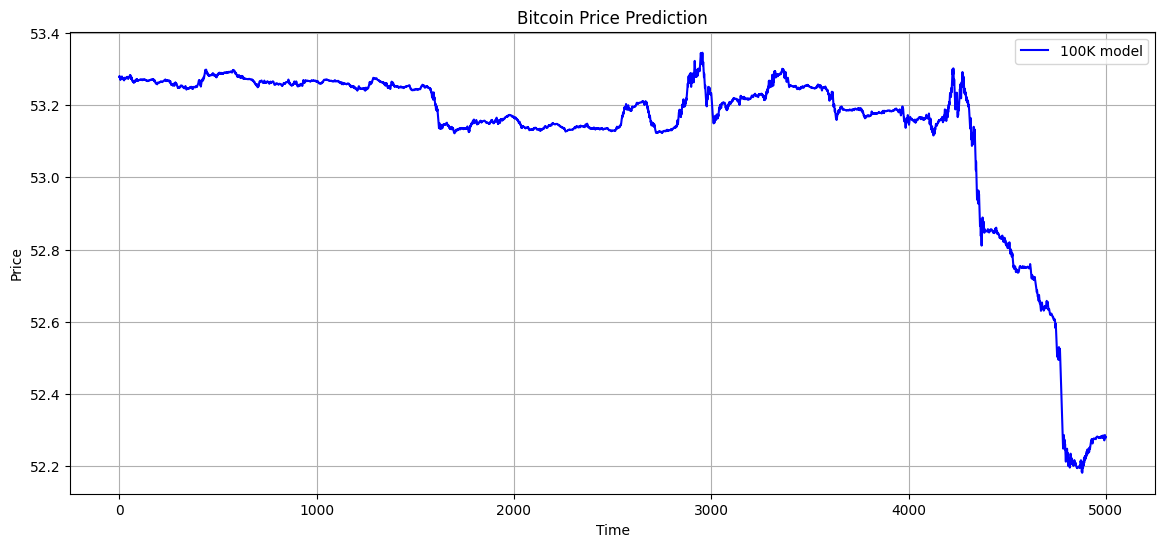

In [14]:
# plot profit over time

profit_100K_df = pd.read_csv('profit_over_2Mdata_model_100K.csv')
profit_500K_df = pd.read_csv('profit_over_5Kdata_model_500K.csv')

profit_100K_df = profit_100K_df.iloc[-5000:]

profit_100K_list = profit_100K_df['Profit'].tolist()
profit_500K_list = profit_500K_df['Profit'].tolist()

plt.figure(figsize=(14,6))
plt.plot(profit_100K_list, color='blue', label='100K model')
# plt.plot(profit_500K_list, color='red', label='500K model')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

500K model on test data (the last 5K rows):

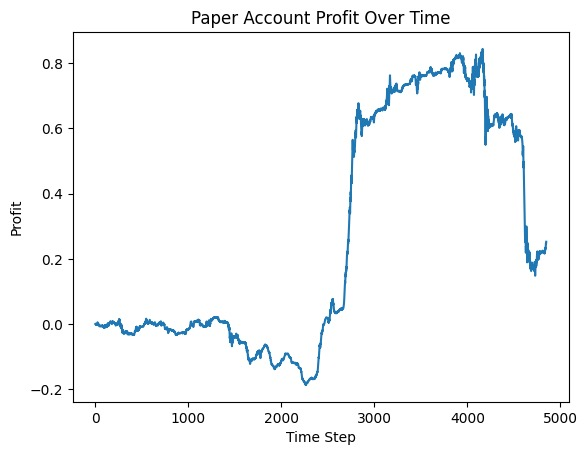

500K model on the entire dataset (2M rows):

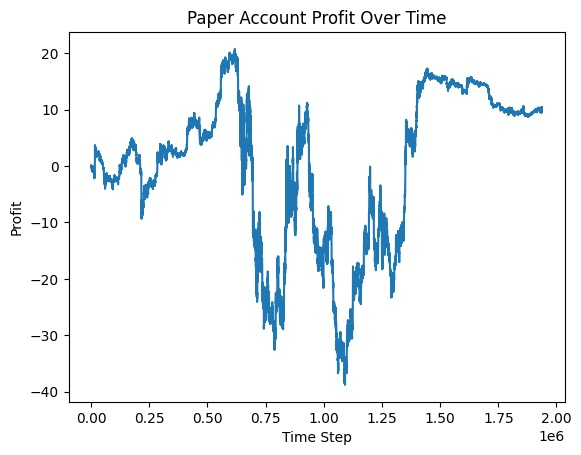

100K model on test data (the last 5K rows):

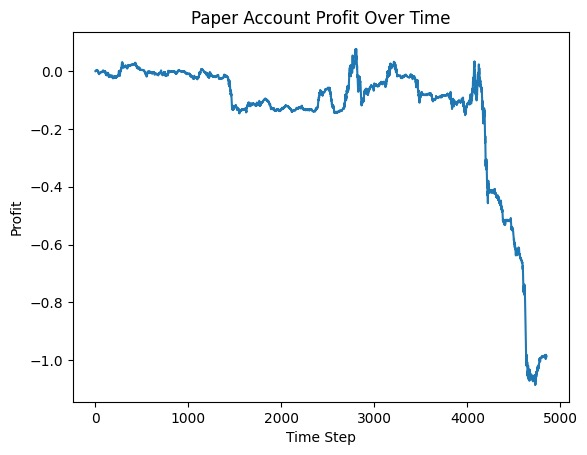

500K model on the entire dataset (2M rows):

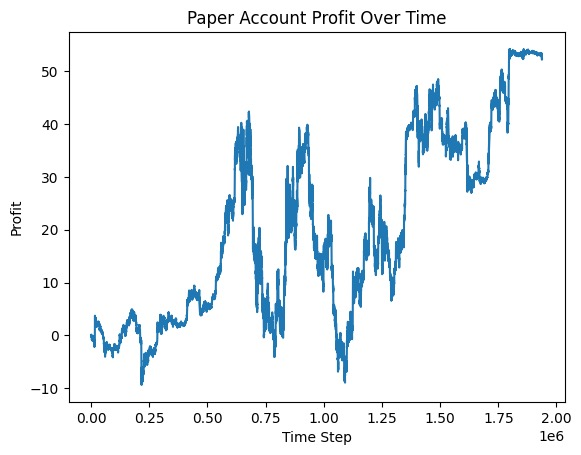

The following section focuses on calculating accuracy, precision and recall

start_point: 1937644

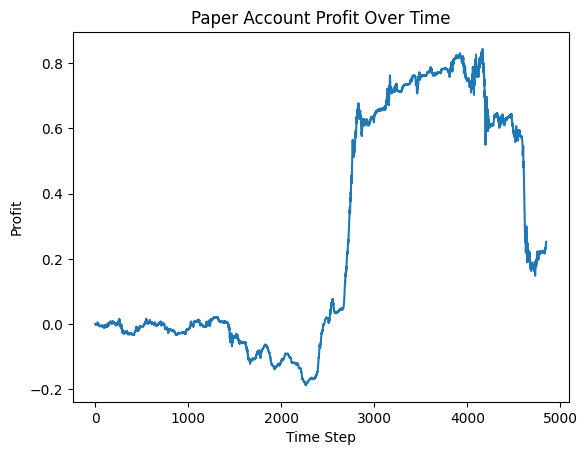

In [18]:
# for 500K model, only the last 5000

import pandas as pd
import numpy as np
import pandas as pd
from Get_balance import get_free_btc, get_free_usd, get_free_usdt
from joblib import dump, load
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import matplotlib.pyplot as plt

n_steps = 30

delta_t_trading = 60

historic_data_input_filename = "../Prediction_Model/LSTM/BTCUSDT4Y1MKline_cleaned_24features_nSteps"+str(n_steps)+".csv"
historic_df = pd.read_csv(historic_data_input_filename)
historic_df=historic_df[['Open Time','Close', 'Volume']]

model_parameters_file = '../Prediction_Model/GradientBoosting/GB_model_data_500K_parameters_10000_1000_2_1_10_10.pkl'

paper_trading=True
symbol = 'BTC/USDT'
Exchange_Comission=0
position_ratio=0.02
quantity=0
paper_account_profit=0
type="MARKET"
trade_approved = False
num_approved_trades=0
trade_comission=0

def fetch_historic_data(start, end):
    return historic_df[start : end].copy()

model = GradientBoostingRegressor(n_estimators=10000,  
                                  max_depth=1000,      
                                  min_samples_split=2,
                                  learning_rate=1, 
                                  min_samples_leaf=10,
                                  n_iter_no_change=10, 
                                  loss='squared_error')

model = joblib.load(model_parameters_file)

def trade_evaluation():

    global num_approved_trades

    side=None

    if paper_trading==True:
        U=1
        BTC_balance=0.00193116*U
        USDT_balance=47.79670558*U
    
    elif paper_trading==False:
        BTC_balance=get_free_btc()
        USDT_balance=get_free_usdt()

    
    # position ratio: 0.02
    # BTC_balance=0.00193116

    quantity_long=position_ratio*BTC_balance
    quantity_short=position_ratio*USDT_balance/current_price

    price_gap_percent=abs((predicted_price-current_price)/current_price*100)

    trade_comission_long=0
    trade_comission_short=0

    potential_profit_long=(predicted_price-current_price)*quantity_long
    potential_profit_short=-(predicted_price-current_price)*quantity_short

    if potential_profit_long > (trade_comission_long):
        side="BUY"
        trade_approved=True
        num_approved_trades+=1
        profit_increase_predicted = potential_profit_long
        profit_increase_predicted_list.append(profit_increase_predicted)

    elif potential_profit_short> (trade_comission_short):
        side='SELL'
        trade_approved=True
        num_approved_trades+=1
        profit_increase_predicted = potential_profit_short
        profit_increase_predicted_list.append(profit_increase_predicted)

    else:
        side='None'
        trade_approved=False


    if side=='BUY':
        quantity=quantity_long
        trade_comission=trade_comission_long
    elif side=='SELL':
        quantity=quantity_short
        trade_comission=trade_comission_short
    else:
        quantity=0
        trade_comission=0

    return trade_approved, side, quantity

prediction = []

start_point = len(historic_df) - 5000
end_point = start_point + n_steps + 1
# start_point = 0
# end_point = start_point + n_steps + 1
iteration_step = 1

paper_account_profit_list = []
profit_increase_predicted_list = []
profit_increase_predicted = 0

while end_point < len(historic_df) and (end_point + 2 * delta_t_trading < len(historic_df)):

    df = fetch_historic_data(start_point, end_point) 
    df=df[['Open Time','Close', 'Volume']]

    predicting_index = df.columns.get_loc('Close')

    current_price = float(df.iloc[-1]['Close'])

    scaled_data = df.values

    X = []
    for i in range(n_steps, len(scaled_data)):
        X.append(scaled_data[i - n_steps:i])
    X = np.array(X)

    n_features = X.shape[2]
    X = X.reshape((X.shape[0], X.shape[1], n_features))

    # flatten input
    n_input = X.shape[1] * X.shape[2]
    X_flat = X.reshape((X.shape[0], n_input))

    predicted_price = model.predict(X_flat)

    trade_approved, side, quantity = trade_evaluation()

    if trade_approved:
        
        if paper_trading==True:

            if side=='SELL':

                sold_price=float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                SecTrade_bought_price=float(fetch_historic_data(end_point + delta_t_trading, end_point + 2*delta_t_trading).iloc[-1]['Close'])
                paper_account_profit+=(-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))

            elif side=='BUY':

                purchased_price=float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                SecTrade_sold_price=float(fetch_historic_data(end_point + delta_t_trading, end_point + 2*delta_t_trading).iloc[-1]['Close'])
                paper_account_profit+=(+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                
    paper_account_profit_list.append(paper_account_profit)

    start_point += iteration_step
    end_point += iteration_step
    print("\rstart_point: {}".format(start_point), end="")

plt.plot(paper_account_profit_list)
plt.title('Paper Account Profit Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

profit_df = pd.DataFrame(paper_account_profit_list, columns=['Profit'])
profit_df_predicted = pd.DataFrame(profit_increase_predicted_list, columns=['Profit Increase Predicted'])
profit_df.to_csv('profit_over_5Kdata_model_500K.csv', index=False)
profit_df_predicted.to_csv('profit_increase_predicted_5Kdata_model_500K.csv', index=False)

note on the calculation above (whic is wrong):
the calculation does not consider that in the simulation we're making profit anyways and profit is always positive, while giving 0 score when the direction of the trade is the other way. 

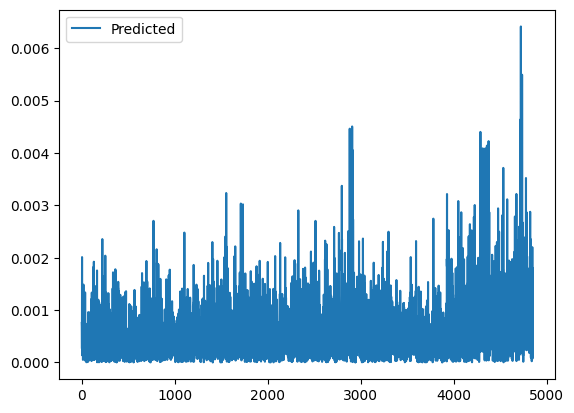

In [40]:
# plot profit_increase_real and profit_increase_predicted
# plt.plot(????, label='Real')
plt.plot(profit_increase_predicted_list_500K, label='Predicted')
plt.legend()
plt.show()


In [43]:
# for 500K model, only the last 5000
%reset -f
import pandas as pd
import numpy as np
import pandas as pd
from Get_balance import get_free_btc, get_free_usd, get_free_usdt
from joblib import dump, load
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import matplotlib.pyplot as plt

n_steps = 30

delta_t_trading = 60

historic_data_input_filename = "../Prediction_Model/LSTM/BTCUSDT4Y1MKline_cleaned_24features_nSteps"+str(n_steps)+".csv"
historic_df = pd.read_csv(historic_data_input_filename)
historic_df=historic_df[['Open Time','Close', 'Volume']]

model_parameters_file = '../Prediction_Model/GradientBoosting/GB_model_data_500K_parameters_10000_1000_2_1_10_10.pkl'

paper_trading=True
symbol = 'BTC/USDT'
Exchange_Comission=0
position_ratio=0.02
quantity=0
type="MARKET"
trade_approved = False
num_approved_trades=0
trade_comission=0

def fetch_historic_data(start, end):
    return historic_df[start : end].copy()

model = GradientBoostingRegressor(n_estimators=10000,  
                                  max_depth=1000,      
                                  min_samples_split=2,
                                  learning_rate=1, 
                                  min_samples_leaf=10,
                                  n_iter_no_change=10, 
                                  loss='squared_error')

model = joblib.load(model_parameters_file)

def trade_evaluation():

    global num_approved_trades

    side=None

    if paper_trading==True:
        U=1
        BTC_balance=0.00193116*U
        USDT_balance=47.79670558*U
    
    elif paper_trading==False:
        BTC_balance=get_free_btc()
        USDT_balance=get_free_usdt()
  
    # position ratio: 0.02
    # BTC_balance=0.00193116

    quantity_long=position_ratio*BTC_balance
    quantity_short=position_ratio*USDT_balance/current_price

    trade_comission_long=0
    trade_comission_short=0

    potential_profit_long=(predicted_price-current_price)*quantity_long
    potential_profit_short=-(predicted_price-current_price)*quantity_short

    if potential_profit_long > (trade_comission_long):
        side="BUY"
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_long
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    elif potential_profit_short> (trade_comission_short):
        side='SELL'
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_short
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    else:
        side='None'
        trade_approved=False


    if side=='BUY':
        quantity=quantity_long
        trade_comission=trade_comission_long
    elif side=='SELL':
        quantity=quantity_short
        trade_comission=trade_comission_short
    else:
        quantity=0
        trade_comission=0

    return trade_approved, side, quantity

prediction = []

start_point = len(historic_df) - 5000
end_point = start_point + n_steps + 1
# start_point = 0
# end_point = start_point + n_steps + 1
iteration_step = 1

profit_per_trade_predicted_list = [] # profit_predicted_list is the storage of the profit of each trade over time
profit_per_trade_predicted = 0 # profit_predicted is the profit of the current trade
profit_per_trade_actual_list = [] # profit_per_trade_list is the profit of each trade
profit_per_trade_actual = 0 # profit_per_trade is the profit of the current trade
paper_account_profit_list = [] # paper_account_profit_list is the accumulated profit of the paper account
paper_account_profit=0 # paper_account_profit is the profit of the paper account at the current time step

while end_point < len(historic_df) and (end_point + 2 * delta_t_trading < len(historic_df)):

    df = fetch_historic_data(start_point, end_point) 
    df=df[['Open Time','Close', 'Volume']]

    predicting_index = df.columns.get_loc('Close')

    current_price = float(df.iloc[-1]['Close'])

    scaled_data = df.values

    X = []
    for i in range(n_steps, len(scaled_data)):
        X.append(scaled_data[i - n_steps:i])
    X = np.array(X)

    n_features = X.shape[2]
    X = X.reshape((X.shape[0], X.shape[1], n_features))

    # flatten input
    n_input = X.shape[1] * X.shape[2]
    X_flat = X.reshape((X.shape[0], n_input))

    predicted_price = model.predict(X_flat)

    trade_approved, side, quantity = trade_evaluation()

    if trade_approved:
        
        if paper_trading==True:

            if side=='SELL':

                sold_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_bought_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))

            elif side=='BUY':

                purchased_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_sold_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                
    paper_account_profit_list.append(paper_account_profit)
    profit_per_trade_actual_list.append(profit_per_trade_actual)

    start_point += iteration_step
    end_point += iteration_step
    print("\rstart_point: {}".format(start_point), end="")

profit_account_actual_df = pd.DataFrame(paper_account_profit_list, columns=['Paper Account Profit'])
profit_per_trade_predicted_df = pd.DataFrame(profit_per_trade_predicted_list, columns=['Profit per Trade Predicted'])
profit_per_trade_actual_df = pd.DataFrame(profit_per_trade_actual_list, columns=['Profit per Trade Actual'])
profit_account_actual_df.to_csv('profit_account_actual_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_predicted_df.to_csv('profit_per_trade_predicted_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_actual_df.to_csv('profit_per_trade_actual_5Kdata_500Kmodel.csv', index=False)

start_point: 1937644

In [44]:
# print("paper_account_profit_list: {}".format(paper_account_profit_list))
print("profit_per_trade_predicted_list: {}".format(profit_per_trade_predicted_list))
print("profit_per_trade_actual_list: {}".format(profit_per_trade_actual_list))
print("len(paper_account_profit_list): {}".format(len(paper_account_profit_list)))
print("len(profit_per_trade_predicted_list): {}".format(len(profit_per_trade_predicted_list)))
print("len(profit_per_trade_actual_list): {}".format(len(profit_per_trade_actual_list)))

profit_per_trade_predicted_list: [array([0.0007551]), array([0.00068622]), array([0.00026537]), array([0.00201197]), array([0.00013771]), array([0.0004189]), array([0.000661]), array([0.00106278]), array([0.00013867]), array([0.00082046]), array([0.00065909]), array([0.00048852]), array([0.00083993]), array([4.92595122e-05]), array([0.00050187]), array([0.00037879]), array([0.00089584]), array([0.00069744]), array([0.0014871]), array([0.00016739]), array([0.00022231]), array([0.00060106]), array([0.00104887]), array([0.00088321]), array([9.52809833e-05]), array([0.00050286]), array([0.00027833]), array([0.00107692]), array([0.00072111]), array([7.06685346e-05]), array([0.00021268]), array([0.00028674]), array([6.17235235e-05]), array([0.0012686]), array([8.36439726e-05]), array([0.00086937]), array([0.00133727]), array([0.00042863]), array([6.34946832e-05]), array([0.00056613]), array([2.95790809e-05]), array([0.00029949]), array([0.00074085]), array([0.00014816]), array([0.0006844]), 

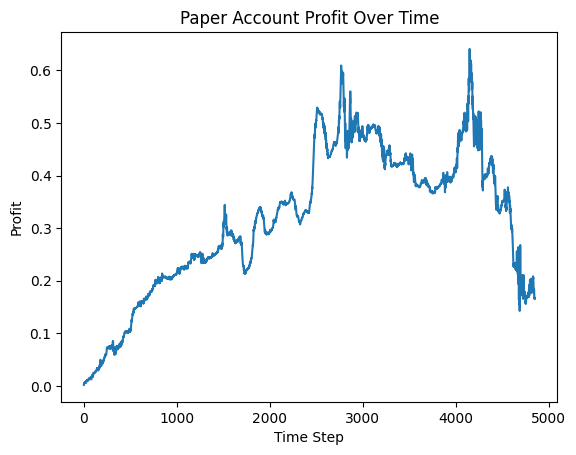

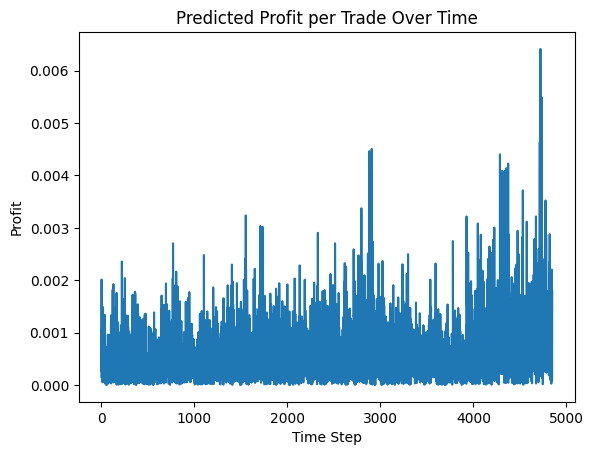

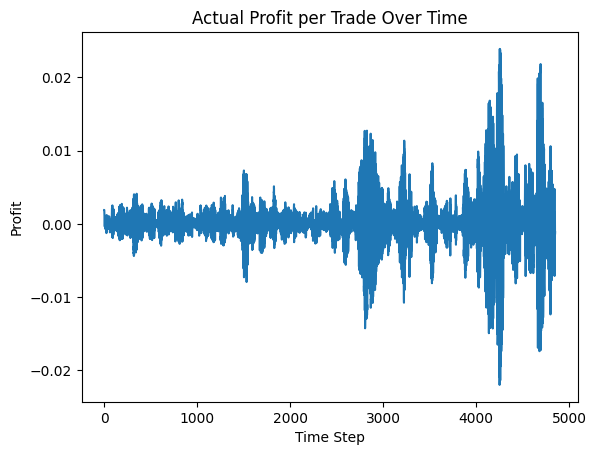

In [45]:
plt.plot(paper_account_profit_list)
plt.title('Paper Account Profit Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_predicted_list)
plt.title('Predicted Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_actual_list)
plt.title('Actual Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

In [47]:
# caclulate accuracy only with the actual results

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

profit_per_trade_actual_5Kdata_500Kmodel_df = pd.read_csv('profit_per_trade_actual_5Kdata_500Kmodel.csv')
profit_per_trade_actual_5Kdata_500Kmodel_list = profit_per_trade_actual_5Kdata_500Kmodel_df['Profit per Trade Actual'].tolist()

profit_per_trade_actual_5Kdata_500Kmodel_list_binary = profit_per_trade_actual_5Kdata_500Kmodel_list_binary = [0]*len(profit_per_trade_actual_5Kdata_500Kmodel_list)

for i in range(len(profit_per_trade_actual_5Kdata_500Kmodel_list)):
    if profit_per_trade_actual_5Kdata_500Kmodel_list[i] >= 0:
        profit_per_trade_actual_5Kdata_500Kmodel_list_binary[i] = 1
    elif profit_per_trade_actual_5Kdata_500Kmodel_list[i] < 0:
        profit_per_trade_actual_5Kdata_500Kmodel_list_binary[i] = 0
    
accuracy = profit_per_trade_actual_5Kdata_500Kmodel_list_binary.count(1)/len(profit_per_trade_actual_5Kdata_500Kmodel_list_binary)

print("for 500K model on the last 5K data:")
print(f"Accuracy: {accuracy}")

for 500K model on the last 5K data:
Accuracy: 0.5225819756650856


In [48]:
# for 2M model, only the last 5000
%reset -f
import pandas as pd
import numpy as np
import pandas as pd
from Get_balance import get_free_btc, get_free_usd, get_free_usdt
from joblib import dump, load
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import matplotlib.pyplot as plt

n_steps = 30

delta_t_trading = 60

historic_data_input_filename = "../Prediction_Model/LSTM/BTCUSDT4Y1MKline_cleaned_24features_nSteps"+str(n_steps)+".csv"
historic_df = pd.read_csv(historic_data_input_filename)
historic_df=historic_df[['Open Time','Close', 'Volume']]

model_parameters_file = '../Prediction_Model/GradientBoosting/GB_model_data_2M_parameters_10000_1000_2_1_10_10.pkl'

paper_trading=True
symbol = 'BTC/USDT'
Exchange_Comission=0
position_ratio=0.02
quantity=0
type="MARKET"
trade_approved = False
num_approved_trades=0
trade_comission=0

def fetch_historic_data(start, end):
    return historic_df[start : end].copy()

model = GradientBoostingRegressor(n_estimators=10000,  
                                  max_depth=1000,      
                                  min_samples_split=2,
                                  learning_rate=1, 
                                  min_samples_leaf=10,
                                  n_iter_no_change=10, 
                                  loss='squared_error')

model = joblib.load(model_parameters_file)

def trade_evaluation():

    global num_approved_trades

    side=None

    if paper_trading==True:
        U=1
        BTC_balance=0.00193116*U
        USDT_balance=47.79670558*U
    
    elif paper_trading==False:
        BTC_balance=get_free_btc()
        USDT_balance=get_free_usdt()
  
    # position ratio: 0.02
    # BTC_balance=0.00193116

    quantity_long=position_ratio*BTC_balance
    quantity_short=position_ratio*USDT_balance/current_price

    trade_comission_long=0
    trade_comission_short=0

    potential_profit_long=(predicted_price-current_price)*quantity_long
    potential_profit_short=-(predicted_price-current_price)*quantity_short

    if potential_profit_long > (trade_comission_long):
        side="BUY"
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_long
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    elif potential_profit_short> (trade_comission_short):
        side='SELL'
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_short
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    else:
        side='None'
        trade_approved=False


    if side=='BUY':
        quantity=quantity_long
        trade_comission=trade_comission_long
    elif side=='SELL':
        quantity=quantity_short
        trade_comission=trade_comission_short
    else:
        quantity=0
        trade_comission=0

    return trade_approved, side, quantity

prediction = []

start_point = len(historic_df) - 5000
end_point = start_point + n_steps + 1
# start_point = 0
# end_point = start_point + n_steps + 1
iteration_step = 1

profit_per_trade_predicted_list = [] # profit_predicted_list is the storage of the profit of each trade over time
profit_per_trade_predicted = 0 # profit_predicted is the profit of the current trade
profit_per_trade_actual_list = [] # profit_per_trade_list is the profit of each trade
profit_per_trade_actual = 0 # profit_per_trade is the profit of the current trade
paper_account_profit_list = [] # paper_account_profit_list is the accumulated profit of the paper account
paper_account_profit=0 # paper_account_profit is the profit of the paper account at the current time step

while end_point < len(historic_df) and (end_point + 2 * delta_t_trading < len(historic_df)):

    df = fetch_historic_data(start_point, end_point) 
    df=df[['Open Time','Close', 'Volume']]

    predicting_index = df.columns.get_loc('Close')

    current_price = float(df.iloc[-1]['Close'])

    scaled_data = df.values

    X = []
    for i in range(n_steps, len(scaled_data)):
        X.append(scaled_data[i - n_steps:i])
    X = np.array(X)

    n_features = X.shape[2]
    X = X.reshape((X.shape[0], X.shape[1], n_features))

    # flatten input
    n_input = X.shape[1] * X.shape[2]
    X_flat = X.reshape((X.shape[0], n_input))

    predicted_price = model.predict(X_flat)

    trade_approved, side, quantity = trade_evaluation()

    if trade_approved:
        
        if paper_trading==True:

            if side=='SELL':

                sold_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_bought_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))

            elif side=='BUY':

                purchased_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_sold_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                
    paper_account_profit_list.append(paper_account_profit)
    profit_per_trade_actual_list.append(profit_per_trade_actual)

    start_point += iteration_step
    end_point += iteration_step
    print("\rstart_point: {}".format(start_point), end="")

profit_account_actual_df = pd.DataFrame(paper_account_profit_list, columns=['Paper Account Profit'])
profit_per_trade_predicted_df = pd.DataFrame(profit_per_trade_predicted_list, columns=['Profit per Trade Predicted'])
profit_per_trade_actual_df = pd.DataFrame(profit_per_trade_actual_list, columns=['Profit per Trade Actual'])
profit_account_actual_df.to_csv('profit_account_actual_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_predicted_df.to_csv('profit_per_trade_predicted_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_actual_df.to_csv('profit_per_trade_actual_5Kdata_500Kmodel.csv', index=False)

start_point: 1937644

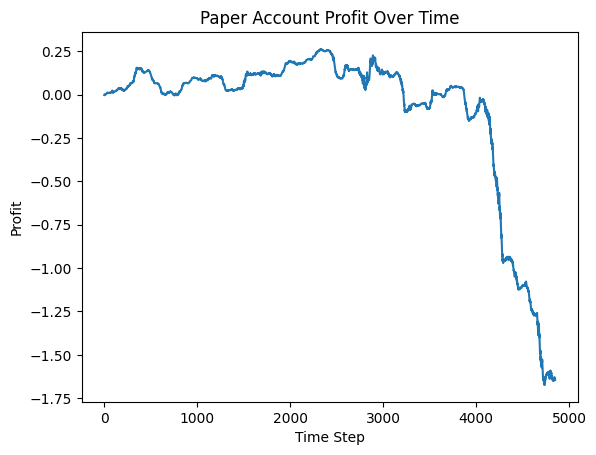

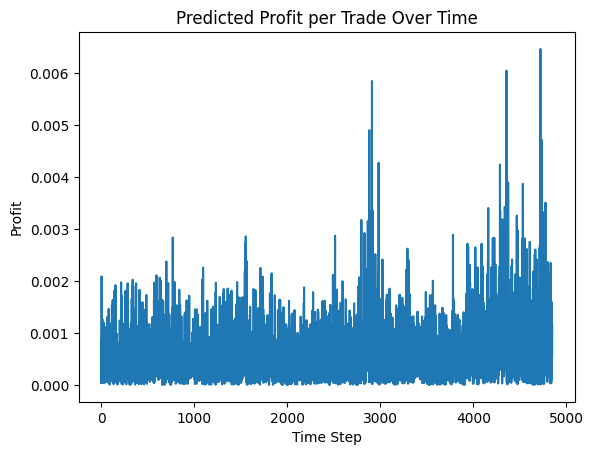

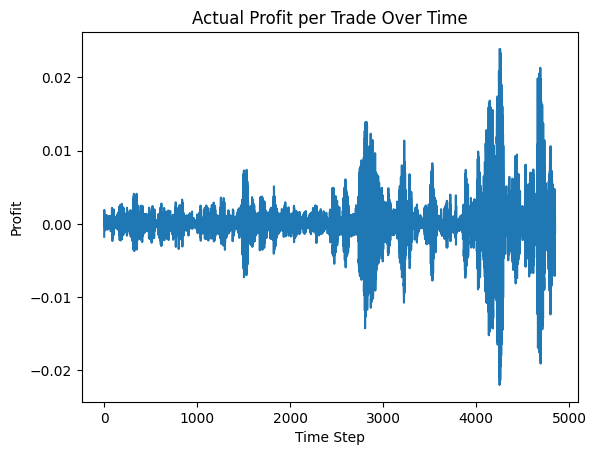

In [49]:
plt.plot(paper_account_profit_list)
plt.title('Paper Account Profit Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_predicted_list)
plt.title('Predicted Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_actual_list)
plt.title('Actual Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

In [56]:
# for 2M model, only the last 20K
%reset -f
import pandas as pd
import numpy as np
import pandas as pd
from Get_balance import get_free_btc, get_free_usd, get_free_usdt
from joblib import dump, load
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import matplotlib.pyplot as plt

n_steps = 30

delta_t_trading = 60

historic_data_input_filename = "../Prediction_Model/LSTM/BTCUSDT4Y1MKline_cleaned_24features_nSteps"+str(n_steps)+".csv"
historic_df = pd.read_csv(historic_data_input_filename)
historic_df=historic_df[['Open Time','Close', 'Volume']]

model_parameters_file = '../Prediction_Model/GradientBoosting/GB_model_data_2M_main_parameters_10000_1000_2_1_10_10.pkl'

paper_trading=True
symbol = 'BTC/USDT'
Exchange_Comission=0
position_ratio=0.02
quantity=0
type="MARKET"
trade_approved = False
num_approved_trades=0
trade_comission=0

def fetch_historic_data(start, end):
    return historic_df[start : end].copy()

model = GradientBoostingRegressor(n_estimators=10000,  
                                  max_depth=1000,      
                                  min_samples_split=2,
                                  learning_rate=1, 
                                  min_samples_leaf=10,
                                  n_iter_no_change=10, 
                                  loss='squared_error')

model = joblib.load(model_parameters_file)

def trade_evaluation():

    global num_approved_trades

    side=None

    if paper_trading==True:
        U=1
        BTC_balance=0.00193116*U
        USDT_balance=47.79670558*U
    
    elif paper_trading==False:
        BTC_balance=get_free_btc()
        USDT_balance=get_free_usdt()
  
    # position ratio: 0.02
    # BTC_balance=0.00193116

    quantity_long=position_ratio*BTC_balance
    quantity_short=position_ratio*USDT_balance/current_price

    trade_comission_long=0
    trade_comission_short=0

    potential_profit_long=(predicted_price-current_price)*quantity_long
    potential_profit_short=-(predicted_price-current_price)*quantity_short

    if potential_profit_long > (trade_comission_long):
        side="BUY"
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_long
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    elif potential_profit_short> (trade_comission_short):
        side='SELL'
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_short
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    else:
        side='None'
        trade_approved=False


    if side=='BUY':
        quantity=quantity_long
        trade_comission=trade_comission_long
    elif side=='SELL':
        quantity=quantity_short
        trade_comission=trade_comission_short
    else:
        quantity=0
        trade_comission=0

    return trade_approved, side, quantity

prediction = []

start_point = len(historic_df) - 20000
end_point = start_point + n_steps + 1
# start_point = 0
# end_point = start_point + n_steps + 1
iteration_step = 1

profit_per_trade_predicted_list = [] # profit_predicted_list is the storage of the profit of each trade over time
profit_per_trade_predicted = 0 # profit_predicted is the profit of the current trade
profit_per_trade_actual_list = [] # profit_per_trade_list is the profit of each trade
profit_per_trade_actual = 0 # profit_per_trade is the profit of the current trade
paper_account_profit_list = [] # paper_account_profit_list is the accumulated profit of the paper account
paper_account_profit=0 # paper_account_profit is the profit of the paper account at the current time step

while end_point < len(historic_df) and (end_point + 2 * delta_t_trading < len(historic_df)):

    df = fetch_historic_data(start_point, end_point) 
    df=df[['Open Time','Close', 'Volume']]

    predicting_index = df.columns.get_loc('Close')

    current_price = float(df.iloc[-1]['Close'])

    scaled_data = df.values

    X = []
    for i in range(n_steps, len(scaled_data)):
        X.append(scaled_data[i - n_steps:i])
    X = np.array(X)

    n_features = X.shape[2]
    X = X.reshape((X.shape[0], X.shape[1], n_features))

    # flatten input
    n_input = X.shape[1] * X.shape[2]
    X_flat = X.reshape((X.shape[0], n_input))

    predicted_price = model.predict(X_flat)

    trade_approved, side, quantity = trade_evaluation()

    if trade_approved:
        
        if paper_trading==True:

            if side=='SELL':

                sold_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_bought_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))

            elif side=='BUY':

                purchased_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_sold_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                
    paper_account_profit_list.append(paper_account_profit)
    profit_per_trade_actual_list.append(profit_per_trade_actual)

    start_point += iteration_step
    end_point += iteration_step
    print("\rstart_point: {}".format(start_point), end="")

profit_account_actual_df = pd.DataFrame(paper_account_profit_list, columns=['Paper Account Profit'])
profit_per_trade_predicted_df = pd.DataFrame(profit_per_trade_predicted_list, columns=['Profit per Trade Predicted'])
profit_per_trade_actual_df = pd.DataFrame(profit_per_trade_actual_list, columns=['Profit per Trade Actual'])
profit_account_actual_df.to_csv('profit_account_actual_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_predicted_df.to_csv('profit_per_trade_predicted_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_actual_df.to_csv('profit_per_trade_actual_5Kdata_500Kmodel.csv', index=False)

start_point: 1937644

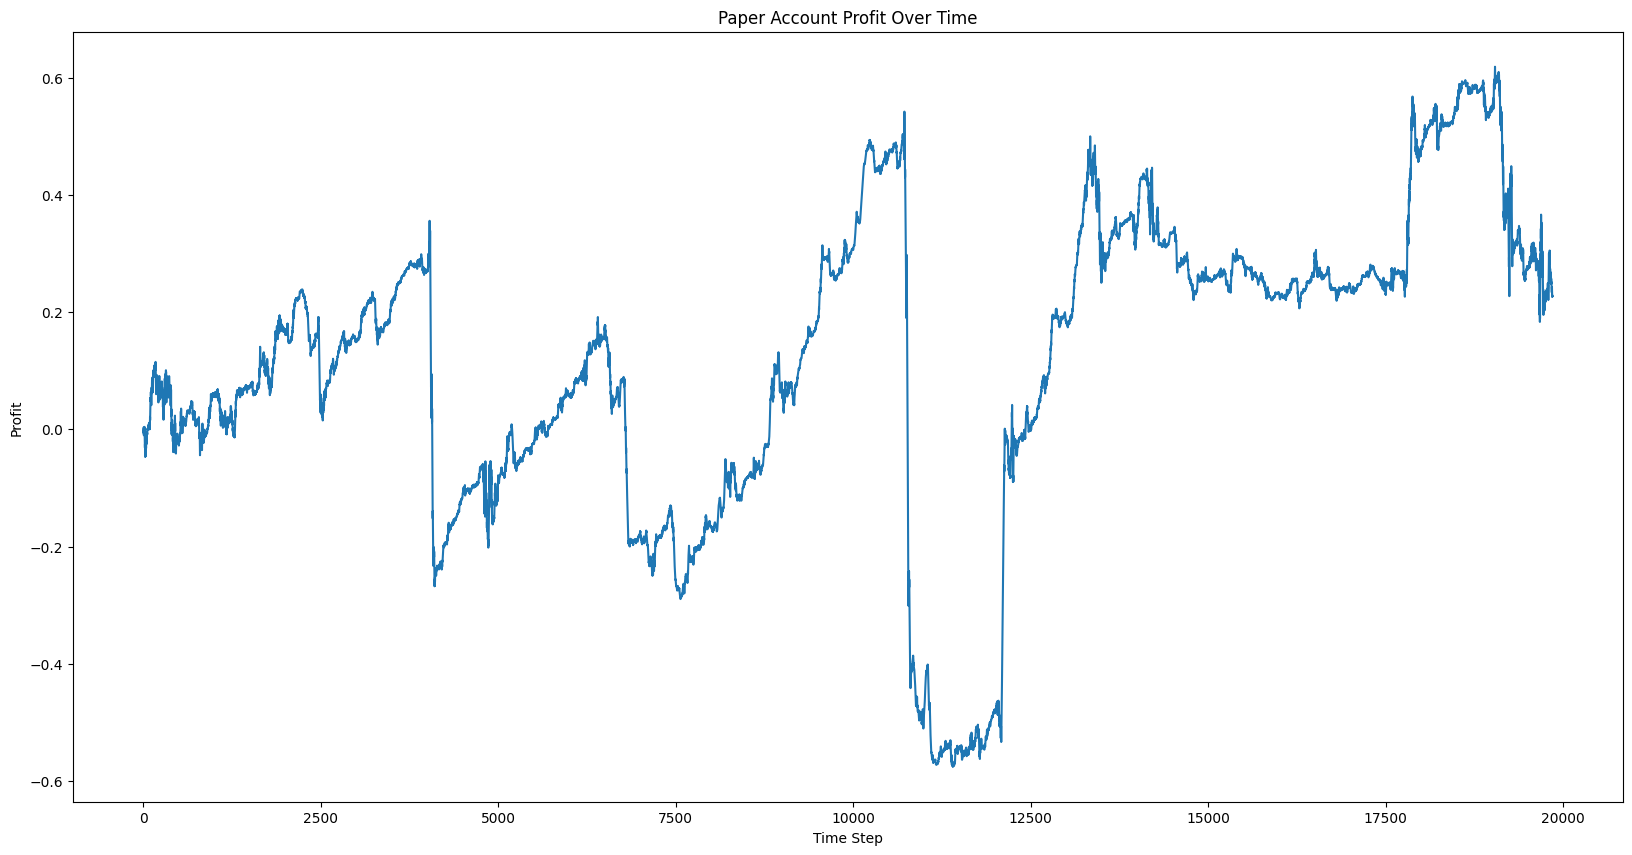

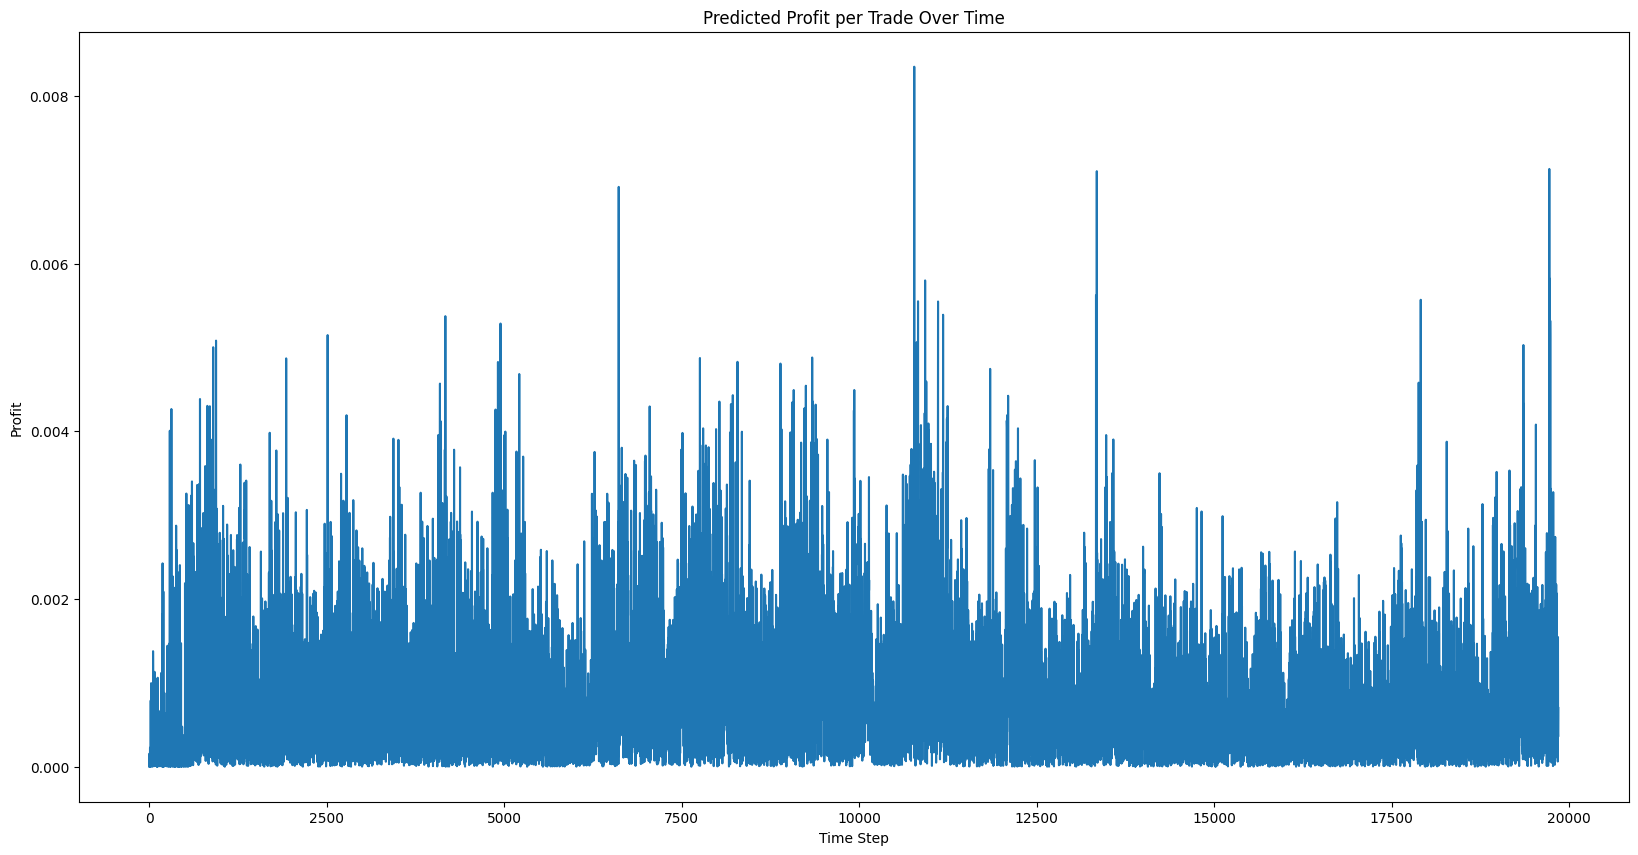

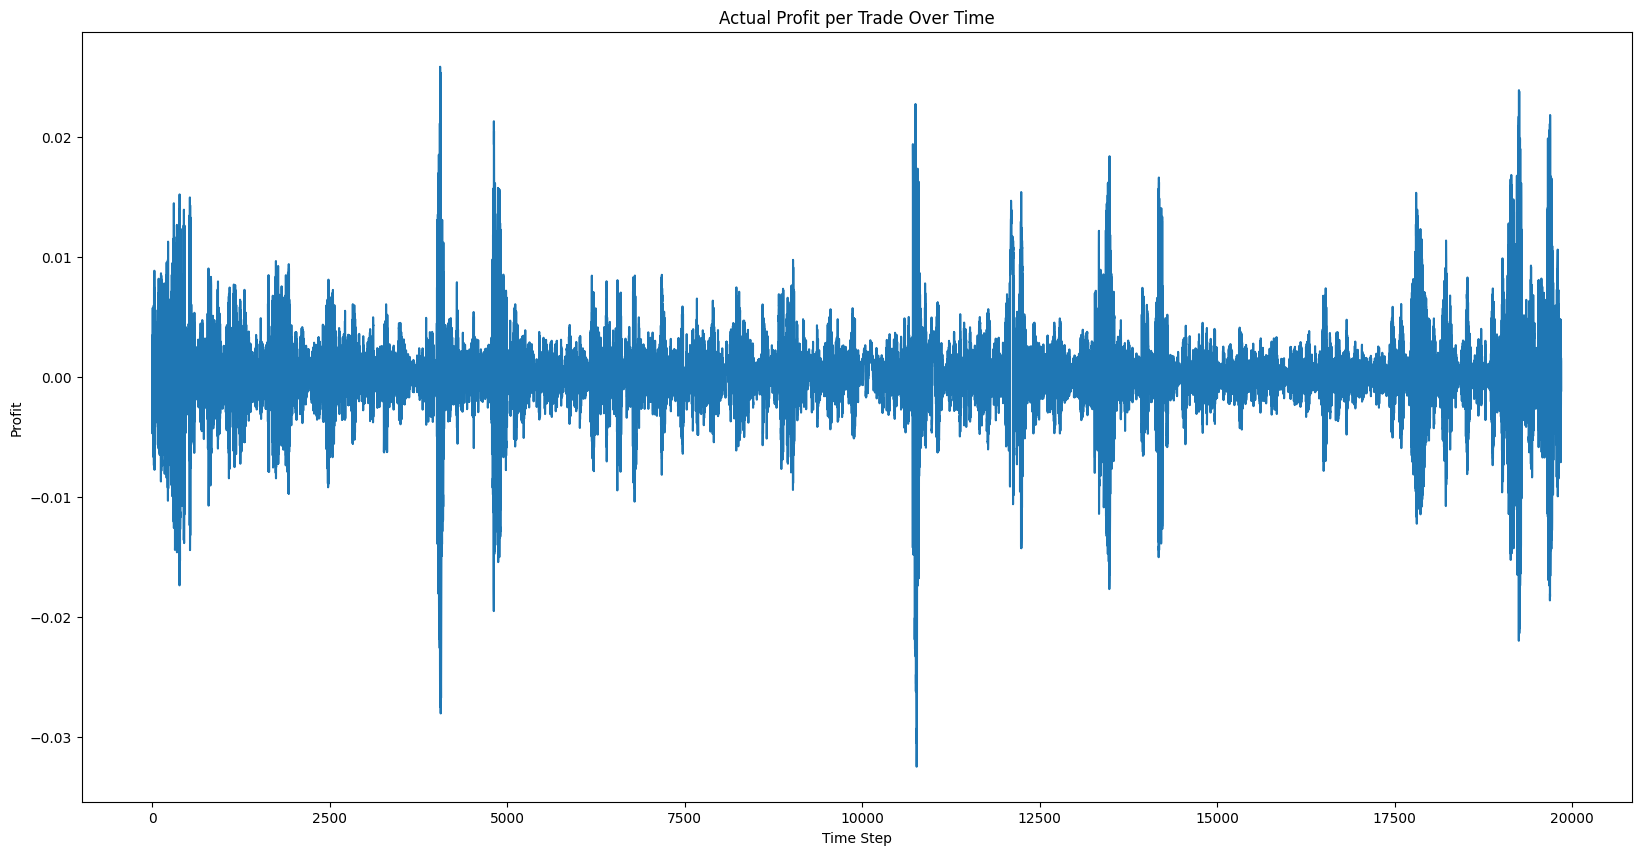

In [57]:
plt.plot(paper_account_profit_list)
plt.title('Paper Account Profit Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_predicted_list)
plt.title('Predicted Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_actual_list)
plt.title('Actual Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

In [58]:
# caclulate accuracy only with the actual results

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

profit_per_trade_actual_5Kdata_500Kmodel_df = pd.read_csv('profit_per_trade_actual_5Kdata_500Kmodel.csv')
profit_per_trade_actual_5Kdata_500Kmodel_list = profit_per_trade_actual_5Kdata_500Kmodel_df['Profit per Trade Actual'].tolist()

profit_per_trade_actual_5Kdata_500Kmodel_list_binary = profit_per_trade_actual_5Kdata_500Kmodel_list_binary = [0]*len(profit_per_trade_actual_5Kdata_500Kmodel_list)

for i in range(len(profit_per_trade_actual_5Kdata_500Kmodel_list)):
    if profit_per_trade_actual_5Kdata_500Kmodel_list[i] >= 0:
        profit_per_trade_actual_5Kdata_500Kmodel_list_binary[i] = 1
    elif profit_per_trade_actual_5Kdata_500Kmodel_list[i] < 0:
        profit_per_trade_actual_5Kdata_500Kmodel_list_binary[i] = 0
    
accuracy = profit_per_trade_actual_5Kdata_500Kmodel_list_binary.count(1)/len(profit_per_trade_actual_5Kdata_500Kmodel_list_binary)

print("for 500K model on the last 5K data:")
print(f"Accuracy: {accuracy}")

for 500K model on the last 5K data:
Accuracy: 0.5143332157791325


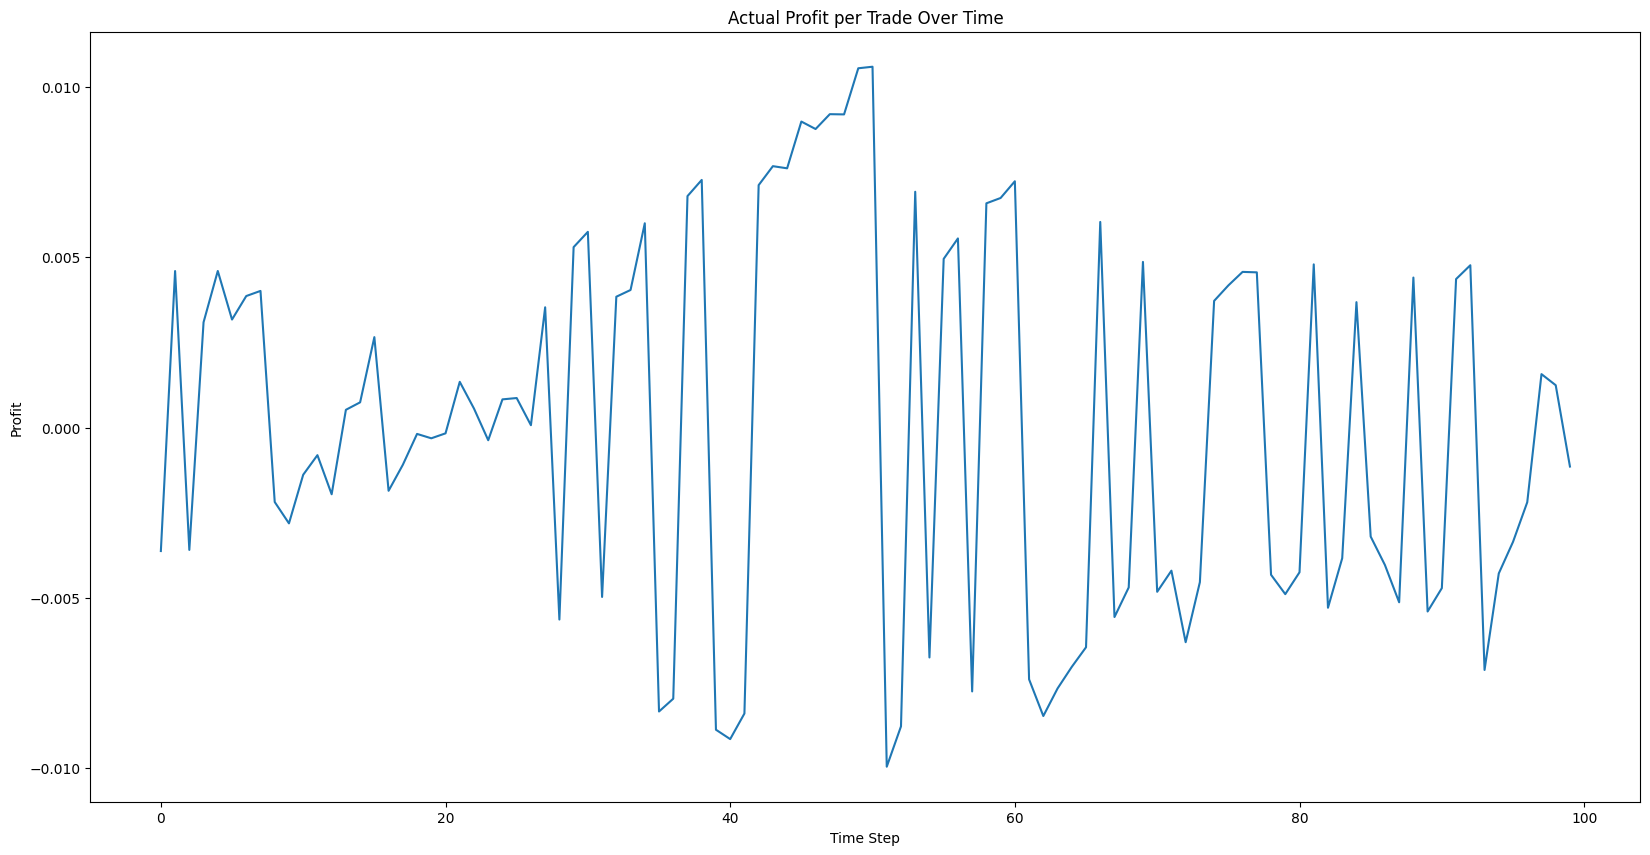

In [59]:
# change the figure size:
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(profit_per_trade_actual_list[-100:])
plt.title('Actual Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

In [60]:
# for 2M model, only the last 5K
%reset -f
import pandas as pd
import numpy as np
import pandas as pd
from Get_balance import get_free_btc, get_free_usd, get_free_usdt
from joblib import dump, load
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import matplotlib.pyplot as plt

n_steps = 30

delta_t_trading = 60

historic_data_input_filename = "../Prediction_Model/LSTM/BTCUSDT4Y1MKline_cleaned_24features_nSteps"+str(n_steps)+".csv"
historic_df = pd.read_csv(historic_data_input_filename)
historic_df=historic_df[['Open Time','Close', 'Volume']]

model_parameters_file = '../Prediction_Model/GradientBoosting/GB_model_data_2M_main_parameters_10000_1000_2_1_10_10.pkl'

paper_trading=True
symbol = 'BTC/USDT'
Exchange_Comission=0
position_ratio=0.02
quantity=0
type="MARKET"
trade_approved = False
num_approved_trades=0
trade_comission=0

def fetch_historic_data(start, end):
    return historic_df[start : end].copy()

model = GradientBoostingRegressor(n_estimators=10000,  
                                  max_depth=1000,      
                                  min_samples_split=2,
                                  learning_rate=1, 
                                  min_samples_leaf=10,
                                  n_iter_no_change=10, 
                                  loss='squared_error')

model = joblib.load(model_parameters_file)

def trade_evaluation():

    global num_approved_trades

    side=None

    if paper_trading==True:
        U=1
        BTC_balance=0.00193116*U
        USDT_balance=47.79670558*U
    
    elif paper_trading==False:
        BTC_balance=get_free_btc()
        USDT_balance=get_free_usdt()
  
    # position ratio: 0.02
    # BTC_balance=0.00193116

    quantity_long=position_ratio*BTC_balance
    quantity_short=position_ratio*USDT_balance/current_price

    trade_comission_long=0
    trade_comission_short=0

    potential_profit_long=(predicted_price-current_price)*quantity_long
    potential_profit_short=-(predicted_price-current_price)*quantity_short

    if potential_profit_long > (trade_comission_long):
        side="BUY"
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_long
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    elif potential_profit_short> (trade_comission_short):
        side='SELL'
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_short
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    else:
        side='None'
        trade_approved=False


    if side=='BUY':
        quantity=quantity_long
        trade_comission=trade_comission_long
    elif side=='SELL':
        quantity=quantity_short
        trade_comission=trade_comission_short
    else:
        quantity=0
        trade_comission=0

    return trade_approved, side, quantity

prediction = []

start_point = len(historic_df) - 5000
end_point = start_point + n_steps + 1
# start_point = 0
# end_point = start_point + n_steps + 1
iteration_step = 1

profit_per_trade_predicted_list = [] # profit_predicted_list is the storage of the profit of each trade over time
profit_per_trade_predicted = 0 # profit_predicted is the profit of the current trade
profit_per_trade_actual_list = [] # profit_per_trade_list is the profit of each trade
profit_per_trade_actual = 0 # profit_per_trade is the profit of the current trade
paper_account_profit_list = [] # paper_account_profit_list is the accumulated profit of the paper account
paper_account_profit=0 # paper_account_profit is the profit of the paper account at the current time step

while end_point < len(historic_df) and (end_point + 2 * delta_t_trading < len(historic_df)):

    df = fetch_historic_data(start_point, end_point) 
    df=df[['Open Time','Close', 'Volume']]

    predicting_index = df.columns.get_loc('Close')

    current_price = float(df.iloc[-1]['Close'])

    scaled_data = df.values

    X = []
    for i in range(n_steps, len(scaled_data)):
        X.append(scaled_data[i - n_steps:i])
    X = np.array(X)

    n_features = X.shape[2]
    X = X.reshape((X.shape[0], X.shape[1], n_features))

    # flatten input
    n_input = X.shape[1] * X.shape[2]
    X_flat = X.reshape((X.shape[0], n_input))

    predicted_price = model.predict(X_flat)

    trade_approved, side, quantity = trade_evaluation()

    if trade_approved:
        
        if paper_trading==True:

            if side=='SELL':

                sold_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_bought_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))

            elif side=='BUY':

                purchased_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_sold_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                
    paper_account_profit_list.append(paper_account_profit)
    profit_per_trade_actual_list.append(profit_per_trade_actual)

    start_point += iteration_step
    end_point += iteration_step
    print("\rstart_point: {}".format(start_point), end="")

profit_account_actual_df = pd.DataFrame(paper_account_profit_list, columns=['Paper Account Profit'])
profit_per_trade_predicted_df = pd.DataFrame(profit_per_trade_predicted_list, columns=['Profit per Trade Predicted'])
profit_per_trade_actual_df = pd.DataFrame(profit_per_trade_actual_list, columns=['Profit per Trade Actual'])
profit_account_actual_df.to_csv('profit_account_actual_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_predicted_df.to_csv('profit_per_trade_predicted_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_actual_df.to_csv('profit_per_trade_actual_5Kdata_500Kmodel.csv', index=False)

start_point: 1937644

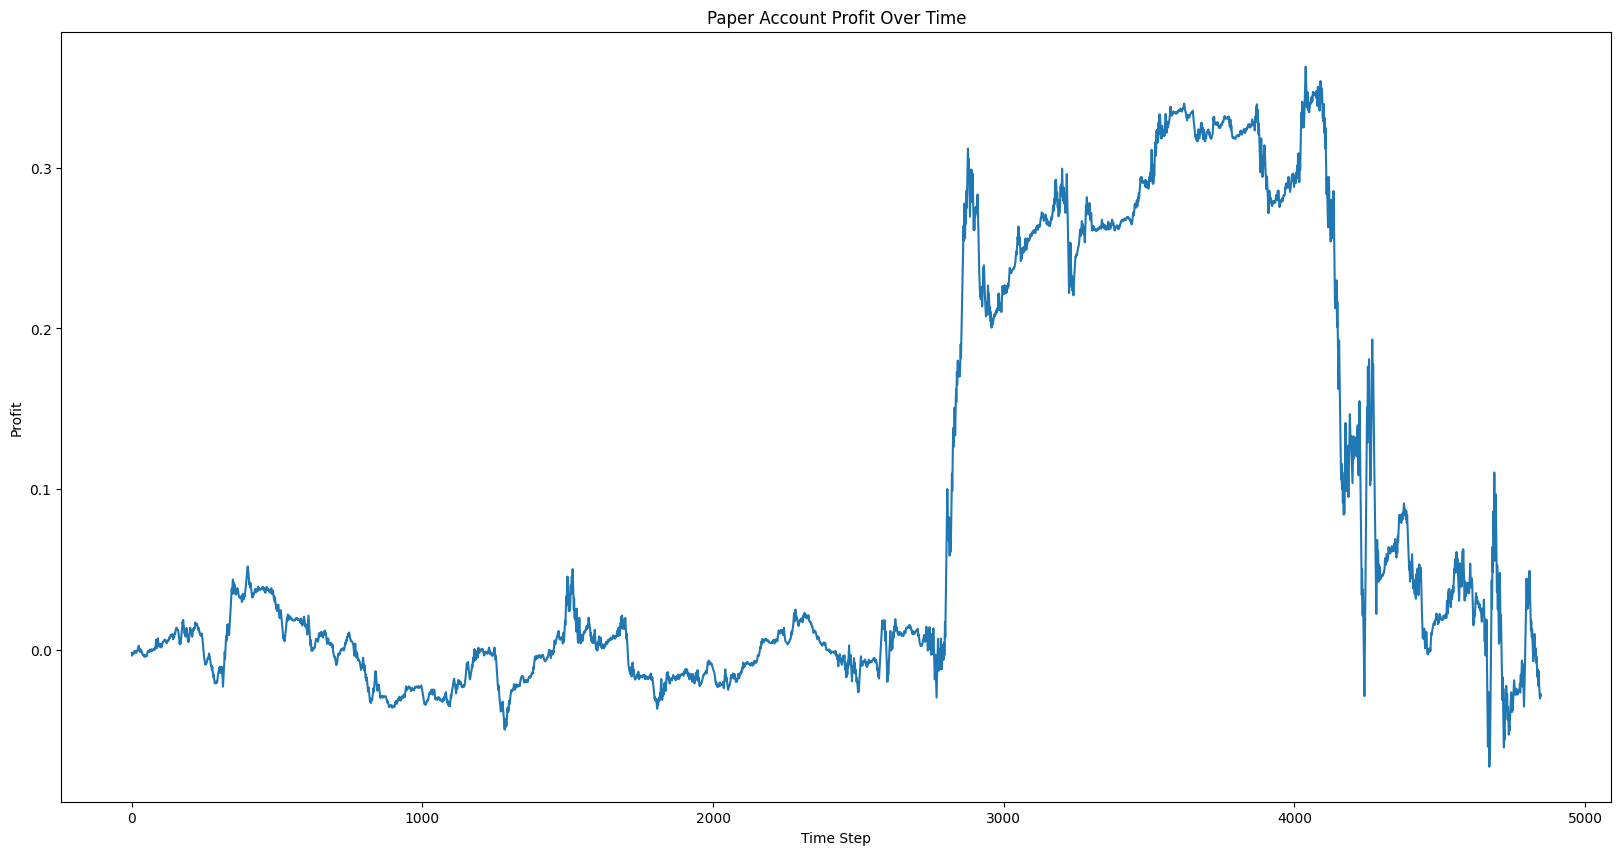

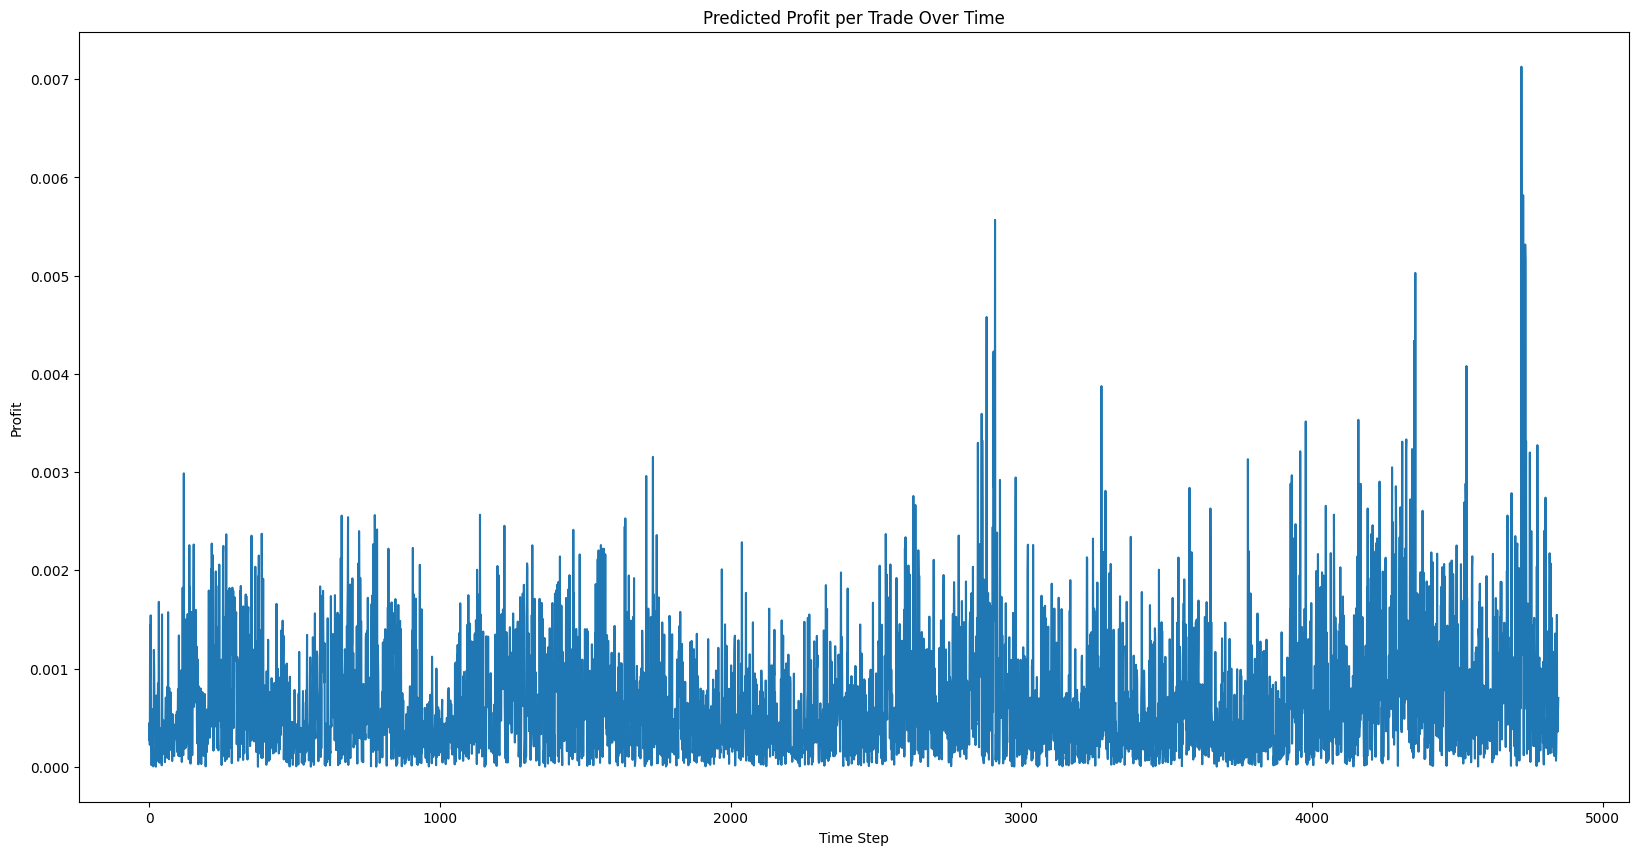

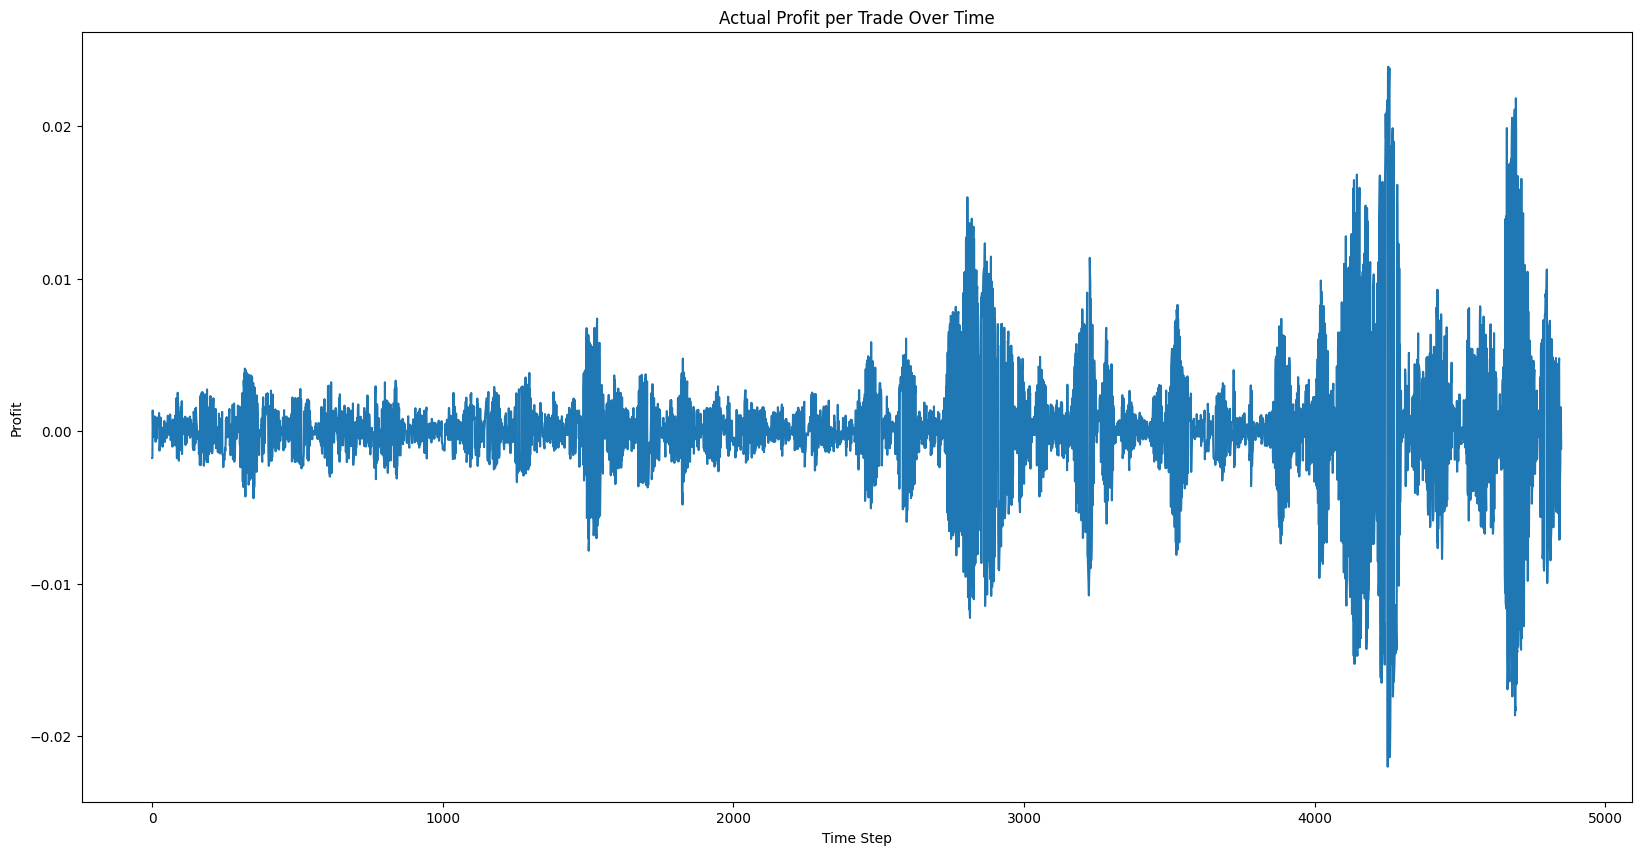

In [61]:
plt.plot(paper_account_profit_list)
plt.title('Paper Account Profit Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_predicted_list)
plt.title('Predicted Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_actual_list)
plt.title('Actual Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

In [62]:
# caclulate accuracy only with the actual results

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

profit_per_trade_actual_5Kdata_500Kmodel_df = pd.read_csv('profit_per_trade_actual_5Kdata_500Kmodel.csv')
profit_per_trade_actual_5Kdata_500Kmodel_list = profit_per_trade_actual_5Kdata_500Kmodel_df['Profit per Trade Actual'].tolist()

profit_per_trade_actual_5Kdata_500Kmodel_list_binary = profit_per_trade_actual_5Kdata_500Kmodel_list_binary = [0]*len(profit_per_trade_actual_5Kdata_500Kmodel_list)

for i in range(len(profit_per_trade_actual_5Kdata_500Kmodel_list)):
    if profit_per_trade_actual_5Kdata_500Kmodel_list[i] >= 0:
        profit_per_trade_actual_5Kdata_500Kmodel_list_binary[i] = 1
    elif profit_per_trade_actual_5Kdata_500Kmodel_list[i] < 0:
        profit_per_trade_actual_5Kdata_500Kmodel_list_binary[i] = 0
    
accuracy = profit_per_trade_actual_5Kdata_500Kmodel_list_binary.count(1)/len(profit_per_trade_actual_5Kdata_500Kmodel_list_binary)

print("for 500K model on the last 5K data:")
print(f"Accuracy: {accuracy}")

for 500K model on the last 5K data:
Accuracy: 0.4943287275726954


start_point: 1937572

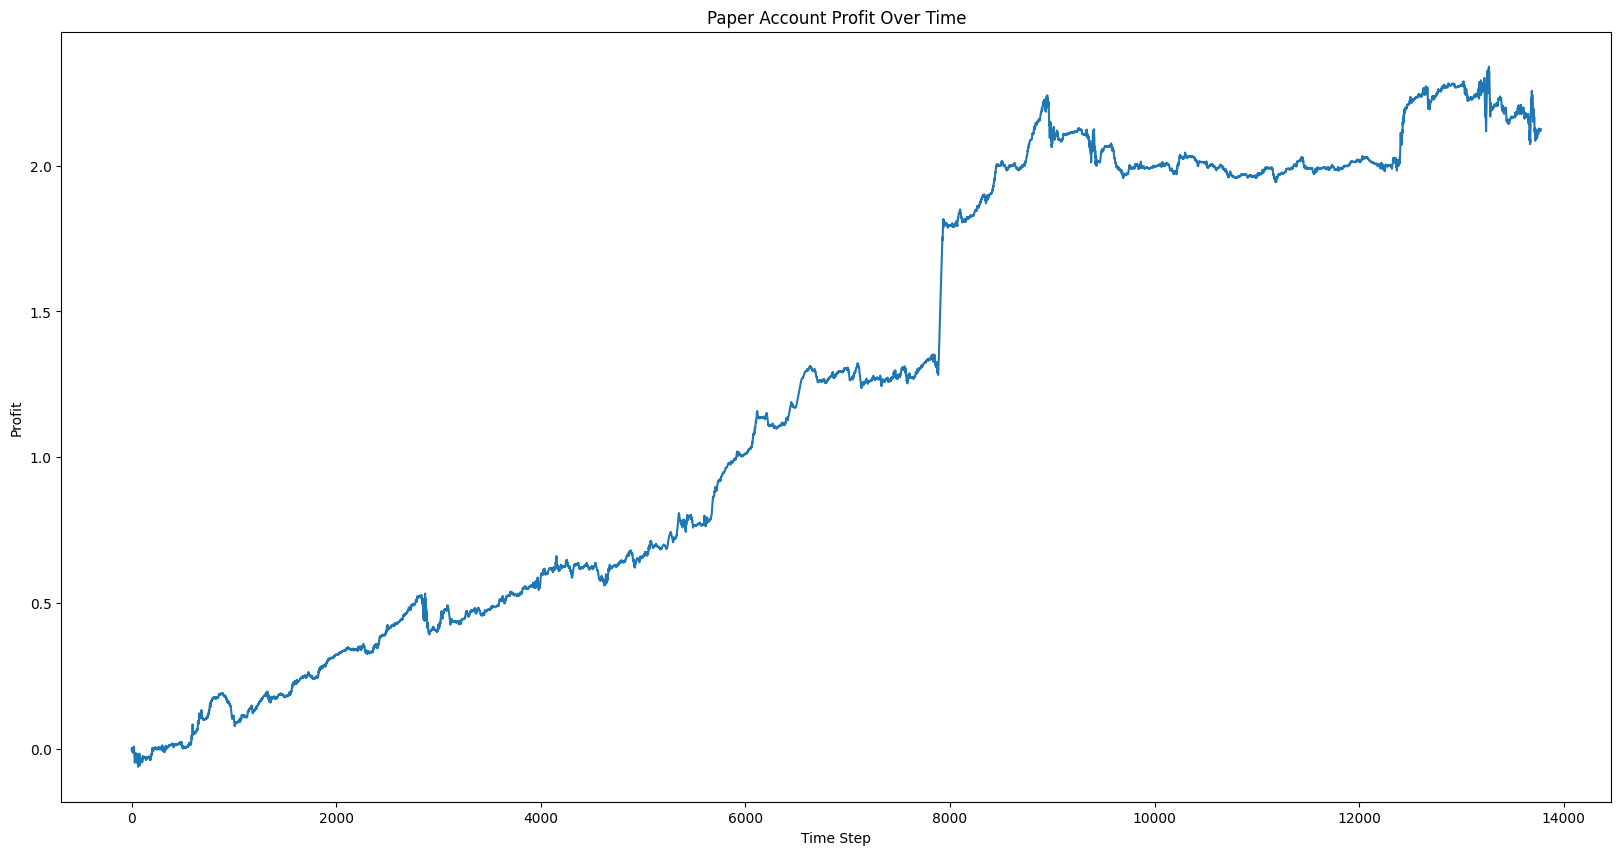

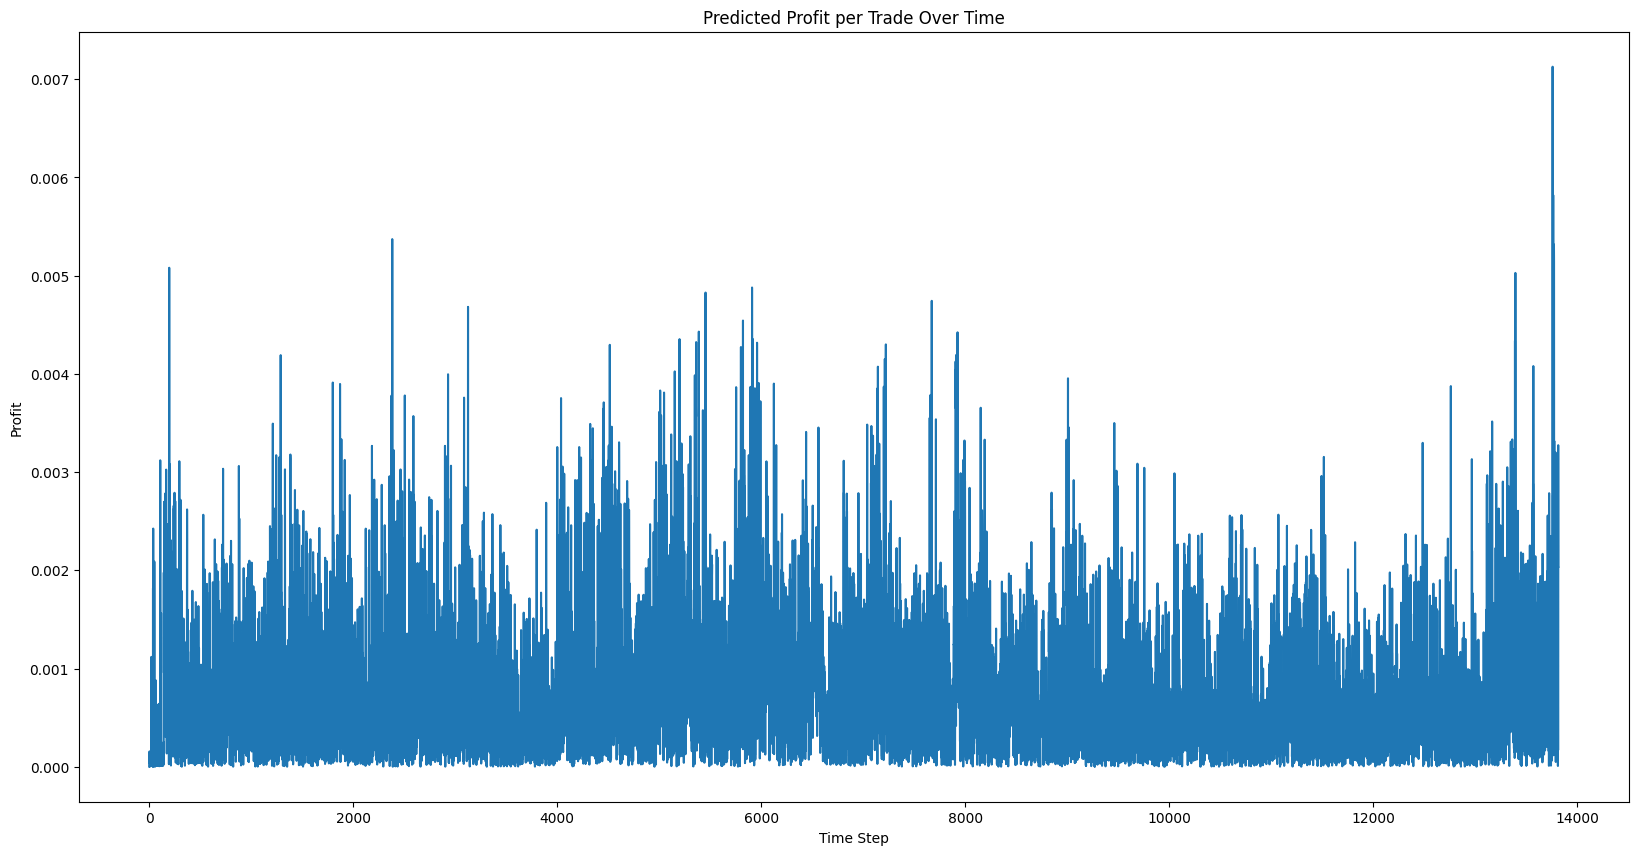

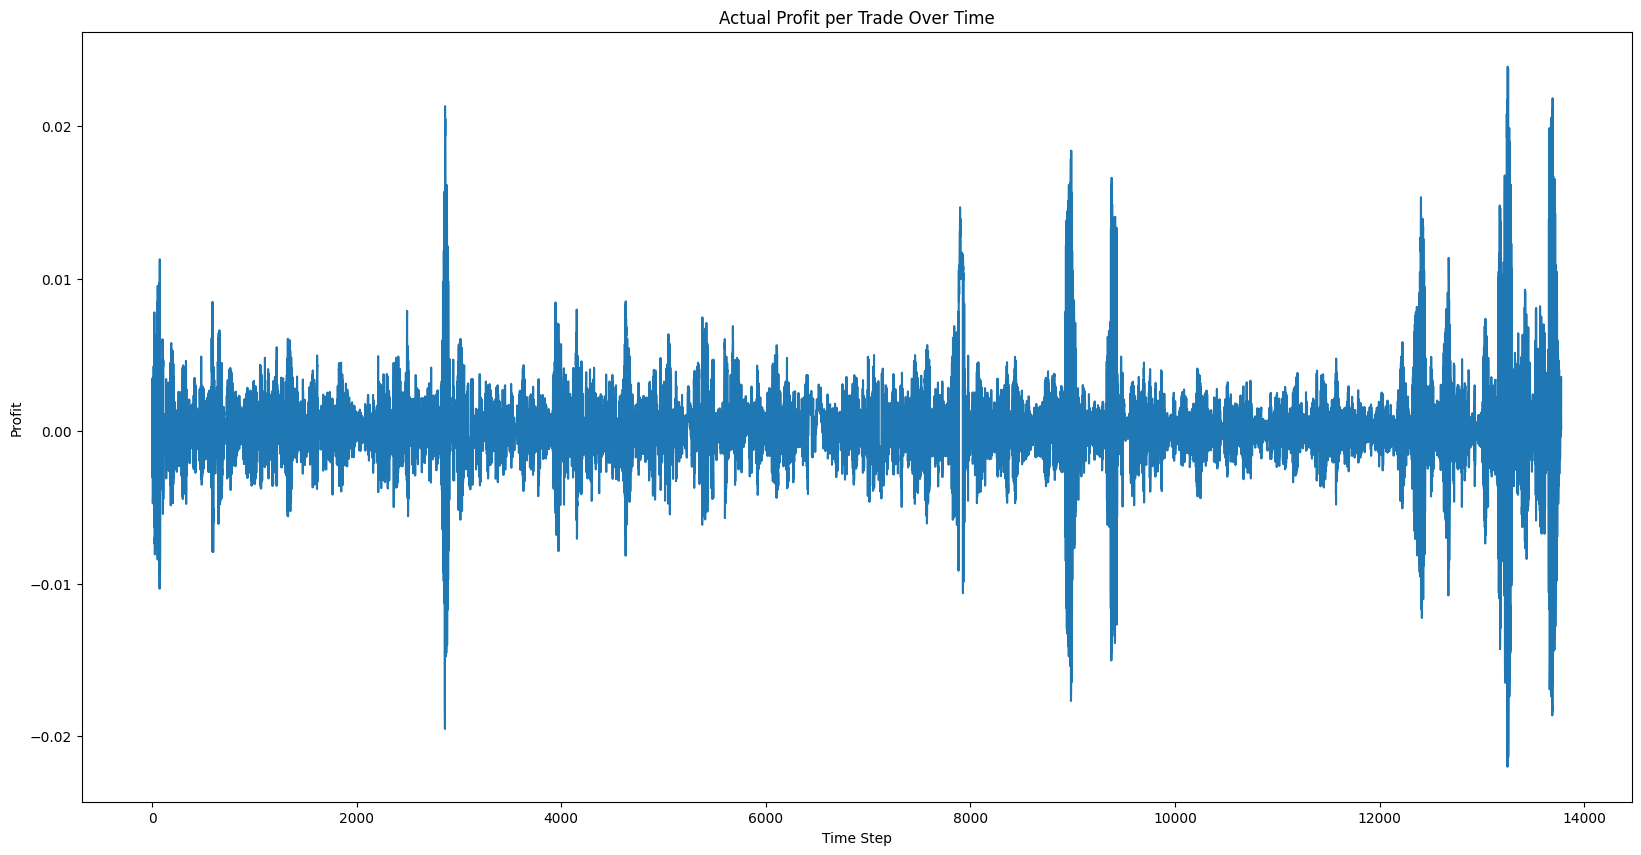

In [84]:
# for 2M model, only the last 5K, with stop loss, 150 min wait time, 0.005 stop loss
%reset -f
import pandas as pd
import numpy as np
import pandas as pd
from Get_balance import get_free_btc, get_free_usd, get_free_usdt
from joblib import dump, load
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import matplotlib.pyplot as plt

# define the stop loss ratio (e.g., 5%)
stop_loss = 0.005 # in US dollars

# define the wait time in terms of number of steps
wait_time_steps = 150 # in minutes

n_steps = 30

delta_t_trading = 60

historic_data_input_filename = "../Prediction_Model/LSTM/BTCUSDT4Y1MKline_cleaned_24features_nSteps"+str(n_steps)+".csv"
historic_df = pd.read_csv(historic_data_input_filename)
historic_df=historic_df[['Open Time','Close', 'Volume']]

model_parameters_file = '../Prediction_Model/GradientBoosting/GB_model_data_2M_main_parameters_10000_1000_2_1_10_10.pkl'

paper_trading=True
symbol = 'BTC/USDT'
Exchange_Comission=0
position_ratio=0.02
quantity=0
type="MARKET"
trade_approved = False
num_approved_trades=0
trade_comission=0

def fetch_historic_data(start, end):
    return historic_df[start : end].copy()

model = GradientBoostingRegressor(n_estimators=10000,  
                                  max_depth=1000,      
                                  min_samples_split=2,
                                  learning_rate=1, 
                                  min_samples_leaf=10,
                                  n_iter_no_change=10, 
                                  loss='squared_error')

model = joblib.load(model_parameters_file)

def trade_evaluation():

    global num_approved_trades

    side=None

    if paper_trading==True:
        U=1
        BTC_balance=0.00193116*U
        USDT_balance=47.79670558*U
    
    elif paper_trading==False:
        BTC_balance=get_free_btc()
        USDT_balance=get_free_usdt()
  
    # position ratio: 0.02
    # BTC_balance=0.00193116

    quantity_long=position_ratio*BTC_balance
    quantity_short=position_ratio*USDT_balance/current_price

    trade_comission_long=0
    trade_comission_short=0

    potential_profit_long=(predicted_price-current_price)*quantity_long
    potential_profit_short=-(predicted_price-current_price)*quantity_short

    if potential_profit_long > (trade_comission_long):
        side="BUY"
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_long
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    elif potential_profit_short> (trade_comission_short):
        side='SELL'
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_short
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    else:
        side='None'
        trade_approved=False


    if side=='BUY':
        quantity=quantity_long
        trade_comission=trade_comission_long
    elif side=='SELL':
        quantity=quantity_short
        trade_comission=trade_comission_short
    else:
        quantity=0
        trade_comission=0

    return trade_approved, side, quantity

prediction = []

start_point = len(historic_df) - 20000
end_point = start_point + n_steps + 1
# start_point = 0
# end_point = start_point + n_steps + 1
iteration_step = 1

profit_per_trade_predicted_list = [] # profit_predicted_list is the storage of the profit of each trade over time
profit_per_trade_predicted = 0 # profit_predicted is the profit of the current trade
profit_per_trade_actual_list = [] # profit_per_trade_list is the profit of each trade
profit_per_trade_actual = 0 # profit_per_trade is the profit of the current trade
paper_account_profit_list = [] # paper_account_profit_list is the accumulated profit of the paper account
paper_account_profit=0 # paper_account_profit is the profit of the paper account at the current time step

while end_point < len(historic_df) and (end_point + 2 * delta_t_trading < len(historic_df)):

    df = fetch_historic_data(start_point, end_point) 
    df=df[['Open Time','Close', 'Volume']]

    predicting_index = df.columns.get_loc('Close')

    current_price = float(df.iloc[-1]['Close'])

    scaled_data = df.values

    X = []
    for i in range(n_steps, len(scaled_data)):
        X.append(scaled_data[i - n_steps:i])
    X = np.array(X)

    n_features = X.shape[2]
    X = X.reshape((X.shape[0], X.shape[1], n_features))

    # flatten input
    n_input = X.shape[1] * X.shape[2]
    X_flat = X.reshape((X.shape[0], n_input))

    predicted_price = model.predict(X_flat)

    trade_approved, side, quantity = trade_evaluation()

    if trade_approved:
        
        if paper_trading==True:

            if side=='SELL':

                sold_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_bought_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))
                if (sold_price - SecTrade_bought_price)*quantity > stop_loss:
                    start_point += wait_time_steps
                    end_point += wait_time_steps
                    continue

            elif side=='BUY':

                purchased_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_sold_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))

                if (purchased_price - SecTrade_sold_price)*quantity > stop_loss:
                    start_point += wait_time_steps
                    end_point += wait_time_steps
                    continue  # skip the rest of the loop and start a new iteration

                
    paper_account_profit_list.append(paper_account_profit)
    profit_per_trade_actual_list.append(profit_per_trade_actual)

    start_point += iteration_step
    end_point += iteration_step
    print("\rstart_point: {}".format(start_point), end="")

profit_account_actual_df = pd.DataFrame(paper_account_profit_list, columns=['Paper Account Profit'])
profit_per_trade_predicted_df = pd.DataFrame(profit_per_trade_predicted_list, columns=['Profit per Trade Predicted'])
profit_per_trade_actual_df = pd.DataFrame(profit_per_trade_actual_list, columns=['Profit per Trade Actual'])
profit_account_actual_df.to_csv('profit_account_actual_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_predicted_df.to_csv('profit_per_trade_predicted_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_actual_df.to_csv('profit_per_trade_actual_5Kdata_500Kmodel.csv', index=False)

plt.plot(paper_account_profit_list)
plt.title('Paper Account Profit Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_predicted_list)
plt.title('Predicted Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_actual_list)
plt.title('Actual Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

start_point: 1937644

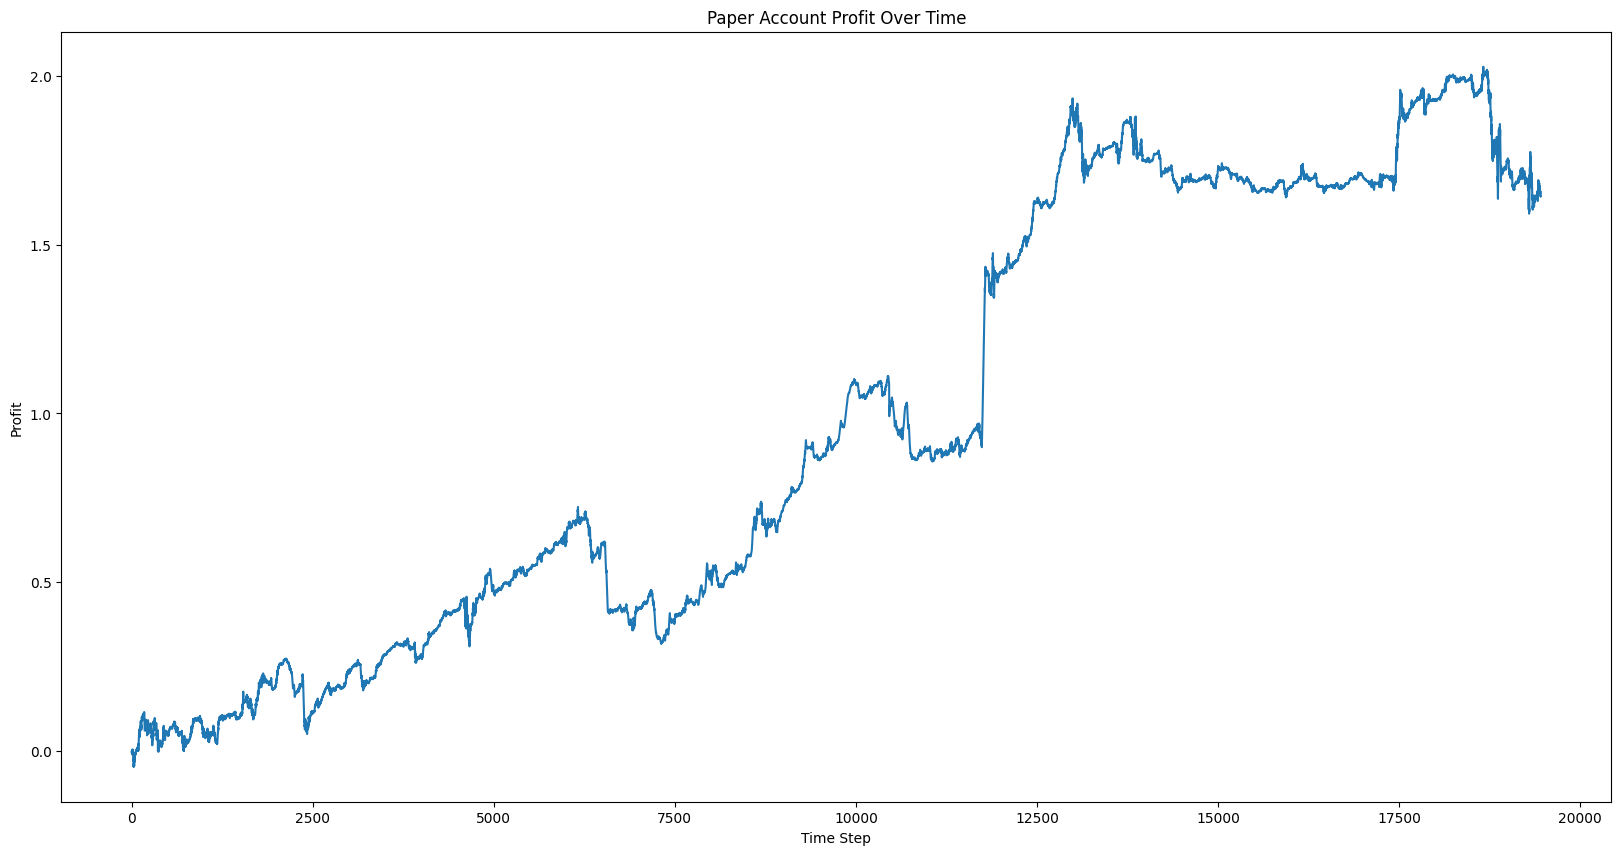

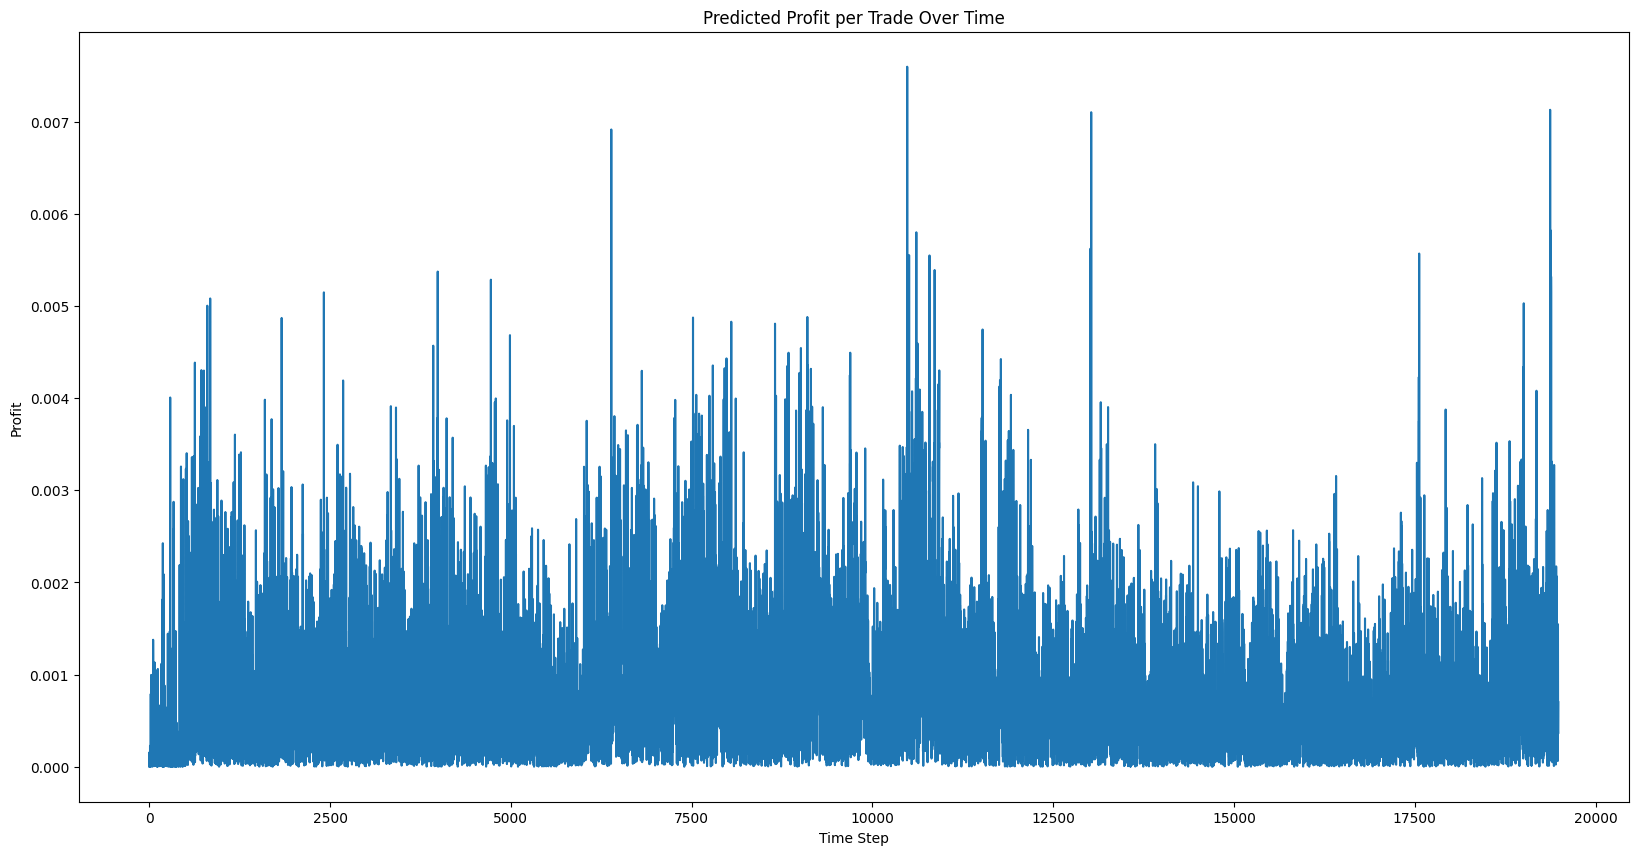

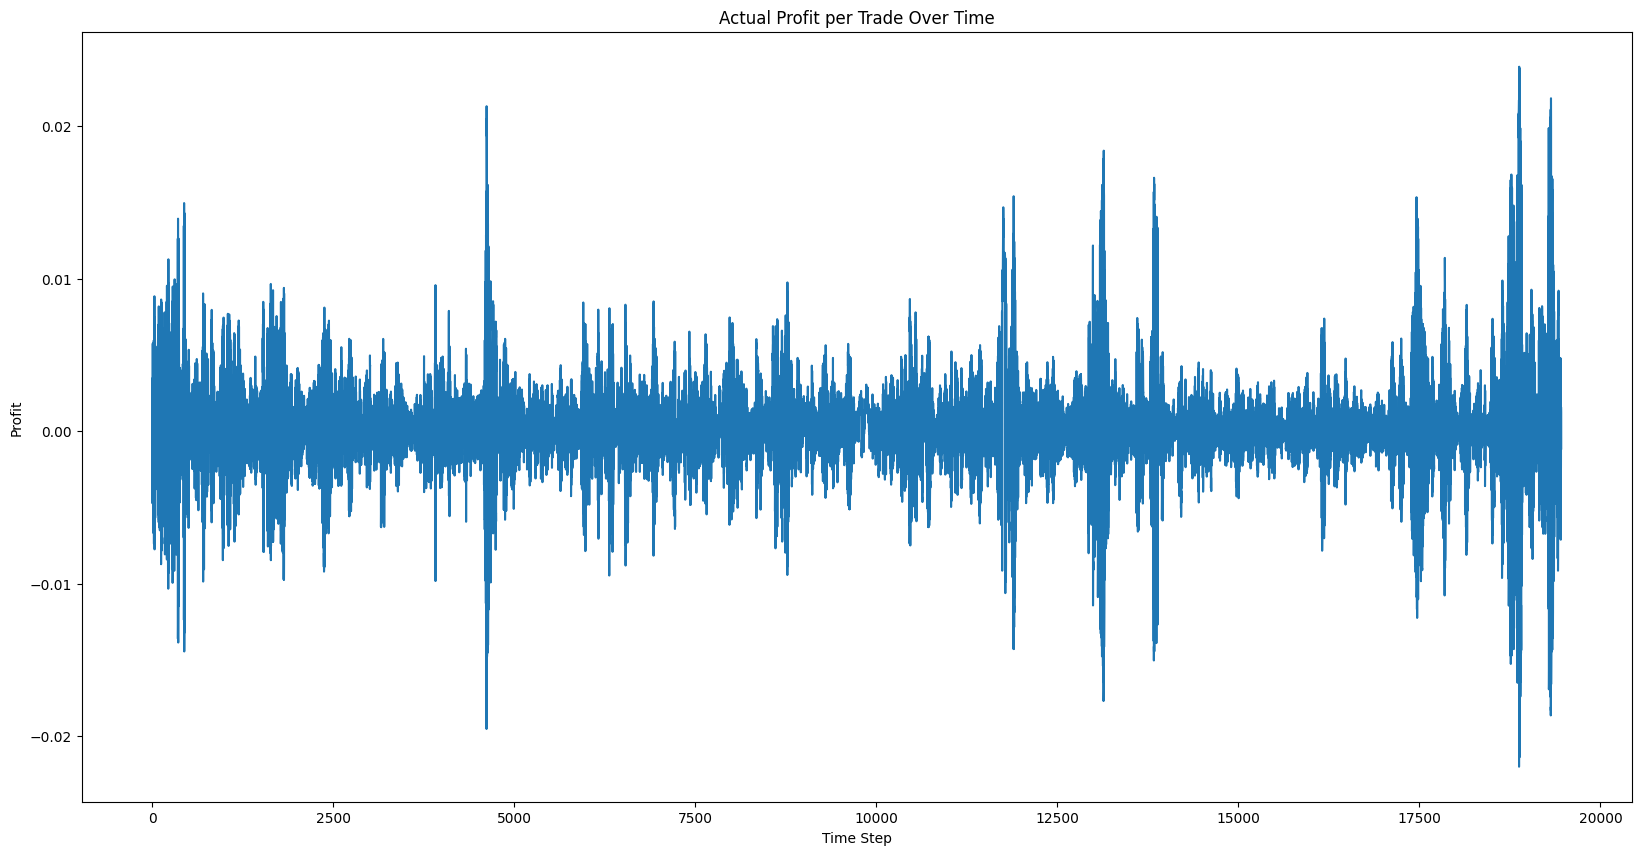

In [92]:
# for 2M model, only the last 5K, with stop loss, ? min wait time, 0.005 stop loss
%reset -f
import pandas as pd
import numpy as np
import pandas as pd
from Get_balance import get_free_btc, get_free_usd, get_free_usdt
from joblib import dump, load
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import matplotlib.pyplot as plt

# define the stop loss ratio (e.g., 5%)
stop_loss = 0.01 # in US dollars

# define the wait time in terms of number of steps
wait_time_steps = 15 # in minutes

n_steps = 30

delta_t_trading = 60

historic_data_input_filename = "../Prediction_Model/LSTM/BTCUSDT4Y1MKline_cleaned_24features_nSteps"+str(n_steps)+".csv"
historic_df = pd.read_csv(historic_data_input_filename)
historic_df=historic_df[['Open Time','Close', 'Volume']]

model_parameters_file = '../Prediction_Model/GradientBoosting/GB_model_data_2M_main_parameters_10000_1000_2_1_10_10.pkl'

paper_trading=True
symbol = 'BTC/USDT'
Exchange_Comission=0
position_ratio=0.02
quantity=0
type="MARKET"
trade_approved = False
num_approved_trades=0
trade_comission=0

def fetch_historic_data(start, end):
    return historic_df[start : end].copy()

model = GradientBoostingRegressor(n_estimators=10000,  
                                  max_depth=1000,      
                                  min_samples_split=2,
                                  learning_rate=1, 
                                  min_samples_leaf=10,
                                  n_iter_no_change=10, 
                                  loss='squared_error')

model = joblib.load(model_parameters_file)

def trade_evaluation():

    global num_approved_trades

    side=None

    if paper_trading==True:
        U=1
        BTC_balance=0.00193116*U
        USDT_balance=47.79670558*U
    
    elif paper_trading==False:
        BTC_balance=get_free_btc()
        USDT_balance=get_free_usdt()
  
    # position ratio: 0.02
    # BTC_balance=0.00193116

    quantity_long=position_ratio*BTC_balance
    quantity_short=position_ratio*USDT_balance/current_price

    trade_comission_long=0
    trade_comission_short=0

    potential_profit_long=(predicted_price-current_price)*quantity_long
    potential_profit_short=-(predicted_price-current_price)*quantity_short

    if potential_profit_long > (trade_comission_long):
        side="BUY"
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_long
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    elif potential_profit_short> (trade_comission_short):
        side='SELL'
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_short
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    else:
        side='None'
        trade_approved=False


    if side=='BUY':
        quantity=quantity_long
        trade_comission=trade_comission_long
    elif side=='SELL':
        quantity=quantity_short
        trade_comission=trade_comission_short
    else:
        quantity=0
        trade_comission=0

    return trade_approved, side, quantity

prediction = []

start_point = len(historic_df) - 20000
end_point = start_point + n_steps + 1
# start_point = 0
# end_point = start_point + n_steps + 1
iteration_step = 1

profit_per_trade_predicted_list = [] # profit_predicted_list is the storage of the profit of each trade over time
profit_per_trade_predicted = 0 # profit_predicted is the profit of the current trade
profit_per_trade_actual_list = [] # profit_per_trade_list is the profit of each trade
profit_per_trade_actual = 0 # profit_per_trade is the profit of the current trade
paper_account_profit_list = [] # paper_account_profit_list is the accumulated profit of the paper account
paper_account_profit=0 # paper_account_profit is the profit of the paper account at the current time step

while end_point < len(historic_df) and (end_point + 2 * delta_t_trading < len(historic_df)):

    df = fetch_historic_data(start_point, end_point) 
    df=df[['Open Time','Close', 'Volume']]

    predicting_index = df.columns.get_loc('Close')

    current_price = float(df.iloc[-1]['Close'])

    scaled_data = df.values

    X = []
    for i in range(n_steps, len(scaled_data)):
        X.append(scaled_data[i - n_steps:i])
    X = np.array(X)

    n_features = X.shape[2]
    X = X.reshape((X.shape[0], X.shape[1], n_features))

    # flatten input
    n_input = X.shape[1] * X.shape[2]
    X_flat = X.reshape((X.shape[0], n_input))

    predicted_price = model.predict(X_flat)

    trade_approved, side, quantity = trade_evaluation()

    if trade_approved:
        
        if paper_trading==True:

            if side=='SELL':

                sold_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_bought_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))
                if (sold_price - SecTrade_bought_price)*quantity > stop_loss:
                    start_point += wait_time_steps
                    end_point += wait_time_steps
                    continue

            elif side=='BUY':

                purchased_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_sold_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))

                if (purchased_price - SecTrade_sold_price)*quantity > stop_loss:
                    start_point += wait_time_steps
                    end_point += wait_time_steps
                    continue  # skip the rest of the loop and start a new iteration

                
    paper_account_profit_list.append(paper_account_profit)
    profit_per_trade_actual_list.append(profit_per_trade_actual)

    start_point += iteration_step
    end_point += iteration_step
    print("\rstart_point: {}".format(start_point), end="")

profit_account_actual_df = pd.DataFrame(paper_account_profit_list, columns=['Paper Account Profit'])
profit_per_trade_predicted_df = pd.DataFrame(profit_per_trade_predicted_list, columns=['Profit per Trade Predicted'])
profit_per_trade_actual_df = pd.DataFrame(profit_per_trade_actual_list, columns=['Profit per Trade Actual'])
profit_account_actual_df.to_csv('profit_account_actual_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_predicted_df.to_csv('profit_per_trade_predicted_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_actual_df.to_csv('profit_per_trade_actual_5Kdata_500Kmodel.csv', index=False)

plt.plot(paper_account_profit_list)
plt.title('Paper Account Profit Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_predicted_list)
plt.title('Predicted Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_actual_list)
plt.title('Actual Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

In [94]:
# average of profit per trade
# print('Average of profit per trade predicted: ', np.mean(profit_per_trade_actual_list))
initial_money_in_accoumt = 100
number_of_trades = len(profit_per_trade_actual_list)
growth_per_trade = (np.mean(profit_per_trade_actual_list)/initial_money_in_accoumt)
final_money_in_account = initial_money_in_accoumt * (1 + growth_per_trade)**number_of_trades
print("final money in account: ", final_money_in_account)

Average of profit per trade predicted:  9.091140095841827e-05
final money in account:  101.78478441360612


start_point: 1937633

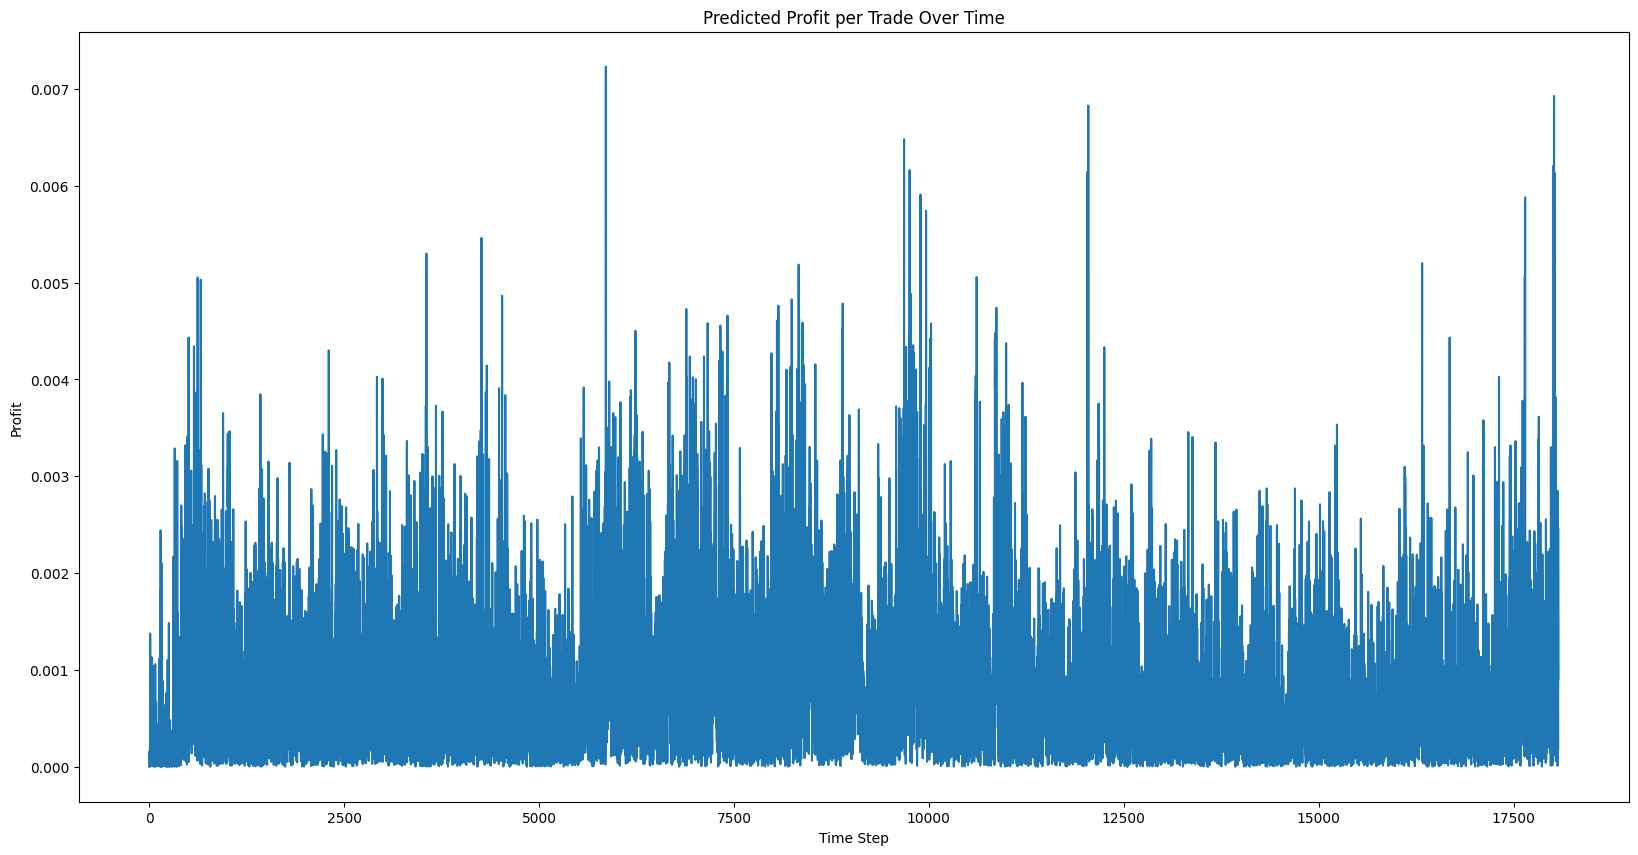

BTC_balance: 0.002301907120738165
USDT_balance: 41.57329857445144
total account value: 107.9923885218032


In [98]:
# for 2M model, only the last 5K, with stop loss, expoential growth
%reset -f
import pandas as pd
import numpy as np
import pandas as pd
from Get_balance import get_free_btc, get_free_usd, get_free_usdt
from joblib import dump, load
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import matplotlib.pyplot as plt

# define the stop loss ratio (e.g., 5%)
stop_loss = 0.005 # in US dollars

# define the wait time in terms of number of steps
wait_time_steps = 15 # in minutes

n_steps = 30

delta_t_trading = 60

historic_data_input_filename = "../Prediction_Model/LSTM/BTCUSDT4Y1MKline_cleaned_24features_nSteps"+str(n_steps)+".csv"
historic_df = pd.read_csv(historic_data_input_filename)
historic_df=historic_df[['Open Time','Close', 'Volume']]

model_parameters_file = '../Prediction_Model/GradientBoosting/GB_model_data_2M_main_parameters_10000_1000_2_1_10_10.pkl'

paper_trading=True
symbol = 'BTC/USDT'
Exchange_Comission=0
position_ratio=0.02
quantity=0
type="MARKET"
trade_approved = False
num_approved_trades=0
trade_comission=0
global initial_run
initial_run = True

def fetch_historic_data(start, end):
    return historic_df[start : end].copy()

model = GradientBoostingRegressor(n_estimators=10000,  
                                  max_depth=1000,      
                                  min_samples_split=2,
                                  learning_rate=1, 
                                  min_samples_leaf=10,
                                  n_iter_no_change=10, 
                                  loss='squared_error')

model = joblib.load(model_parameters_file)

def trade_evaluation():

    global num_approved_trades
    global BTC_balance
    global USDT_balance
    global initial_run

    side=None

    if paper_trading==True and initial_run==True:
        U=1
        BTC_balance=0.00193116*U
        USDT_balance=47.79670558*U
        initial_run=False
    
    elif paper_trading==False:
        BTC_balance=get_free_btc()
        USDT_balance=get_free_usdt()
  
    # position ratio: 0.02
    # BTC_balance=0.00193116

    quantity_long=position_ratio*BTC_balance
    quantity_short=position_ratio*USDT_balance/current_price

    trade_comission_long=0
    trade_comission_short=0

    potential_profit_long=(predicted_price-current_price)*quantity_long
    potential_profit_short=-(predicted_price-current_price)*quantity_short

    if potential_profit_long > (trade_comission_long):
        side="BUY"
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_long
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    elif potential_profit_short> (trade_comission_short):
        side='SELL'
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_short
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    else:
        side='None'
        trade_approved=False


    if side=='BUY':
        quantity=quantity_long
        trade_comission=trade_comission_long
    elif side=='SELL':
        quantity=quantity_short
        trade_comission=trade_comission_short
    else:
        quantity=0
        trade_comission=0

    return trade_approved, side, quantity

prediction = []

start_point = len(historic_df) - 20000
end_point = start_point + n_steps + 1
# start_point = 0
# end_point = start_point + n_steps + 1
iteration_step = 1

profit_per_trade_predicted_list = [] # profit_predicted_list is the storage of the profit of each trade over time
profit_per_trade_predicted = 0 # profit_predicted is the profit of the current trade
profit_per_trade_actual_list = [] # profit_per_trade_list is the profit of each trade
profit_per_trade_actual = 0 # profit_per_trade is the profit of the current trade
paper_account_profit_list = [] # paper_account_profit_list is the accumulated profit of the paper account
paper_account_profit=0 # paper_account_profit is the profit of the paper account at the current time step

while end_point < len(historic_df) and (end_point + 2 * delta_t_trading < len(historic_df)):

    df = fetch_historic_data(start_point, end_point) 
    df=df[['Open Time','Close', 'Volume']]

    predicting_index = df.columns.get_loc('Close')

    current_price = float(df.iloc[-1]['Close'])

    scaled_data = df.values

    X = []
    for i in range(n_steps, len(scaled_data)):
        X.append(scaled_data[i - n_steps:i])
    X = np.array(X)

    n_features = X.shape[2]
    X = X.reshape((X.shape[0], X.shape[1], n_features))

    # flatten input
    n_input = X.shape[1] * X.shape[2]
    X_flat = X.reshape((X.shape[0], n_input))

    predicted_price = model.predict(X_flat)

    trade_approved, side, quantity = trade_evaluation()

    if trade_approved:
        
        if paper_trading==True:

            if side=='SELL':

                sold_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_bought_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))
                USDT_balance += profit_per_trade_actual
                if (sold_price - SecTrade_bought_price)*quantity > stop_loss:
                    start_point += wait_time_steps
                    end_point += wait_time_steps
                    continue

            elif side=='BUY':

                purchased_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_sold_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                BTC_balance += profit_per_trade_actual/SecTrade_sold_price

                if (purchased_price - SecTrade_sold_price)*quantity > stop_loss:
                    start_point += wait_time_steps
                    end_point += wait_time_steps
                    continue  # skip the rest of the loop and start a new iteration

                
    paper_account_profit_list.append(paper_account_profit)
    profit_per_trade_actual_list.append(profit_per_trade_actual)

    start_point += iteration_step
    end_point += iteration_step
    print("\rstart_point: {}".format(start_point), end="")

profit_account_actual_df = pd.DataFrame(paper_account_profit_list, columns=['Paper Account Profit'])
profit_per_trade_predicted_df = pd.DataFrame(profit_per_trade_predicted_list, columns=['Profit per Trade Predicted'])
profit_per_trade_actual_df = pd.DataFrame(profit_per_trade_actual_list, columns=['Profit per Trade Actual'])
profit_account_actual_df.to_csv('profit_account_actual_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_predicted_df.to_csv('profit_per_trade_predicted_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_actual_df.to_csv('profit_per_trade_actual_5Kdata_500Kmodel.csv', index=False)

plt.plot(paper_account_profit_list)
plt.title('Paper Account Profit Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_predicted_list)
plt.title('Predicted Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_actual_list)
plt.title('Actual Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

print("BTC_balance: {}".format(BTC_balance))
print("USDT_balance: {}".format(USDT_balance))
print("total account value: {}".format(BTC_balance*current_price+USDT_balance))

In [100]:
time_to_make_8_percent = 2 # in weeks
print(1.08**26)

7.396353211916874


start_point: 1937571

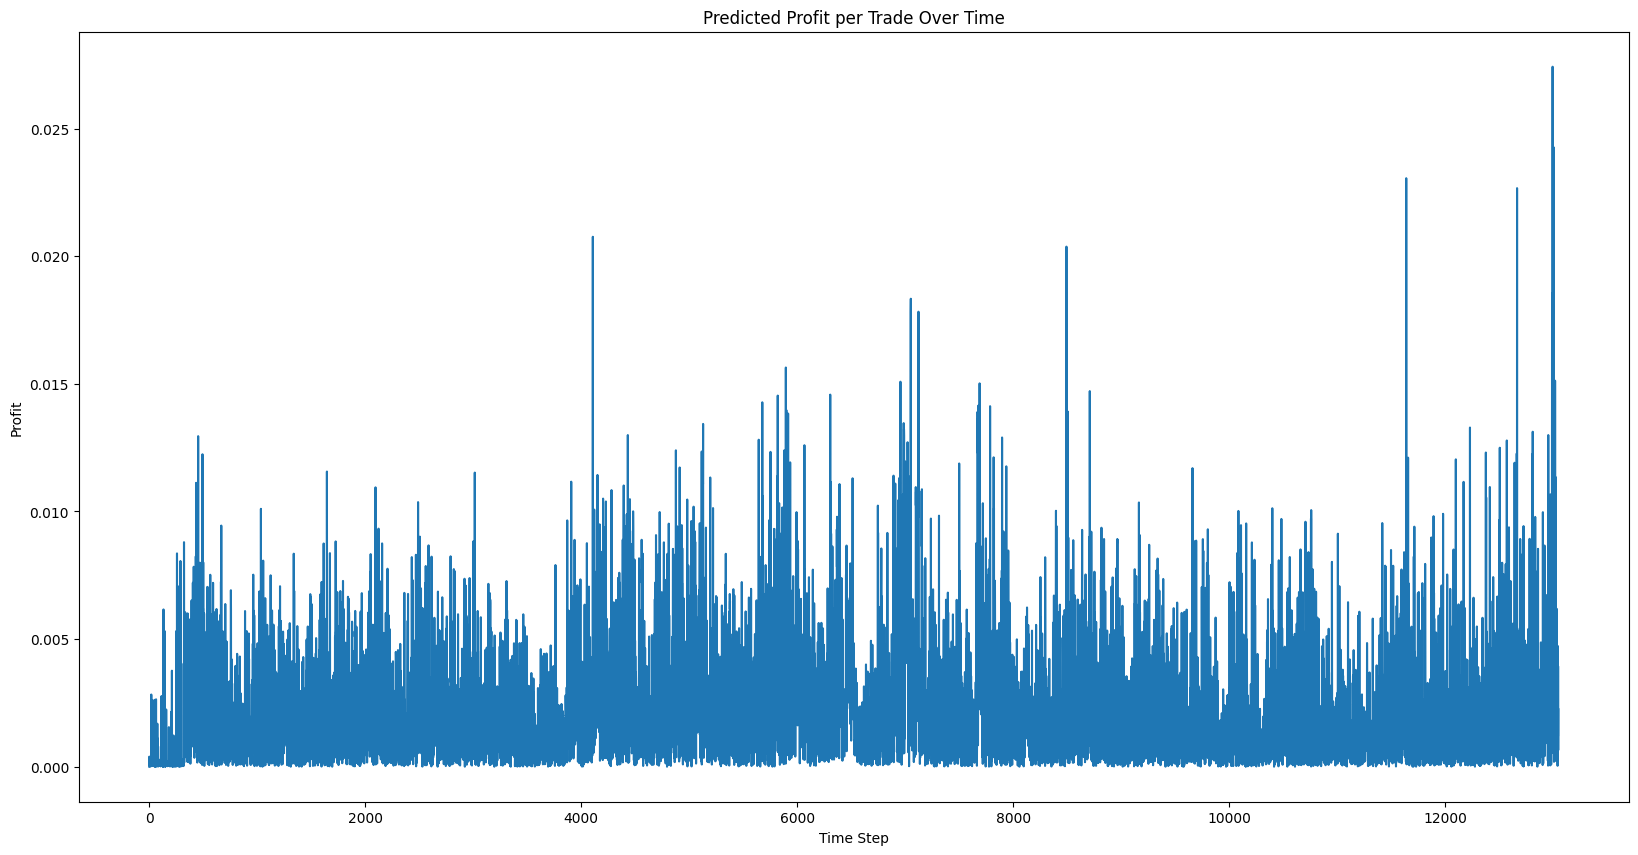

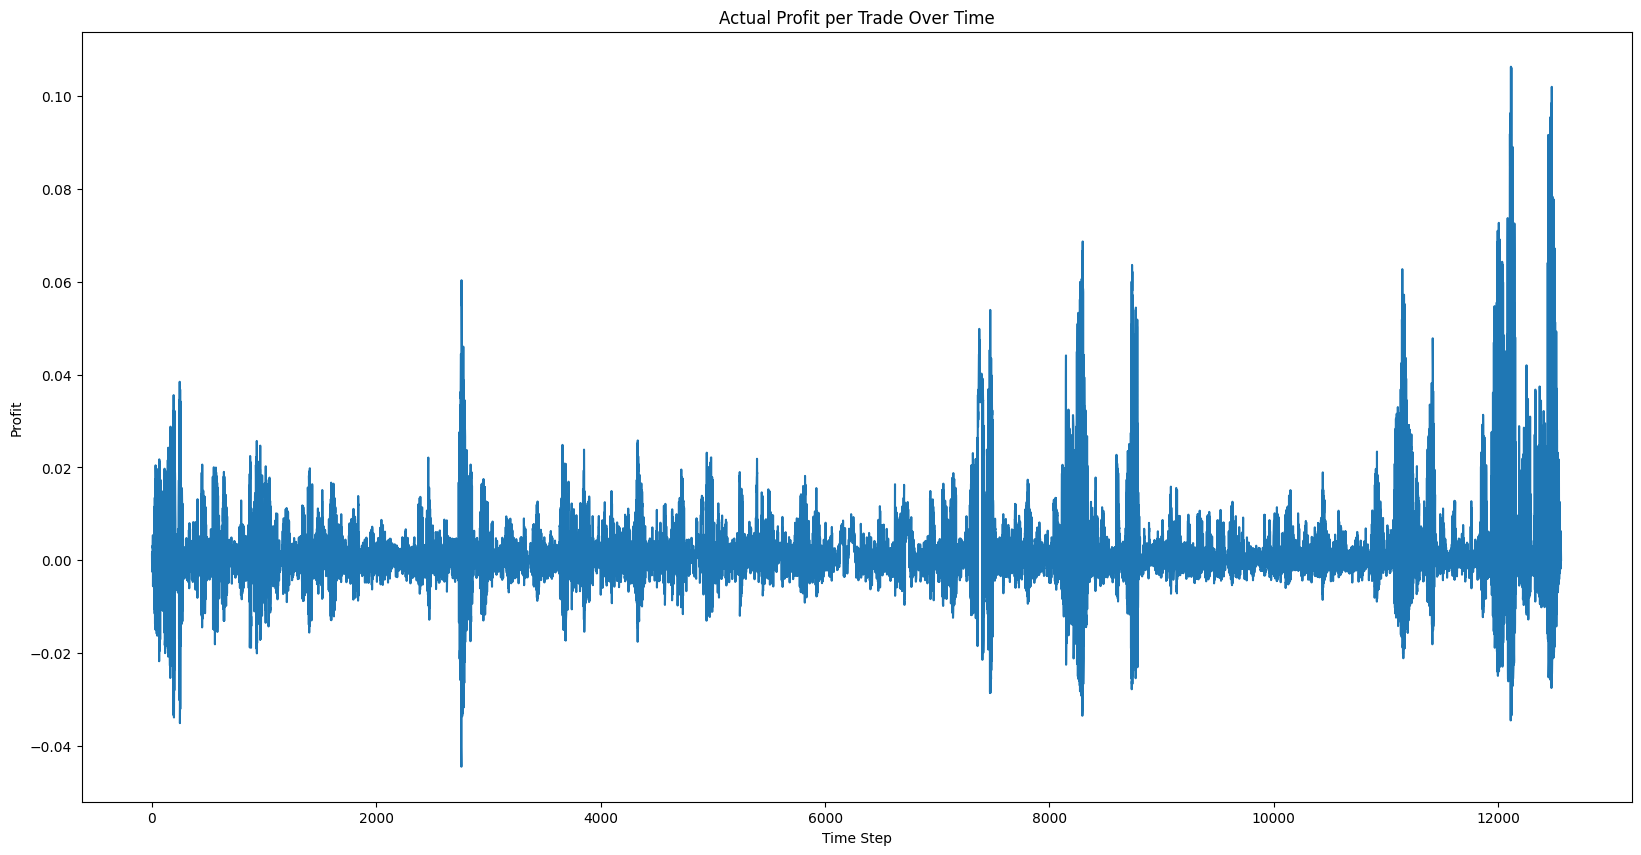

BTC_balance: 0.0036521359761045253
USDT_balance: 27.607185060589142
total account value: 132.98569738695053


In [101]:
# for 2M model, only the last 5K, with stop loss, expoential growth, 5% position ratio
%reset -f
import pandas as pd
import numpy as np
import pandas as pd
from Get_balance import get_free_btc, get_free_usd, get_free_usdt
from joblib import dump, load
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import matplotlib.pyplot as plt

# define the stop loss ratio (e.g., 5%)
stop_loss = 0.005 # in US dollars

# define the wait time in terms of number of steps
wait_time_steps = 15 # in minutes

n_steps = 30

delta_t_trading = 60

historic_data_input_filename = "../Prediction_Model/LSTM/BTCUSDT4Y1MKline_cleaned_24features_nSteps"+str(n_steps)+".csv"
historic_df = pd.read_csv(historic_data_input_filename)
historic_df=historic_df[['Open Time','Close', 'Volume']]

model_parameters_file = '../Prediction_Model/GradientBoosting/GB_model_data_2M_main_parameters_10000_1000_2_1_10_10.pkl'

paper_trading=True
symbol = 'BTC/USDT'
Exchange_Comission=0
position_ratio=0.05
quantity=0
type="MARKET"
trade_approved = False
num_approved_trades=0
trade_comission=0
global initial_run
initial_run = True

def fetch_historic_data(start, end):
    return historic_df[start : end].copy()

model = GradientBoostingRegressor(n_estimators=10000,  
                                  max_depth=1000,      
                                  min_samples_split=2,
                                  learning_rate=1, 
                                  min_samples_leaf=10,
                                  n_iter_no_change=10, 
                                  loss='squared_error')

model = joblib.load(model_parameters_file)

def trade_evaluation():

    global num_approved_trades
    global BTC_balance
    global USDT_balance
    global initial_run

    side=None

    if paper_trading==True and initial_run==True:
        U=1
        BTC_balance=0.00193116*U
        USDT_balance=47.79670558*U
        initial_run=False
    
    elif paper_trading==False:
        BTC_balance=get_free_btc()
        USDT_balance=get_free_usdt()
  
    # position ratio: 0.02
    # BTC_balance=0.00193116

    quantity_long=position_ratio*BTC_balance
    quantity_short=position_ratio*USDT_balance/current_price

    trade_comission_long=0
    trade_comission_short=0

    potential_profit_long=(predicted_price-current_price)*quantity_long
    potential_profit_short=-(predicted_price-current_price)*quantity_short

    if potential_profit_long > (trade_comission_long):
        side="BUY"
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_long
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    elif potential_profit_short> (trade_comission_short):
        side='SELL'
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_short
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    else:
        side='None'
        trade_approved=False


    if side=='BUY':
        quantity=quantity_long
        trade_comission=trade_comission_long
    elif side=='SELL':
        quantity=quantity_short
        trade_comission=trade_comission_short
    else:
        quantity=0
        trade_comission=0

    return trade_approved, side, quantity

prediction = []

start_point = len(historic_df) - 20000
end_point = start_point + n_steps + 1
# start_point = 0
# end_point = start_point + n_steps + 1
iteration_step = 1

profit_per_trade_predicted_list = [] # profit_predicted_list is the storage of the profit of each trade over time
profit_per_trade_predicted = 0 # profit_predicted is the profit of the current trade
profit_per_trade_actual_list = [] # profit_per_trade_list is the profit of each trade
profit_per_trade_actual = 0 # profit_per_trade is the profit of the current trade
paper_account_profit_list = [] # paper_account_profit_list is the accumulated profit of the paper account
paper_account_profit=0 # paper_account_profit is the profit of the paper account at the current time step

while end_point < len(historic_df) and (end_point + 2 * delta_t_trading < len(historic_df)):

    df = fetch_historic_data(start_point, end_point) 
    df=df[['Open Time','Close', 'Volume']]

    predicting_index = df.columns.get_loc('Close')

    current_price = float(df.iloc[-1]['Close'])

    scaled_data = df.values

    X = []
    for i in range(n_steps, len(scaled_data)):
        X.append(scaled_data[i - n_steps:i])
    X = np.array(X)

    n_features = X.shape[2]
    X = X.reshape((X.shape[0], X.shape[1], n_features))

    # flatten input
    n_input = X.shape[1] * X.shape[2]
    X_flat = X.reshape((X.shape[0], n_input))

    predicted_price = model.predict(X_flat)

    trade_approved, side, quantity = trade_evaluation()

    if trade_approved:
        
        if paper_trading==True:

            if side=='SELL':

                sold_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_bought_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))
                USDT_balance += profit_per_trade_actual
                if (sold_price - SecTrade_bought_price)*quantity > stop_loss:
                    start_point += wait_time_steps
                    end_point += wait_time_steps
                    continue

            elif side=='BUY':

                purchased_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_sold_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                BTC_balance += profit_per_trade_actual/SecTrade_sold_price

                if (purchased_price - SecTrade_sold_price)*quantity > stop_loss:
                    start_point += wait_time_steps
                    end_point += wait_time_steps
                    continue  # skip the rest of the loop and start a new iteration

                
    paper_account_profit_list.append(paper_account_profit)
    profit_per_trade_actual_list.append(profit_per_trade_actual)

    start_point += iteration_step
    end_point += iteration_step
    print("\rstart_point: {}".format(start_point), end="")

profit_account_actual_df = pd.DataFrame(paper_account_profit_list, columns=['Paper Account Profit'])
profit_per_trade_predicted_df = pd.DataFrame(profit_per_trade_predicted_list, columns=['Profit per Trade Predicted'])
profit_per_trade_actual_df = pd.DataFrame(profit_per_trade_actual_list, columns=['Profit per Trade Actual'])
profit_account_actual_df.to_csv('profit_account_actual_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_predicted_df.to_csv('profit_per_trade_predicted_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_actual_df.to_csv('profit_per_trade_actual_5Kdata_500Kmodel.csv', index=False)

plt.plot(paper_account_profit_list)
plt.title('Paper Account Profit Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_predicted_list)
plt.title('Predicted Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_actual_list)
plt.title('Actual Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

print("BTC_balance: {}".format(BTC_balance))
print("USDT_balance: {}".format(USDT_balance))
print("total account value: {}".format(BTC_balance*current_price+USDT_balance))

In [110]:
historic_data_input_filename = "../Prediction_Model/LSTM/BTCUSDT4Y1MKline_cleaned_24features_nSteps"+str(n_steps)+".csv"
historic_df = pd.read_csv(historic_data_input_filename)
historic_df=historic_df[['Open Time','Close', 'Volume']]
# change Open Time to datetime
historic_df['Open Time'] = pd.to_datetime(historic_df['Open Time'], unit='s')
# print the last 3 rows of historic_df
print(historic_df.iloc[3:])

                  Open Time     Close    Volume
3       2019-10-14 08:53:00   8303.39  0.003843
4       2019-10-14 08:54:00   8303.39  0.000000
5       2019-10-14 08:55:00   8303.69  0.009064
6       2019-10-14 08:56:00   8300.57  0.142999
7       2019-10-14 08:57:00   8300.57  0.001945
...                     ...       ...       ...
1937790 2023-06-21 05:15:00  28819.36  0.082080
1937791 2023-06-21 05:16:00  28829.99  0.032390
1937792 2023-06-21 05:17:00  28835.46  0.160400
1937793 2023-06-21 05:18:00  28830.01  0.012250
1937794 2023-06-21 05:19:00  28847.01  0.301840

[1937792 rows x 3 columns]


start_point: 16849

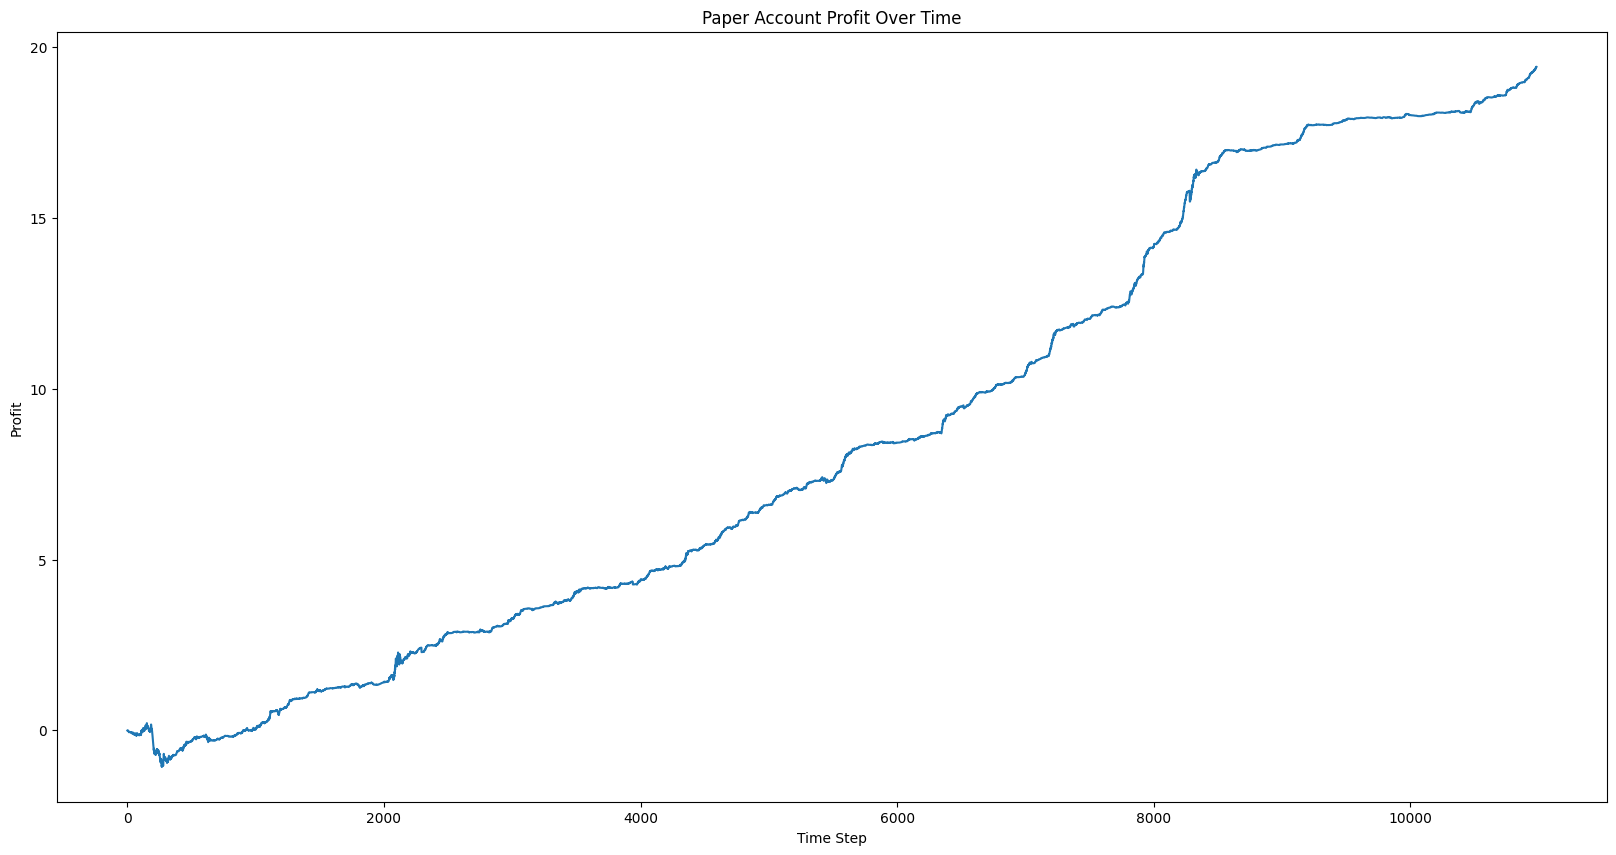

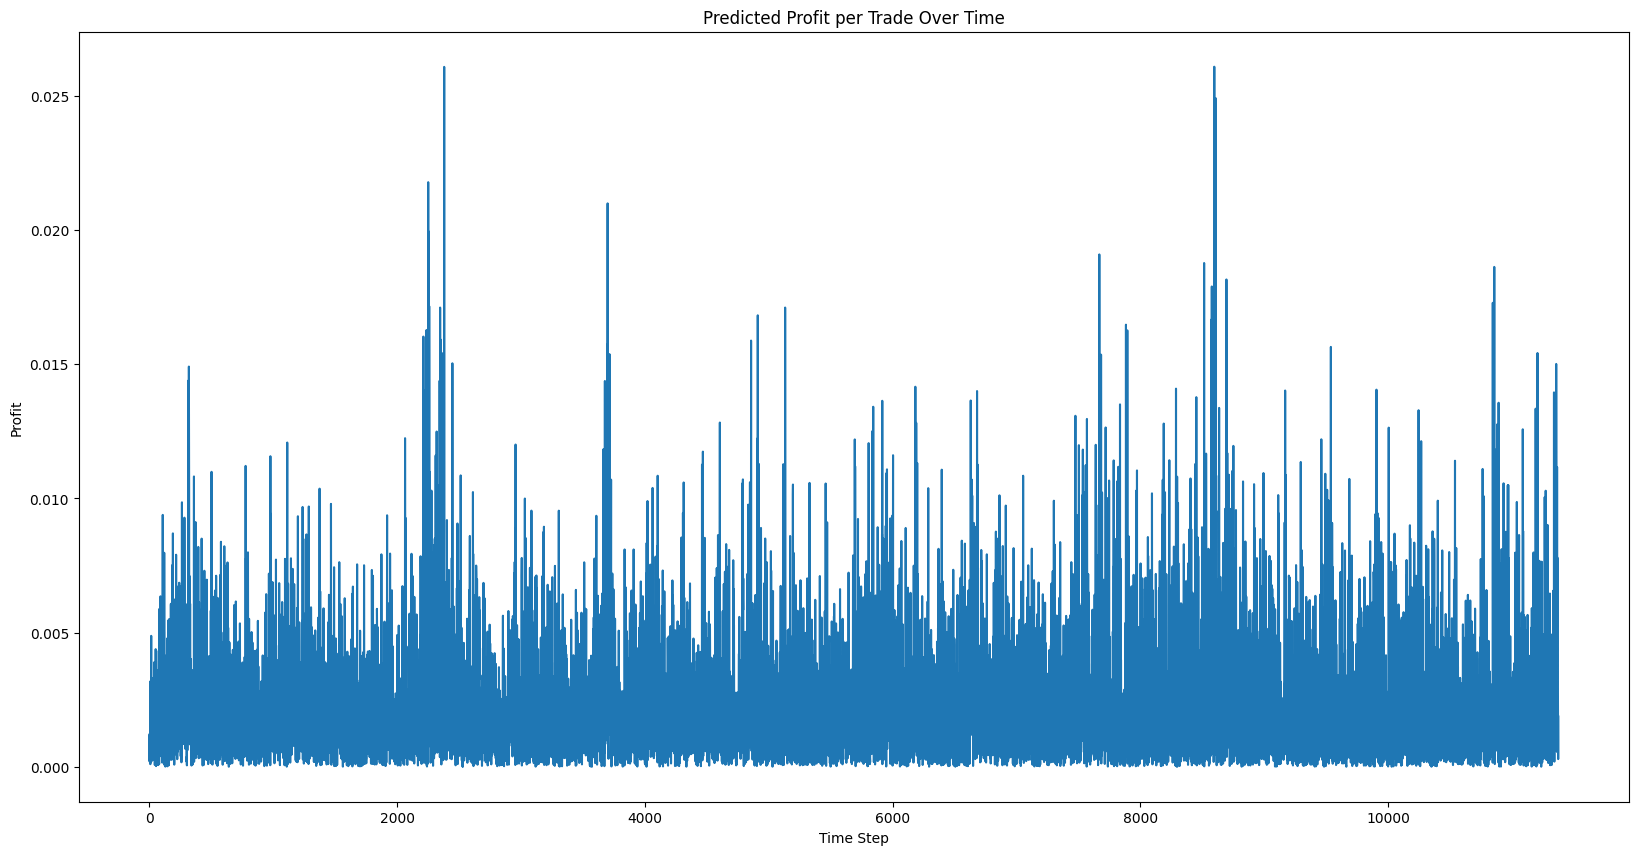

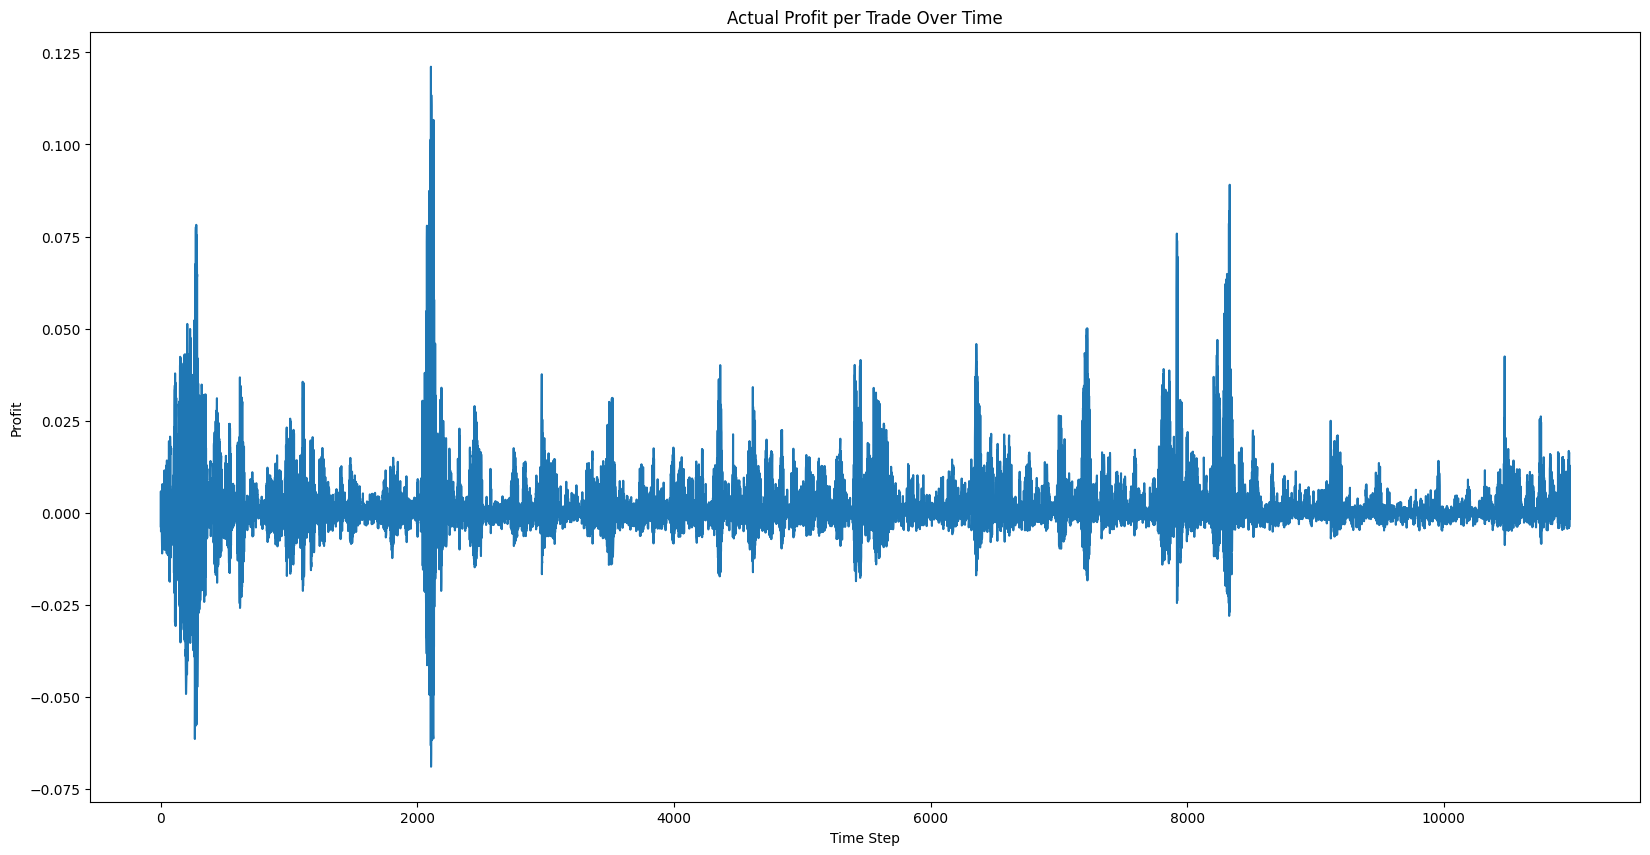

BTC_balance: 0.0032021125234679843
USDT_balance: 28.469958626177526
total account value: 126.82143585498635


In [113]:
# for 2M model, only the last 5K, with stop loss, expoential growth, 5% position ratio, for June21toJul2 data
%reset -f
import pandas as pd
import numpy as np
import pandas as pd
from Get_balance import get_free_btc, get_free_usd, get_free_usdt
from joblib import dump, load
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import matplotlib.pyplot as plt

# define the stop loss ratio (e.g., 5%)
stop_loss = 0.005 # in US dollars

# define the wait time in terms of number of steps
wait_time_steps = 15 # in minutes

n_steps = 30

delta_t_trading = 60

historic_data_input_filename = "Data_from_June21toNow.csv"
historic_df = pd.read_csv(historic_data_input_filename)
historic_df=historic_df[['Open Time','Close', 'Volume']]
historic_df['Open Time'] = pd.to_datetime(historic_df['Open Time'])
historic_df['Open Time'] = historic_df['Open Time'].values.astype(np.int64) // 10 ** 9
historic_df = historic_df.sort_values('Open Time')

model_parameters_file = '../Prediction_Model/GradientBoosting/GB_model_data_2M_main_parameters_10000_1000_2_1_10_10.pkl'

paper_trading=True
symbol = 'BTC/USDT'
Exchange_Comission=0
position_ratio=0.05
quantity=0
type="MARKET"
trade_approved = False
num_approved_trades=0
trade_comission=0
global initial_run
initial_run = True

def fetch_historic_data(start, end):
    return historic_df[start : end].copy()

model = GradientBoostingRegressor(n_estimators=10000,  
                                  max_depth=1000,      
                                  min_samples_split=2,
                                  learning_rate=1, 
                                  min_samples_leaf=10,
                                  n_iter_no_change=10, 
                                  loss='squared_error')

model = joblib.load(model_parameters_file)

def trade_evaluation():

    global num_approved_trades
    global BTC_balance
    global USDT_balance
    global initial_run

    side=None

    if paper_trading==True and initial_run==True:
        U=1
        BTC_balance=0.00193116*U
        USDT_balance=47.79670558*U
        initial_run=False
    
    elif paper_trading==False:
        BTC_balance=get_free_btc()
        USDT_balance=get_free_usdt()
  
    # position ratio: 0.02
    # BTC_balance=0.00193116

    quantity_long=position_ratio*BTC_balance
    quantity_short=position_ratio*USDT_balance/current_price

    trade_comission_long=0
    trade_comission_short=0

    potential_profit_long=(predicted_price-current_price)*quantity_long
    potential_profit_short=-(predicted_price-current_price)*quantity_short

    if potential_profit_long > (trade_comission_long):
        side="BUY"
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_long
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    elif potential_profit_short> (trade_comission_short):
        side='SELL'
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_short
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    else:
        side='None'
        trade_approved=False


    if side=='BUY':
        quantity=quantity_long
        trade_comission=trade_comission_long
    elif side=='SELL':
        quantity=quantity_short
        trade_comission=trade_comission_short
    else:
        quantity=0
        trade_comission=0

    return trade_approved, side, quantity

prediction = []

start_point = 0
end_point = start_point + n_steps + 1
# start_point = 0
# end_point = start_point + n_steps + 1
iteration_step = 1

profit_per_trade_predicted_list = [] # profit_predicted_list is the storage of the profit of each trade over time
profit_per_trade_predicted = 0 # profit_predicted is the profit of the current trade
profit_per_trade_actual_list = [] # profit_per_trade_list is the profit of each trade
profit_per_trade_actual = 0 # profit_per_trade is the profit of the current trade
paper_account_profit_list = [] # paper_account_profit_list is the accumulated profit of the paper account
paper_account_profit=0 # paper_account_profit is the profit of the paper account at the current time step

while end_point < len(historic_df) and (end_point + 2 * delta_t_trading < len(historic_df)):

    df = fetch_historic_data(start_point, end_point) 
    df=df[['Open Time','Close', 'Volume']]

    predicting_index = df.columns.get_loc('Close')

    current_price = float(df.iloc[-1]['Close'])

    scaled_data = df.values

    X = []
    for i in range(n_steps, len(scaled_data)):
        X.append(scaled_data[i - n_steps:i])
    X = np.array(X)

    n_features = X.shape[2]
    X = X.reshape((X.shape[0], X.shape[1], n_features))

    # flatten input
    n_input = X.shape[1] * X.shape[2]
    X_flat = X.reshape((X.shape[0], n_input))

    predicted_price = model.predict(X_flat)

    trade_approved, side, quantity = trade_evaluation()

    if trade_approved:
        
        if paper_trading==True:

            if side=='SELL':

                sold_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_bought_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))
                USDT_balance += profit_per_trade_actual
                if (sold_price - SecTrade_bought_price)*quantity > stop_loss:
                    start_point += wait_time_steps
                    end_point += wait_time_steps
                    continue

            elif side=='BUY':

                purchased_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_sold_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                BTC_balance += profit_per_trade_actual/SecTrade_sold_price

                if (purchased_price - SecTrade_sold_price)*quantity > stop_loss:
                    start_point += wait_time_steps
                    end_point += wait_time_steps
                    continue  # skip the rest of the loop and start a new iteration

                
    paper_account_profit_list.append(paper_account_profit)
    profit_per_trade_actual_list.append(profit_per_trade_actual)

    start_point += iteration_step
    end_point += iteration_step
    print("\rstart_point: {}".format(start_point), end="")

profit_account_actual_df = pd.DataFrame(paper_account_profit_list, columns=['Paper Account Profit'])
profit_per_trade_predicted_df = pd.DataFrame(profit_per_trade_predicted_list, columns=['Profit per Trade Predicted'])
profit_per_trade_actual_df = pd.DataFrame(profit_per_trade_actual_list, columns=['Profit per Trade Actual'])
profit_account_actual_df.to_csv('profit_account_actual_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_predicted_df.to_csv('profit_per_trade_predicted_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_actual_df.to_csv('profit_per_trade_actual_5Kdata_500Kmodel.csv', index=False)

plt.plot(paper_account_profit_list)
plt.title('Paper Account Profit Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_predicted_list)
plt.title('Predicted Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_actual_list)
plt.title('Actual Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

print("BTC_balance: {}".format(BTC_balance))
print("USDT_balance: {}".format(USDT_balance))
print("total account value: {}".format(BTC_balance*current_price+USDT_balance))

start_point: 16839

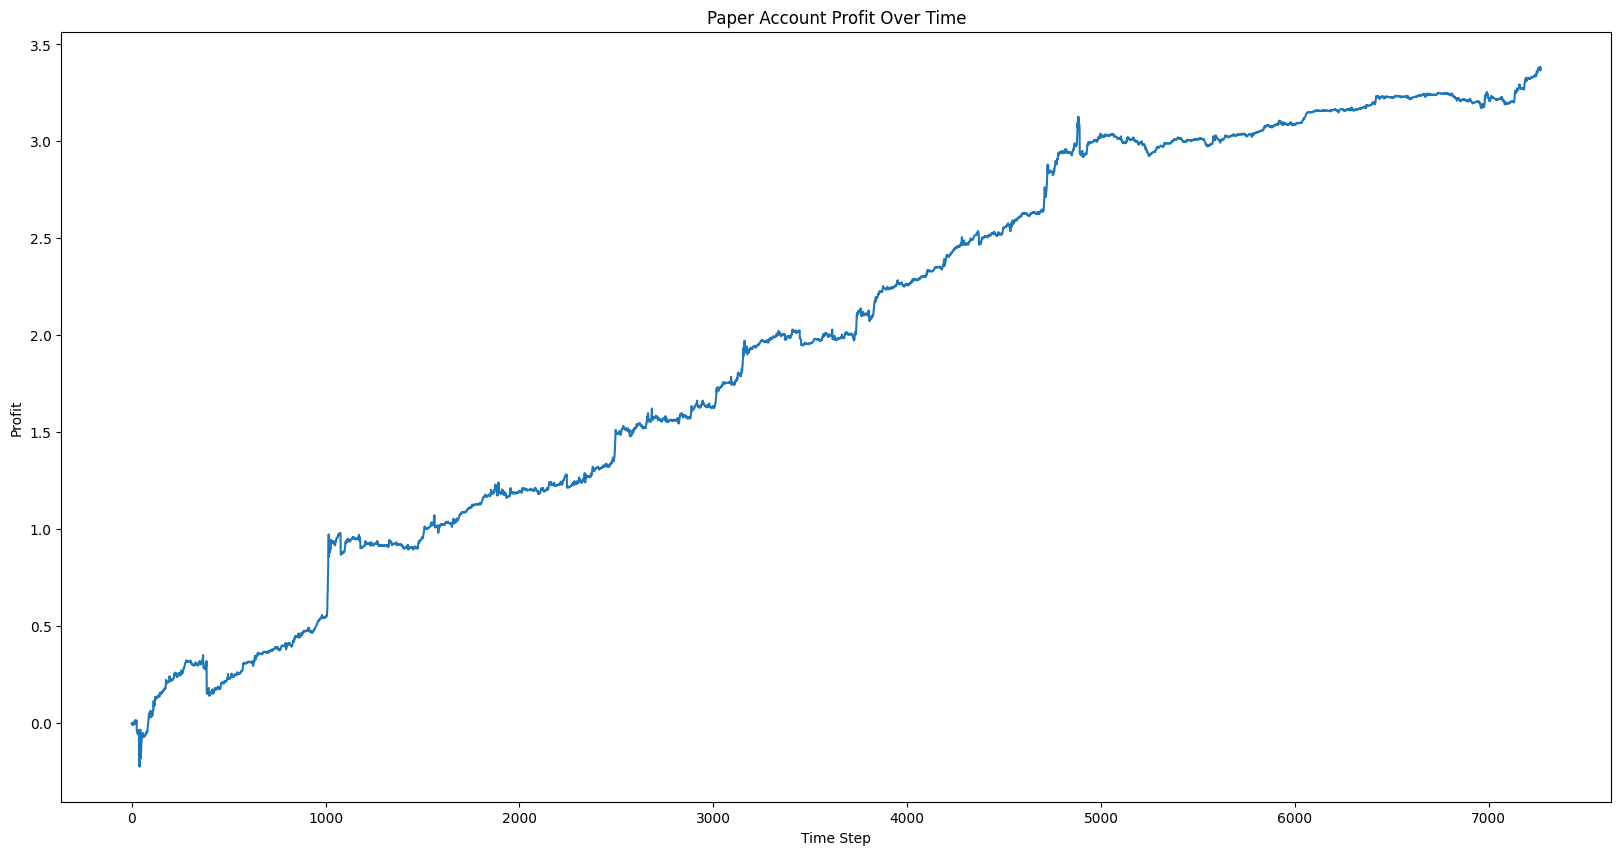

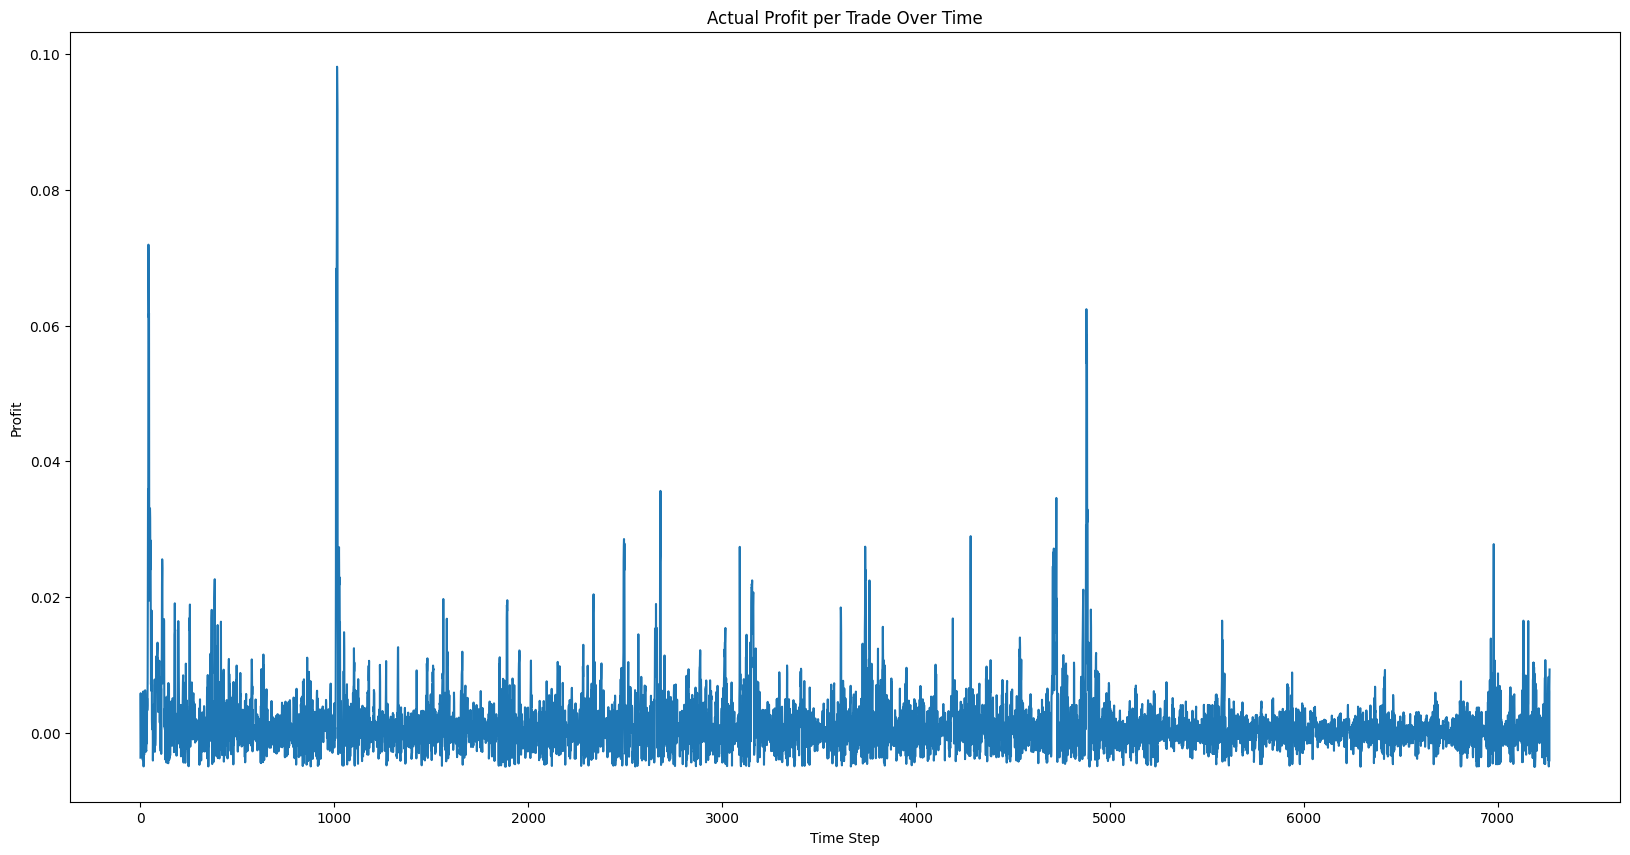

BTC_balance: 0.0020723310621129317
USDT_balance: 46.84429262122484
total account value: 110.4130272282284


In [114]:
# stop loss corrected
# for 2M model, only the last 5K, with stop loss, expoential growth, 5% position ratio, for June21toJul2 data
%reset -f
import pandas as pd
import numpy as np
import pandas as pd
from Get_balance import get_free_btc, get_free_usd, get_free_usdt
from joblib import dump, load
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import matplotlib.pyplot as plt

# define the stop loss ratio (e.g., 5%)
stop_loss = 0.005 # in US dollars

# define the wait time in terms of number of steps
wait_time_steps = 15 # in minutes

n_steps = 30

delta_t_trading = 60

historic_data_input_filename = "Data_from_June21toNow.csv"
historic_df = pd.read_csv(historic_data_input_filename)
historic_df=historic_df[['Open Time','Close', 'Volume']]
historic_df['Open Time'] = pd.to_datetime(historic_df['Open Time'])
historic_df['Open Time'] = historic_df['Open Time'].values.astype(np.int64) // 10 ** 9
historic_df = historic_df.sort_values('Open Time')

model_parameters_file = '../Prediction_Model/GradientBoosting/GB_model_data_2M_main_parameters_10000_1000_2_1_10_10.pkl'

paper_trading=True
symbol = 'BTC/USDT'
Exchange_Comission=0
position_ratio=0.05
quantity=0
type="MARKET"
trade_approved = False
num_approved_trades=0
trade_comission=0
global initial_run
initial_run = True

def fetch_historic_data(start, end):
    return historic_df[start : end].copy()

model = GradientBoostingRegressor(n_estimators=10000,  
                                  max_depth=1000,      
                                  min_samples_split=2,
                                  learning_rate=1, 
                                  min_samples_leaf=10,
                                  n_iter_no_change=10, 
                                  loss='squared_error')

model = joblib.load(model_parameters_file)

def trade_evaluation():

    global num_approved_trades
    global BTC_balance
    global USDT_balance
    global initial_run

    side=None

    if paper_trading==True and initial_run==True:
        U=1
        BTC_balance=0.00193116*U
        USDT_balance=47.79670558*U
        initial_run=False
    
    elif paper_trading==False:
        BTC_balance=get_free_btc()
        USDT_balance=get_free_usdt()
  
    # position ratio: 0.02
    # BTC_balance=0.00193116

    quantity_long=position_ratio*BTC_balance
    quantity_short=position_ratio*USDT_balance/current_price

    trade_comission_long=0
    trade_comission_short=0

    potential_profit_long=(predicted_price-current_price)*quantity_long
    potential_profit_short=-(predicted_price-current_price)*quantity_short

    if potential_profit_long > (trade_comission_long):
        side="BUY"
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_long
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    elif potential_profit_short> (trade_comission_short):
        side='SELL'
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_short
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    else:
        side='None'
        trade_approved=False


    if side=='BUY':
        quantity=quantity_long
        trade_comission=trade_comission_long
    elif side=='SELL':
        quantity=quantity_short
        trade_comission=trade_comission_short
    else:
        quantity=0
        trade_comission=0

    return trade_approved, side, quantity

prediction = []

start_point = 0
end_point = start_point + n_steps + 1
# start_point = 0
# end_point = start_point + n_steps + 1
iteration_step = 1

profit_per_trade_predicted_list = [] # profit_predicted_list is the storage of the profit of each trade over time
profit_per_trade_predicted = 0 # profit_predicted is the profit of the current trade
profit_per_trade_actual_list = [] # profit_per_trade_list is the profit of each trade
profit_per_trade_actual = 0 # profit_per_trade is the profit of the current trade
paper_account_profit_list = [] # paper_account_profit_list is the accumulated profit of the paper account
paper_account_profit=0 # paper_account_profit is the profit of the paper account at the current time step

while end_point < len(historic_df) and (end_point + 2 * delta_t_trading < len(historic_df)):

    df = fetch_historic_data(start_point, end_point) 
    df=df[['Open Time','Close', 'Volume']]

    predicting_index = df.columns.get_loc('Close')

    current_price = float(df.iloc[-1]['Close'])

    scaled_data = df.values

    X = []
    for i in range(n_steps, len(scaled_data)):
        X.append(scaled_data[i - n_steps:i])
    X = np.array(X)

    n_features = X.shape[2]
    X = X.reshape((X.shape[0], X.shape[1], n_features))

    # flatten input
    n_input = X.shape[1] * X.shape[2]
    X_flat = X.reshape((X.shape[0], n_input))

    predicted_price = model.predict(X_flat)

    trade_approved, side, quantity = trade_evaluation()

    if trade_approved:
        
        if paper_trading==True:

            if side=='SELL':

                sold_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_bought_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))
                USDT_balance += profit_per_trade_actual
                if profit_per_trade_actual < -stop_loss:
                    start_point += wait_time_steps
                    end_point += wait_time_steps
                    continue

            elif side=='BUY':

                purchased_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_sold_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                BTC_balance += profit_per_trade_actual/SecTrade_sold_price

                if profit_per_trade_actual < -stop_loss:
                    start_point += wait_time_steps
                    end_point += wait_time_steps
                    continue  # skip the rest of the loop and start a new iteration

                
    paper_account_profit_list.append(paper_account_profit)
    profit_per_trade_actual_list.append(profit_per_trade_actual)

    start_point += iteration_step
    end_point += iteration_step
    print("\rstart_point: {}".format(start_point), end="")

profit_account_actual_df = pd.DataFrame(paper_account_profit_list, columns=['Paper Account Profit'])
profit_per_trade_predicted_df = pd.DataFrame(profit_per_trade_predicted_list, columns=['Profit per Trade Predicted'])
profit_per_trade_actual_df = pd.DataFrame(profit_per_trade_actual_list, columns=['Profit per Trade Actual'])
profit_account_actual_df.to_csv('profit_account_actual_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_predicted_df.to_csv('profit_per_trade_predicted_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_actual_df.to_csv('profit_per_trade_actual_5Kdata_500Kmodel.csv', index=False)

plt.plot(paper_account_profit_list)
plt.title('Paper Account Profit Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_predicted_list)
plt.title('Predicted Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_actual_list)
plt.title('Actual Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

print("BTC_balance: {}".format(BTC_balance))
print("USDT_balance: {}".format(USDT_balance))
print("total account value: {}".format(BTC_balance*current_price+USDT_balance))

start_point: 1937644

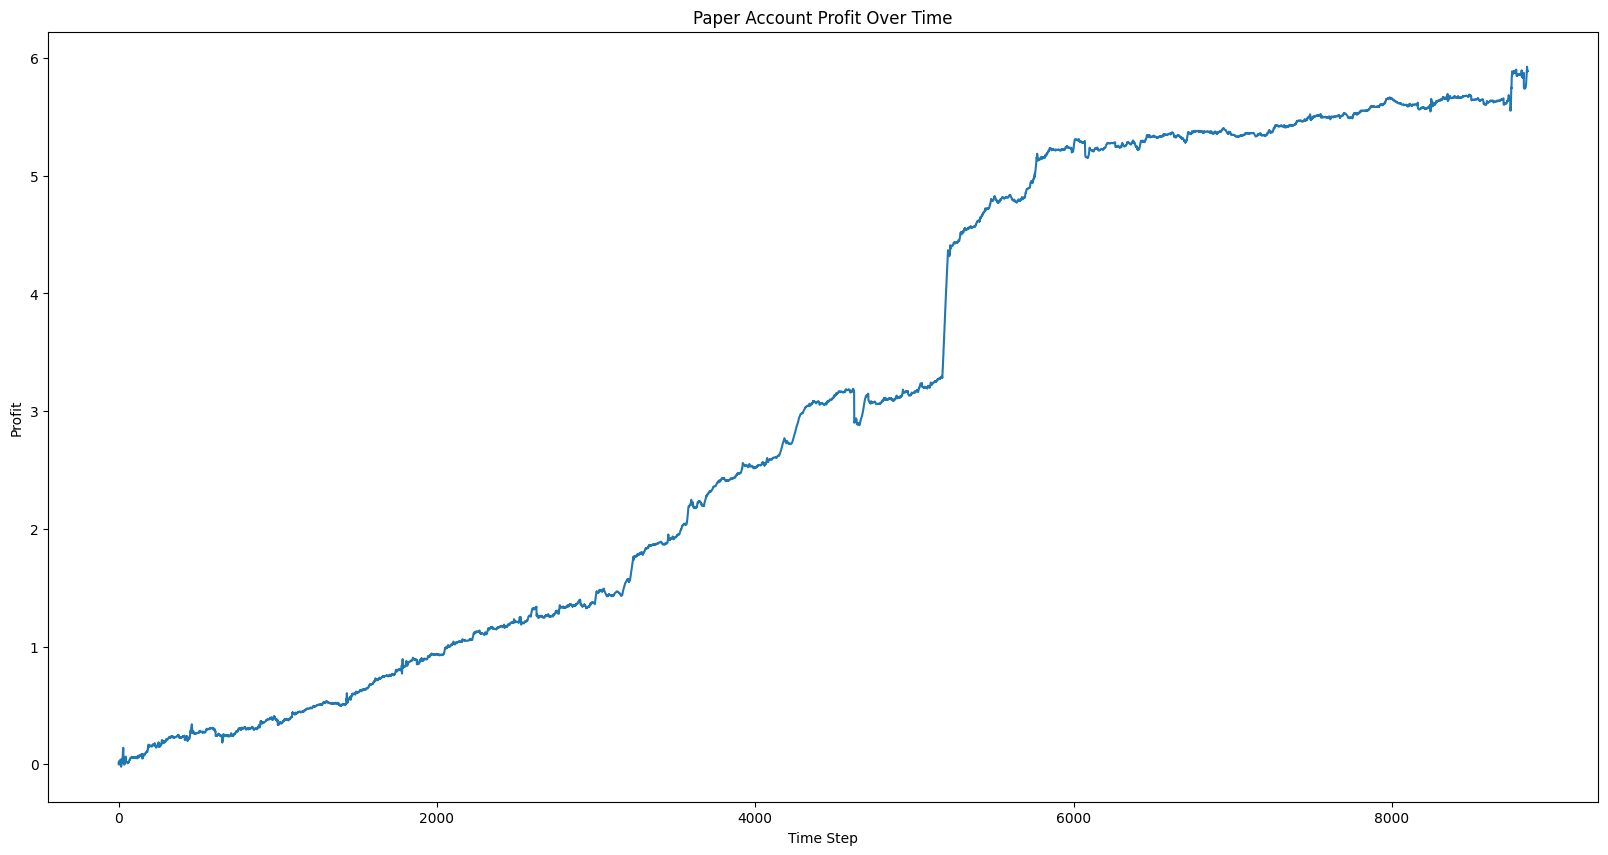

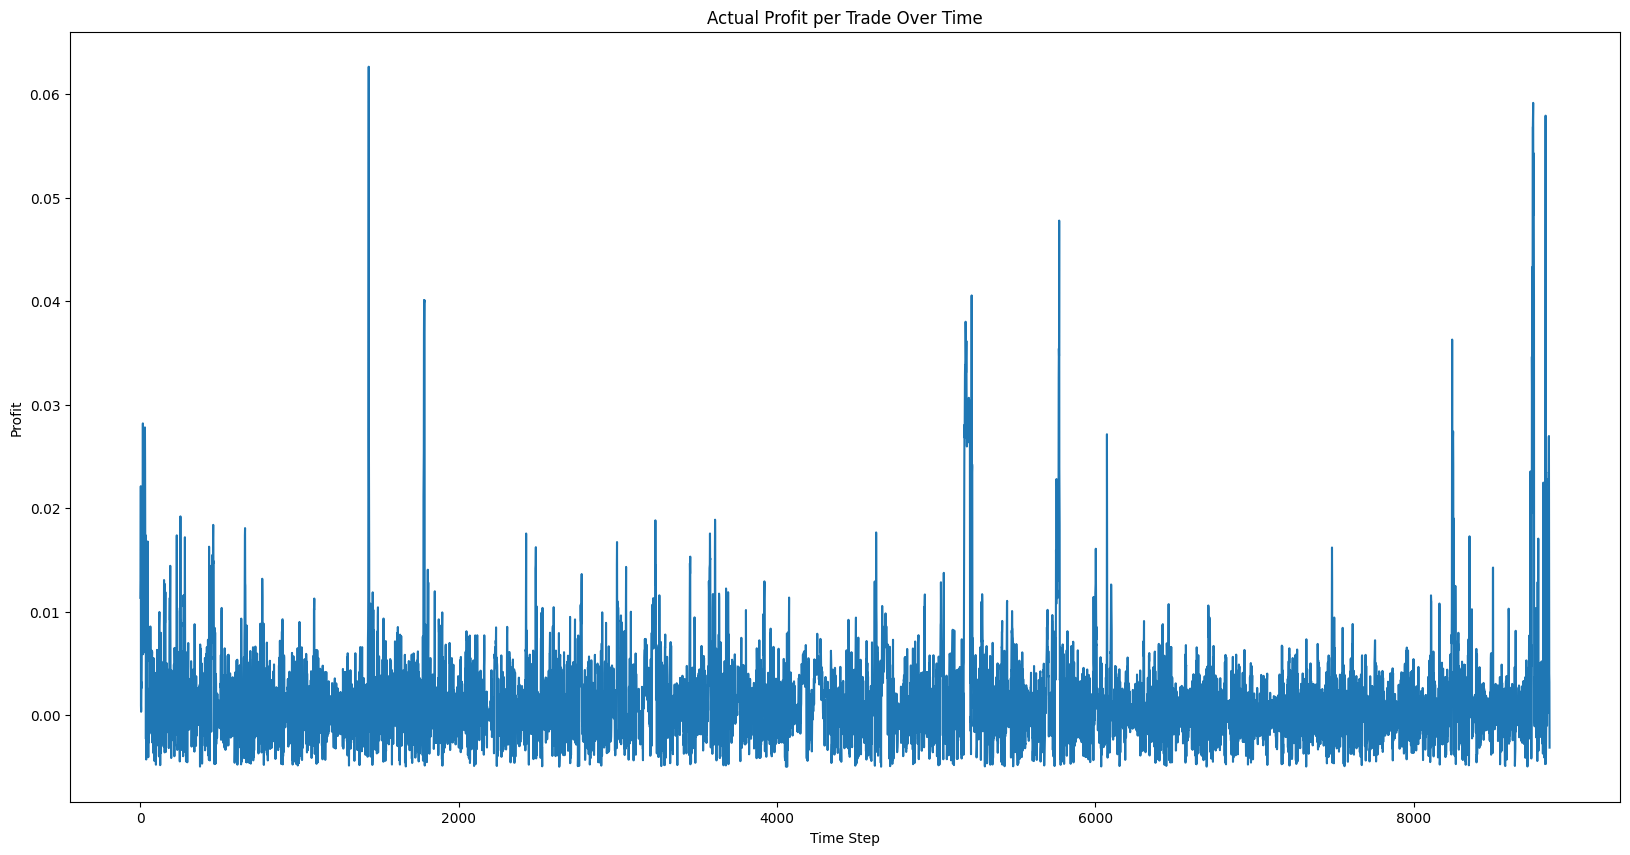

BTC_balance: 0.002121668651333983
USDT_balance: 48.67461254219353
total account value: 109.71529545799689


In [115]:
# stop loss corrected
# for 2M model, only the last 5K, with stop loss, expoential growth, 5% position ratio
%reset -f
import pandas as pd
import numpy as np
import pandas as pd
from Get_balance import get_free_btc, get_free_usd, get_free_usdt
from joblib import dump, load
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import matplotlib.pyplot as plt

# define the stop loss ratio (e.g., 5%)
stop_loss = 0.005 # in US dollars

# define the wait time in terms of number of steps
wait_time_steps = 15 # in minutes

n_steps = 30

delta_t_trading = 60

historic_data_input_filename = "../Prediction_Model/LSTM/BTCUSDT4Y1MKline_cleaned_24features_nSteps"+str(n_steps)+".csv"
historic_df = pd.read_csv(historic_data_input_filename)
historic_df=historic_df[['Open Time','Close', 'Volume']]

model_parameters_file = '../Prediction_Model/GradientBoosting/GB_model_data_2M_main_parameters_10000_1000_2_1_10_10.pkl'

paper_trading=True
symbol = 'BTC/USDT'
Exchange_Comission=0
position_ratio=0.05
quantity=0
type="MARKET"
trade_approved = False
num_approved_trades=0
trade_comission=0
global initial_run
initial_run = True

def fetch_historic_data(start, end):
    return historic_df[start : end].copy()

model = GradientBoostingRegressor(n_estimators=10000,  
                                  max_depth=1000,      
                                  min_samples_split=2,
                                  learning_rate=1, 
                                  min_samples_leaf=10,
                                  n_iter_no_change=10, 
                                  loss='squared_error')

model = joblib.load(model_parameters_file)

def trade_evaluation():

    global num_approved_trades
    global BTC_balance
    global USDT_balance
    global initial_run

    side=None

    if paper_trading==True and initial_run==True:
        U=1
        BTC_balance=0.00193116*U
        USDT_balance=47.79670558*U
        initial_run=False
    
    elif paper_trading==False:
        BTC_balance=get_free_btc()
        USDT_balance=get_free_usdt()
  
    # position ratio: 0.02
    # BTC_balance=0.00193116

    quantity_long=position_ratio*BTC_balance
    quantity_short=position_ratio*USDT_balance/current_price

    trade_comission_long=0
    trade_comission_short=0

    potential_profit_long=(predicted_price-current_price)*quantity_long
    potential_profit_short=-(predicted_price-current_price)*quantity_short

    if potential_profit_long > (trade_comission_long):
        side="BUY"
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_long
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    elif potential_profit_short> (trade_comission_short):
        side='SELL'
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_short
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    else:
        side='None'
        trade_approved=False


    if side=='BUY':
        quantity=quantity_long
        trade_comission=trade_comission_long
    elif side=='SELL':
        quantity=quantity_short
        trade_comission=trade_comission_short
    else:
        quantity=0
        trade_comission=0

    return trade_approved, side, quantity

prediction = []

start_point = len(historic_df) - 20000
end_point = start_point + n_steps + 1
# start_point = 0
# end_point = start_point + n_steps + 1
iteration_step = 1

profit_per_trade_predicted_list = [] # profit_predicted_list is the storage of the profit of each trade over time
profit_per_trade_predicted = 0 # profit_predicted is the profit of the current trade
profit_per_trade_actual_list = [] # profit_per_trade_list is the profit of each trade
profit_per_trade_actual = 0 # profit_per_trade is the profit of the current trade
paper_account_profit_list = [] # paper_account_profit_list is the accumulated profit of the paper account
paper_account_profit=0 # paper_account_profit is the profit of the paper account at the current time step

while end_point < len(historic_df) and (end_point + 2 * delta_t_trading < len(historic_df)):

    df = fetch_historic_data(start_point, end_point) 
    df=df[['Open Time','Close', 'Volume']]

    predicting_index = df.columns.get_loc('Close')

    current_price = float(df.iloc[-1]['Close'])

    scaled_data = df.values

    X = []
    for i in range(n_steps, len(scaled_data)):
        X.append(scaled_data[i - n_steps:i])
    X = np.array(X)

    n_features = X.shape[2]
    X = X.reshape((X.shape[0], X.shape[1], n_features))

    # flatten input
    n_input = X.shape[1] * X.shape[2]
    X_flat = X.reshape((X.shape[0], n_input))

    predicted_price = model.predict(X_flat)

    trade_approved, side, quantity = trade_evaluation()

    if trade_approved:
        
        if paper_trading==True:

            if side=='SELL':

                sold_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_bought_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))
                USDT_balance += profit_per_trade_actual
                if profit_per_trade_actual < -stop_loss:
                    start_point += wait_time_steps
                    end_point += wait_time_steps
                    continue

            elif side=='BUY':

                purchased_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_sold_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                BTC_balance += profit_per_trade_actual/SecTrade_sold_price

                if profit_per_trade_actual < -stop_loss:
                    start_point += wait_time_steps
                    end_point += wait_time_steps
                    continue  # skip the rest of the loop and start a new iteration

                
    paper_account_profit_list.append(paper_account_profit)
    profit_per_trade_actual_list.append(profit_per_trade_actual)

    start_point += iteration_step
    end_point += iteration_step
    print("\rstart_point: {}".format(start_point), end="")

profit_account_actual_df = pd.DataFrame(paper_account_profit_list, columns=['Paper Account Profit'])
profit_per_trade_predicted_df = pd.DataFrame(profit_per_trade_predicted_list, columns=['Profit per Trade Predicted'])
profit_per_trade_actual_df = pd.DataFrame(profit_per_trade_actual_list, columns=['Profit per Trade Actual'])
profit_account_actual_df.to_csv('profit_account_actual_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_predicted_df.to_csv('profit_per_trade_predicted_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_actual_df.to_csv('profit_per_trade_actual_5Kdata_500Kmodel.csv', index=False)

plt.plot(paper_account_profit_list)
plt.title('Paper Account Profit Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_predicted_list)
plt.title('Predicted Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_actual_list)
plt.title('Actual Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

print("BTC_balance: {}".format(BTC_balance))
print("USDT_balance: {}".format(USDT_balance))
print("total account value: {}".format(BTC_balance*current_price+USDT_balance))

start_point: 1937637

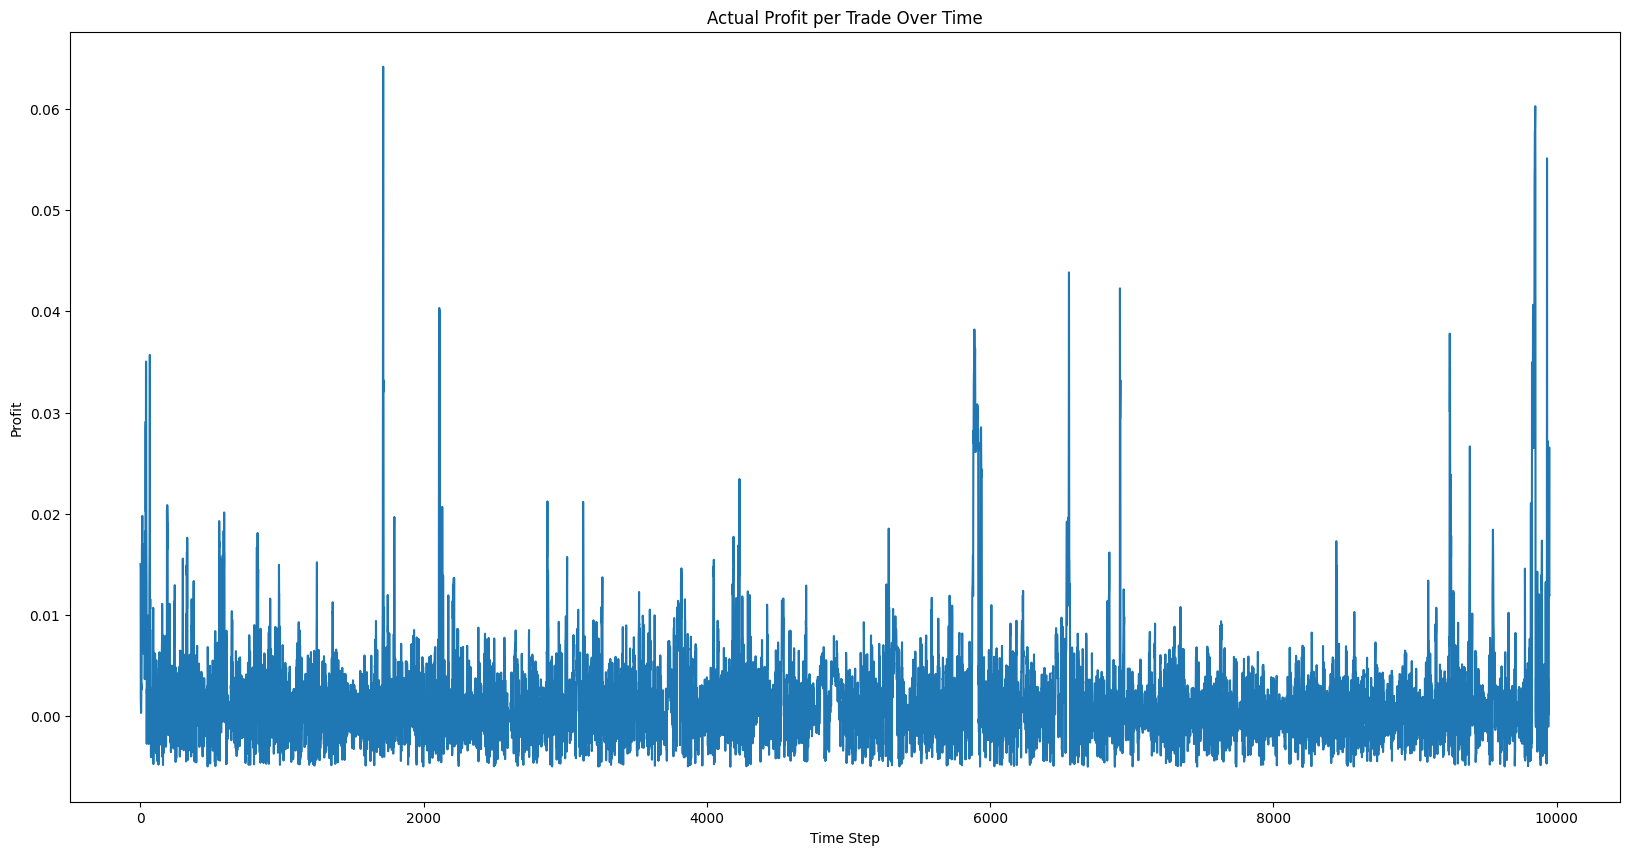

BTC_balance: 0.0021574807074413857
USDT_balance: 47.93322875685925
total account value: 110.23574843715542


In [129]:
# stop loss corrected, wait time 5 is optimal
# stop_loss = 0.005
# for 2M model, only the last 5K, with stop loss, expoential growth, 5% position ratio
%reset -f
import pandas as pd
import numpy as np
import pandas as pd
from Get_balance import get_free_btc, get_free_usd, get_free_usdt
from joblib import dump, load
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import matplotlib.pyplot as plt

# define the stop loss ratio (e.g., 5%)
stop_loss = 0.005 # in US dollars

# define the wait time in terms of number of steps
wait_time_steps = 10 # in minutes

n_steps = 30

delta_t_trading = 60

historic_data_input_filename = "../Prediction_Model/LSTM/BTCUSDT4Y1MKline_cleaned_24features_nSteps"+str(n_steps)+".csv"
historic_df = pd.read_csv(historic_data_input_filename)
historic_df=historic_df[['Open Time','Close', 'Volume']]

model_parameters_file = '../Prediction_Model/GradientBoosting/GB_model_data_2M_main_parameters_10000_1000_2_1_10_10.pkl'

paper_trading=True
symbol = 'BTC/USDT'
Exchange_Comission=0
position_ratio=0.05
quantity=0
type="MARKET"
trade_approved = False
num_approved_trades=0
trade_comission=0
global initial_run
initial_run = True

def fetch_historic_data(start, end):
    return historic_df[start : end].copy()

model = GradientBoostingRegressor(n_estimators=10000,  
                                  max_depth=1000,      
                                  min_samples_split=2,
                                  learning_rate=1, 
                                  min_samples_leaf=10,
                                  n_iter_no_change=10, 
                                  loss='squared_error')

model = joblib.load(model_parameters_file)

def trade_evaluation():

    global num_approved_trades
    global BTC_balance
    global USDT_balance
    global initial_run

    side=None

    if paper_trading==True and initial_run==True:
        U=1
        BTC_balance=0.00193116*U
        USDT_balance=47.79670558*U
        initial_run=False
    
    elif paper_trading==False:
        BTC_balance=get_free_btc()
        USDT_balance=get_free_usdt()
  
    # position ratio: 0.02
    # BTC_balance=0.00193116

    quantity_long=position_ratio*BTC_balance
    quantity_short=position_ratio*USDT_balance/current_price

    trade_comission_long=0
    trade_comission_short=0

    potential_profit_long=(predicted_price-current_price)*quantity_long
    potential_profit_short=-(predicted_price-current_price)*quantity_short

    if potential_profit_long > (trade_comission_long):
        side="BUY"
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_long
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    elif potential_profit_short> (trade_comission_short):
        side='SELL'
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_short
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    else:
        side='None'
        trade_approved=False


    if side=='BUY':
        quantity=quantity_long
        trade_comission=trade_comission_long
    elif side=='SELL':
        quantity=quantity_short
        trade_comission=trade_comission_short
    else:
        quantity=0
        trade_comission=0

    return trade_approved, side, quantity

prediction = []

start_point = len(historic_df) - 20000
end_point = start_point + n_steps + 1
# start_point = 0
# end_point = start_point + n_steps + 1
iteration_step = 1

profit_per_trade_predicted_list = [] # profit_predicted_list is the storage of the profit of each trade over time
profit_per_trade_predicted = 0 # profit_predicted is the profit of the current trade
profit_per_trade_actual_list = [] # profit_per_trade_list is the profit of each trade
profit_per_trade_actual = 0 # profit_per_trade is the profit of the current trade
paper_account_profit_list = [] # paper_account_profit_list is the accumulated profit of the paper account
paper_account_profit=0 # paper_account_profit is the profit of the paper account at the current time step

while end_point < len(historic_df) and (end_point + 2 * delta_t_trading < len(historic_df)):

    df = fetch_historic_data(start_point, end_point) 
    df=df[['Open Time','Close', 'Volume']]

    predicting_index = df.columns.get_loc('Close')

    current_price = float(df.iloc[-1]['Close'])

    scaled_data = df.values

    X = []
    for i in range(n_steps, len(scaled_data)):
        X.append(scaled_data[i - n_steps:i])
    X = np.array(X)

    n_features = X.shape[2]
    X = X.reshape((X.shape[0], X.shape[1], n_features))

    # flatten input
    n_input = X.shape[1] * X.shape[2]
    X_flat = X.reshape((X.shape[0], n_input))

    predicted_price = model.predict(X_flat)

    trade_approved, side, quantity = trade_evaluation()

    if trade_approved:
        
        if paper_trading==True:

            if side=='SELL':

                sold_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_bought_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))
                USDT_balance += profit_per_trade_actual
                if profit_per_trade_actual < -stop_loss:
                    start_point += wait_time_steps
                    end_point += wait_time_steps
                    continue

            elif side=='BUY':

                purchased_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_sold_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                BTC_balance += profit_per_trade_actual/SecTrade_sold_price

                if profit_per_trade_actual < -stop_loss:
                    start_point += wait_time_steps
                    end_point += wait_time_steps
                    continue  # skip the rest of the loop and start a new iteration

                
    paper_account_profit_list.append(paper_account_profit)
    profit_per_trade_actual_list.append(profit_per_trade_actual)

    start_point += iteration_step
    end_point += iteration_step
    print("\rstart_point: {}".format(start_point), end="")

profit_account_actual_df = pd.DataFrame(paper_account_profit_list, columns=['Paper Account Profit'])
profit_per_trade_predicted_df = pd.DataFrame(profit_per_trade_predicted_list, columns=['Profit per Trade Predicted'])
profit_per_trade_actual_df = pd.DataFrame(profit_per_trade_actual_list, columns=['Profit per Trade Actual'])
profit_account_actual_df.to_csv('profit_account_actual_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_predicted_df.to_csv('profit_per_trade_predicted_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_actual_df.to_csv('profit_per_trade_actual_5Kdata_500Kmodel.csv', index=False)

plt.plot(paper_account_profit_list)
plt.title('Paper Account Profit Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_predicted_list)
plt.title('Predicted Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_actual_list)
plt.title('Actual Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

print("BTC_balance: {}".format(BTC_balance))
print("USDT_balance: {}".format(USDT_balance))
print("total account value: {}".format(BTC_balance*current_price+USDT_balance))

start_point: 16844

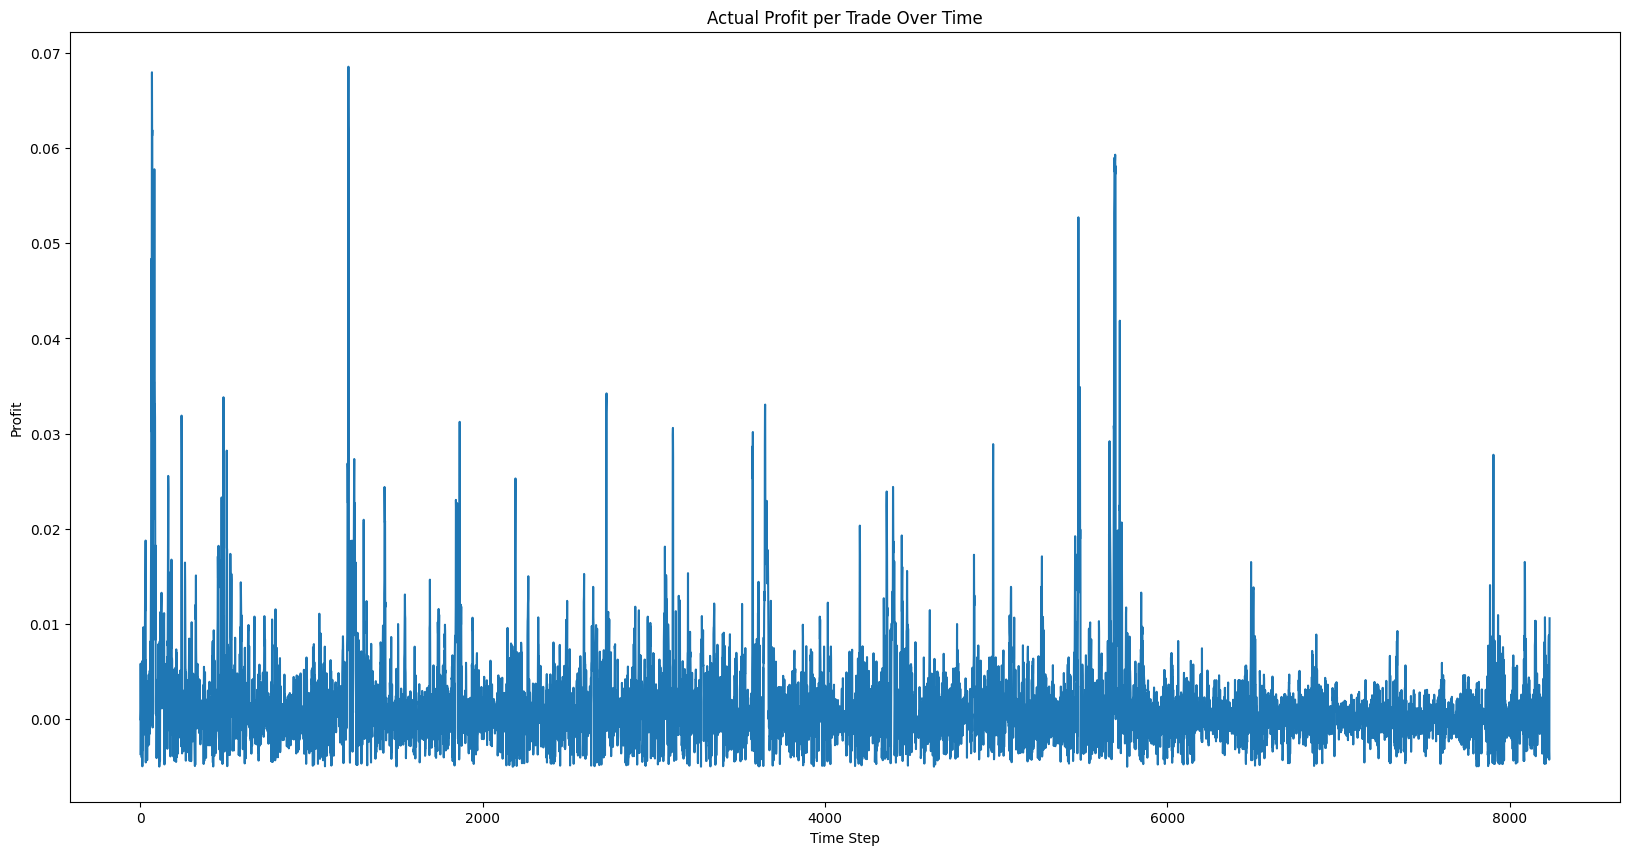

BTC_balance: 0.002072692911015513
USDT_balance: 47.49185878463515
total account value: 111.08763211159261


In [128]:
# stop loss corrected, wait time of 5min
# for 2M model, only the last 5K, with stop loss, expoential growth, 5% position ratio, for June21toJul2 data
%reset -f
import pandas as pd
import numpy as np
import pandas as pd
from Get_balance import get_free_btc, get_free_usd, get_free_usdt
from joblib import dump, load
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import matplotlib.pyplot as plt

# define the stop loss ratio (e.g., 5%)
stop_loss = 0.005 # in US dollars

# define the wait time in terms of number of steps
wait_time_steps = 10 # in minutes

n_steps = 30

delta_t_trading = 60

historic_data_input_filename = "Data_from_June21toNow.csv"
historic_df = pd.read_csv(historic_data_input_filename)
historic_df=historic_df[['Open Time','Close', 'Volume']]
historic_df['Open Time'] = pd.to_datetime(historic_df['Open Time'])
historic_df['Open Time'] = historic_df['Open Time'].values.astype(np.int64) // 10 ** 9
historic_df = historic_df.sort_values('Open Time')

model_parameters_file = '../Prediction_Model/GradientBoosting/GB_model_data_2M_main_parameters_10000_1000_2_1_10_10.pkl'

paper_trading=True
symbol = 'BTC/USDT'
Exchange_Comission=0
position_ratio=0.05
quantity=0
type="MARKET"
trade_approved = False
num_approved_trades=0
trade_comission=0
global initial_run
initial_run = True

def fetch_historic_data(start, end):
    return historic_df[start : end].copy()

model = GradientBoostingRegressor(n_estimators=10000,  
                                  max_depth=1000,      
                                  min_samples_split=2,
                                  learning_rate=1, 
                                  min_samples_leaf=10,
                                  n_iter_no_change=10, 
                                  loss='squared_error')

model = joblib.load(model_parameters_file)

def trade_evaluation():

    global num_approved_trades
    global BTC_balance
    global USDT_balance
    global initial_run

    side=None

    if paper_trading==True and initial_run==True:
        U=1
        BTC_balance=0.00193116*U
        USDT_balance=47.79670558*U
        initial_run=False
    
    elif paper_trading==False:
        BTC_balance=get_free_btc()
        USDT_balance=get_free_usdt()
  
    # position ratio: 0.02
    # BTC_balance=0.00193116

    quantity_long=position_ratio*BTC_balance
    quantity_short=position_ratio*USDT_balance/current_price

    trade_comission_long=0
    trade_comission_short=0

    potential_profit_long=(predicted_price-current_price)*quantity_long
    potential_profit_short=-(predicted_price-current_price)*quantity_short

    if potential_profit_long > (trade_comission_long):
        side="BUY"
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_long
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    elif potential_profit_short> (trade_comission_short):
        side='SELL'
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_short
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    else:
        side='None'
        trade_approved=False


    if side=='BUY':
        quantity=quantity_long
        trade_comission=trade_comission_long
    elif side=='SELL':
        quantity=quantity_short
        trade_comission=trade_comission_short
    else:
        quantity=0
        trade_comission=0

    return trade_approved, side, quantity

prediction = []

start_point = 0
end_point = start_point + n_steps + 1
# start_point = 0
# end_point = start_point + n_steps + 1
iteration_step = 1

profit_per_trade_predicted_list = [] # profit_predicted_list is the storage of the profit of each trade over time
profit_per_trade_predicted = 0 # profit_predicted is the profit of the current trade
profit_per_trade_actual_list = [] # profit_per_trade_list is the profit of each trade
profit_per_trade_actual = 0 # profit_per_trade is the profit of the current trade
paper_account_profit_list = [] # paper_account_profit_list is the accumulated profit of the paper account
paper_account_profit=0 # paper_account_profit is the profit of the paper account at the current time step

while end_point < len(historic_df) and (end_point + 2 * delta_t_trading < len(historic_df)):

    df = fetch_historic_data(start_point, end_point) 
    df=df[['Open Time','Close', 'Volume']]

    predicting_index = df.columns.get_loc('Close')

    current_price = float(df.iloc[-1]['Close'])

    scaled_data = df.values

    X = []
    for i in range(n_steps, len(scaled_data)):
        X.append(scaled_data[i - n_steps:i])
    X = np.array(X)

    n_features = X.shape[2]
    X = X.reshape((X.shape[0], X.shape[1], n_features))

    # flatten input
    n_input = X.shape[1] * X.shape[2]
    X_flat = X.reshape((X.shape[0], n_input))

    predicted_price = model.predict(X_flat)

    trade_approved, side, quantity = trade_evaluation()

    if trade_approved:
        
        if paper_trading==True:

            if side=='SELL':

                sold_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_bought_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))
                USDT_balance += profit_per_trade_actual
                if profit_per_trade_actual < -stop_loss:
                    start_point += wait_time_steps
                    end_point += wait_time_steps
                    continue

            elif side=='BUY':

                purchased_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_sold_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                BTC_balance += profit_per_trade_actual/SecTrade_sold_price

                if profit_per_trade_actual < -stop_loss:
                    start_point += wait_time_steps
                    end_point += wait_time_steps
                    continue  # skip the rest of the loop and start a new iteration

                
    paper_account_profit_list.append(paper_account_profit)
    profit_per_trade_actual_list.append(profit_per_trade_actual)

    start_point += iteration_step
    end_point += iteration_step
    print("\rstart_point: {}".format(start_point), end="")

profit_account_actual_df = pd.DataFrame(paper_account_profit_list, columns=['Paper Account Profit'])
profit_per_trade_predicted_df = pd.DataFrame(profit_per_trade_predicted_list, columns=['Profit per Trade Predicted'])
profit_per_trade_actual_df = pd.DataFrame(profit_per_trade_actual_list, columns=['Profit per Trade Actual'])
profit_account_actual_df.to_csv('profit_account_actual_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_predicted_df.to_csv('profit_per_trade_predicted_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_actual_df.to_csv('profit_per_trade_actual_5Kdata_500Kmodel.csv', index=False)

plt.plot(paper_account_profit_list)
plt.title('Paper Account Profit Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_predicted_list)
plt.title('Predicted Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_actual_list)
plt.title('Actual Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

print("BTC_balance: {}".format(BTC_balance))
print("USDT_balance: {}".format(USDT_balance))
print("total account value: {}".format(BTC_balance*current_price+USDT_balance))

start_point: 16849

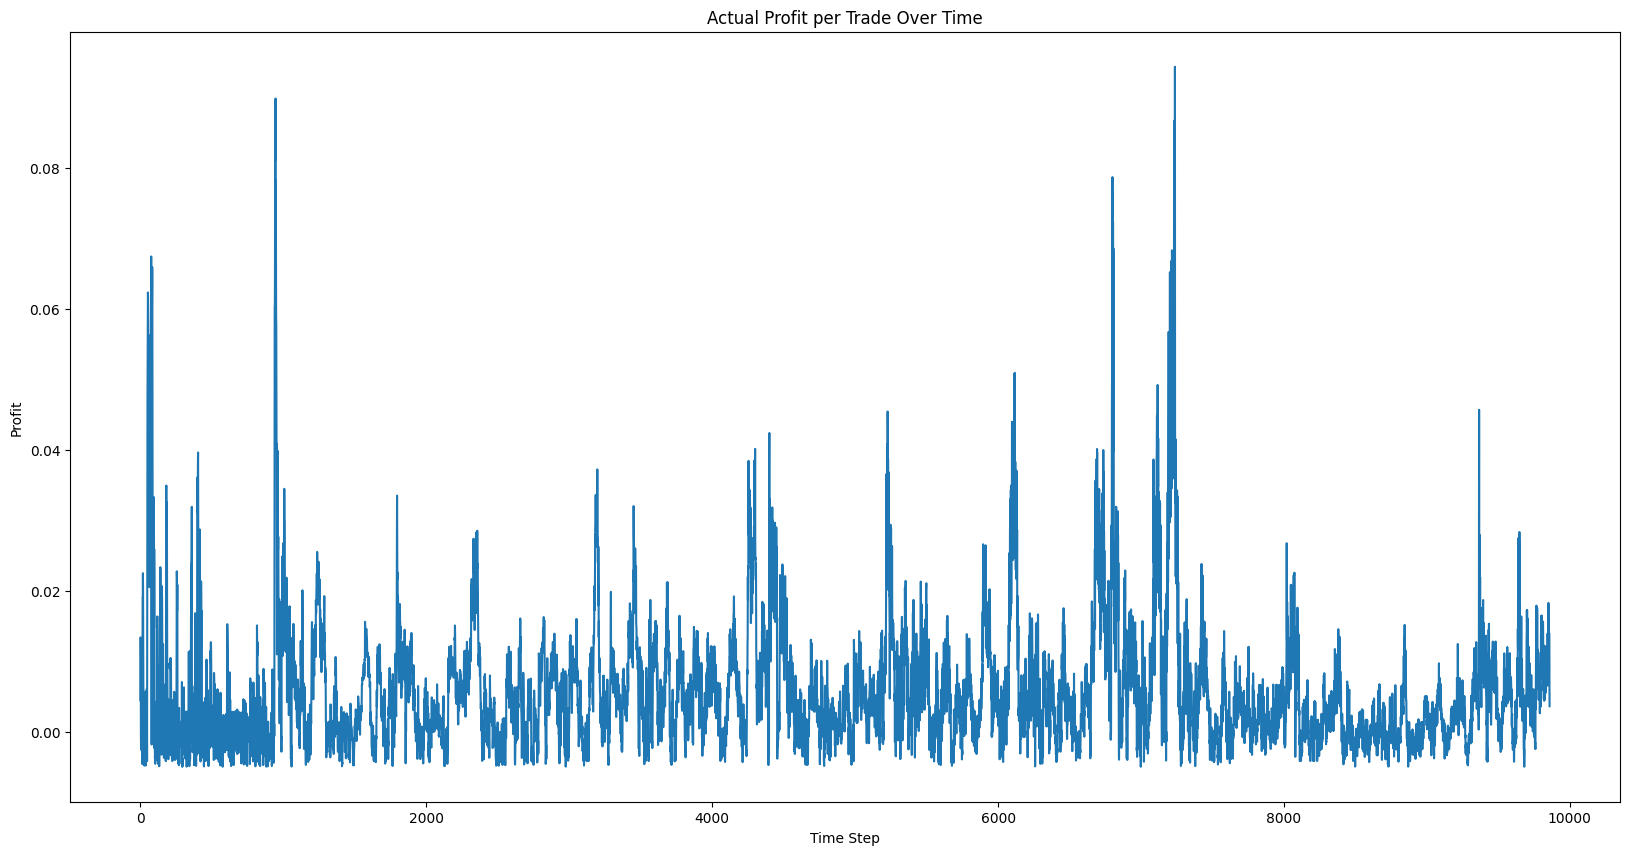

BTC_balance: 0.003482636318275316
USDT_balance: 47.09613157999995
total account value: 154.06377373584624


In [131]:
# flip strategy for high frequency noise, june 21 till now
# for 2M model, with stop loss, expoential growth, 5% position ratio, for June21toJul2 data
%reset -f
import pandas as pd
import numpy as np
import pandas as pd
from Get_balance import get_free_btc, get_free_usd, get_free_usdt
from joblib import dump, load
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import matplotlib.pyplot as plt

# define the stop loss ratio (e.g., 5%)
stop_loss = 0.005 # in US dollars

# define the wait time in terms of number of steps
wait_time_steps = 10 # in minutes

n_steps = 30

delta_t_trading = 60

historic_data_input_filename = "Data_from_June21toNow.csv"
historic_df = pd.read_csv(historic_data_input_filename)
historic_df=historic_df[['Open Time','Close', 'Volume']]
historic_df['Open Time'] = pd.to_datetime(historic_df['Open Time'])
historic_df['Open Time'] = historic_df['Open Time'].values.astype(np.int64) // 10 ** 9
historic_df = historic_df.sort_values('Open Time')

model_parameters_file = '../Prediction_Model/GradientBoosting/GB_model_data_2M_main_parameters_10000_1000_2_1_10_10.pkl'

paper_trading=True
symbol = 'BTC/USDT'
Exchange_Comission=0
position_ratio=0.05
quantity=0
type="MARKET"
trade_approved = False
num_approved_trades=0
trade_comission=0
global initial_run
initial_run = True

def fetch_historic_data(start, end):
    return historic_df[start : end].copy()

model = GradientBoostingRegressor(n_estimators=10000,  
                                  max_depth=1000,      
                                  min_samples_split=2,
                                  learning_rate=1, 
                                  min_samples_leaf=10,
                                  n_iter_no_change=10, 
                                  loss='squared_error')

model = joblib.load(model_parameters_file)

def trade_evaluation():

    global num_approved_trades
    global BTC_balance
    global USDT_balance
    global initial_run

    side=None

    if paper_trading==True and initial_run==True:
        U=1
        BTC_balance=0.00193116*U
        USDT_balance=47.79670558*U
        initial_run=False
    
    elif paper_trading==False:
        BTC_balance=get_free_btc()
        USDT_balance=get_free_usdt()
  
    # position ratio: 0.02
    # BTC_balance=0.00193116

    quantity_long=position_ratio*BTC_balance
    quantity_short=position_ratio*USDT_balance/current_price

    trade_comission_long=0
    trade_comission_short=0

    potential_profit_long=(predicted_price-current_price)*quantity_long
    potential_profit_short=-(predicted_price-current_price)*quantity_short

    if potential_profit_long > (trade_comission_long):
        side="BUY"
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_long
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    elif potential_profit_short> (trade_comission_short):
        side='SELL'
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_short
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    else:
        side='None'
        trade_approved=False


    if side=='BUY':
        quantity=quantity_long
        trade_comission=trade_comission_long
    elif side=='SELL':
        quantity=quantity_short
        trade_comission=trade_comission_short
    else:
        quantity=0
        trade_comission=0
    
    if quantity != 0 and quantity < 1e-4:
        quantity=1e-4
        if side=='BUY':
            side='SELL'
        elif side=='SELL':
            side='BUY'

    return trade_approved, side, quantity

prediction = []

start_point = 0
end_point = start_point + n_steps + 1
# start_point = 0
# end_point = start_point + n_steps + 1
iteration_step = 1

profit_per_trade_predicted_list = [] # profit_predicted_list is the storage of the profit of each trade over time
profit_per_trade_predicted = 0 # profit_predicted is the profit of the current trade
profit_per_trade_actual_list = [] # profit_per_trade_list is the profit of each trade
profit_per_trade_actual = 0 # profit_per_trade is the profit of the current trade
paper_account_profit_list = [] # paper_account_profit_list is the accumulated profit of the paper account
paper_account_profit=0 # paper_account_profit is the profit of the paper account at the current time step

while end_point < len(historic_df) and (end_point + 2 * delta_t_trading < len(historic_df)):

    df = fetch_historic_data(start_point, end_point) 
    df=df[['Open Time','Close', 'Volume']]

    predicting_index = df.columns.get_loc('Close')

    current_price = float(df.iloc[-1]['Close'])

    scaled_data = df.values

    X = []
    for i in range(n_steps, len(scaled_data)):
        X.append(scaled_data[i - n_steps:i])
    X = np.array(X)

    n_features = X.shape[2]
    X = X.reshape((X.shape[0], X.shape[1], n_features))

    # flatten input
    n_input = X.shape[1] * X.shape[2]
    X_flat = X.reshape((X.shape[0], n_input))

    predicted_price = model.predict(X_flat)

    trade_approved, side, quantity = trade_evaluation()

    if trade_approved:
        
        if paper_trading==True:

            if side=='SELL':

                sold_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_bought_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))
                USDT_balance += profit_per_trade_actual
                if profit_per_trade_actual < -stop_loss:
                    start_point += wait_time_steps
                    end_point += wait_time_steps
                    continue

            elif side=='BUY':

                purchased_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_sold_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                BTC_balance += profit_per_trade_actual/SecTrade_sold_price

                if profit_per_trade_actual < -stop_loss:
                    start_point += wait_time_steps
                    end_point += wait_time_steps
                    continue  # skip the rest of the loop and start a new iteration

                
    paper_account_profit_list.append(paper_account_profit)
    profit_per_trade_actual_list.append(profit_per_trade_actual)

    start_point += iteration_step
    end_point += iteration_step
    print("\rstart_point: {}".format(start_point), end="")

profit_account_actual_df = pd.DataFrame(paper_account_profit_list, columns=['Paper Account Profit'])
profit_per_trade_predicted_df = pd.DataFrame(profit_per_trade_predicted_list, columns=['Profit per Trade Predicted'])
profit_per_trade_actual_df = pd.DataFrame(profit_per_trade_actual_list, columns=['Profit per Trade Actual'])
profit_account_actual_df.to_csv('profit_account_actual_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_predicted_df.to_csv('profit_per_trade_predicted_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_actual_df.to_csv('profit_per_trade_actual_5Kdata_500Kmodel.csv', index=False)

plt.plot(paper_account_profit_list)
plt.title('Paper Account Profit Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_predicted_list)
plt.title('Predicted Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_actual_list)
plt.title('Actual Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

print("BTC_balance: {}".format(BTC_balance))
print("USDT_balance: {}".format(USDT_balance))
print("total account value: {}".format(BTC_balance*current_price+USDT_balance))

start_point: 1937625

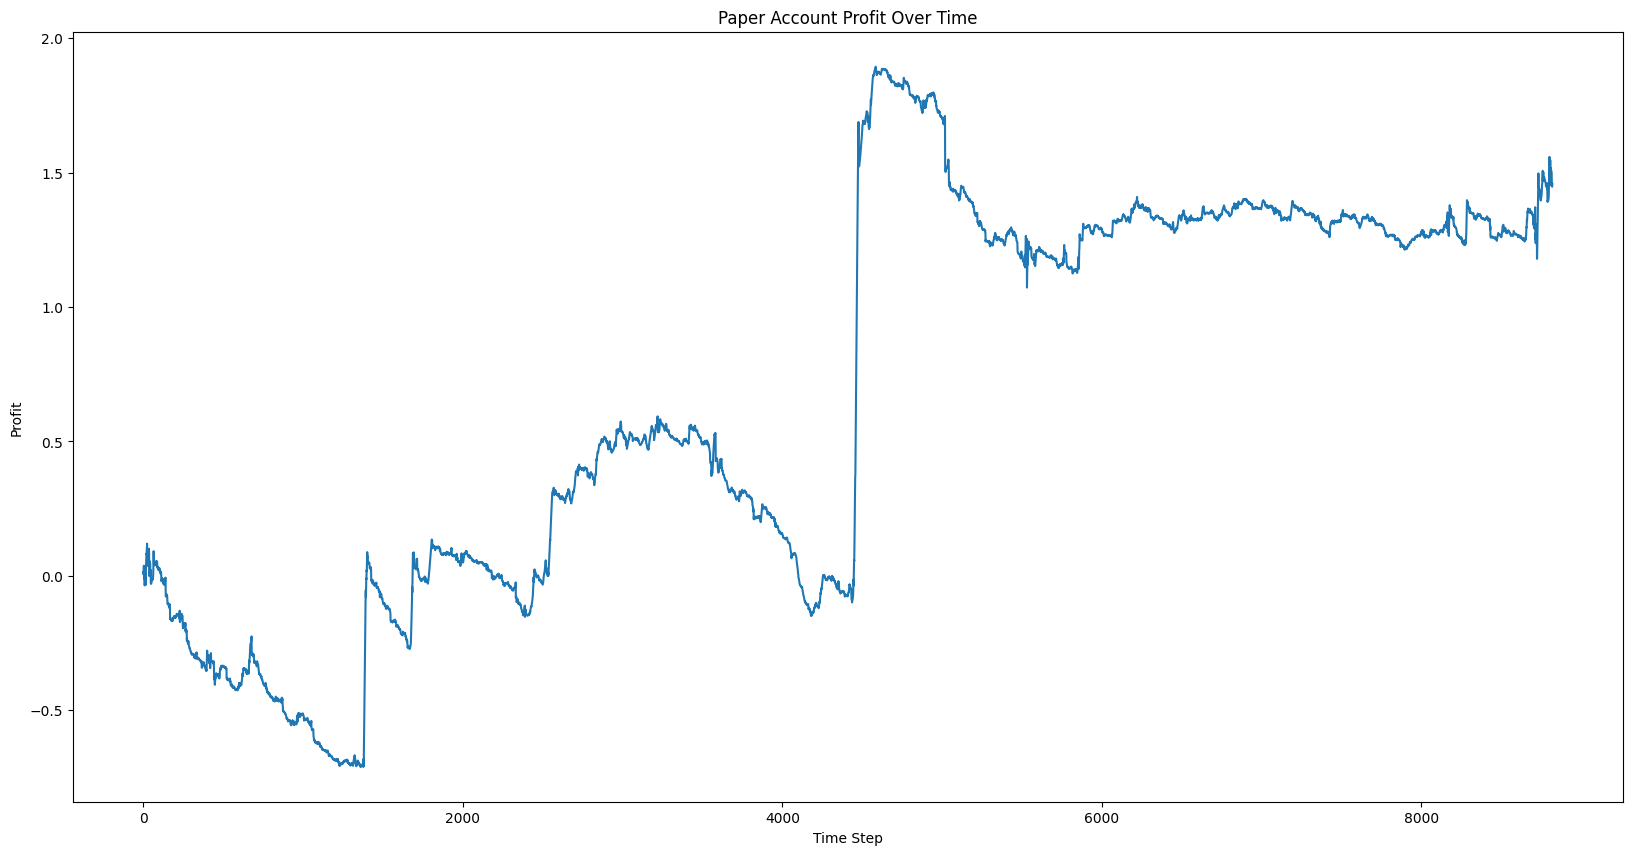

BTC_balance: 0.0019423357009327252
USDT_balance: 48.79351558000005
total account value: 104.87094210526988


In [132]:
# stop loss corrected, 20K
# stop_loss = 0.005
# for 2M model, with stop loss, expoential growth, 5% position ratio
%reset -f
import pandas as pd
import numpy as np
import pandas as pd
from Get_balance import get_free_btc, get_free_usd, get_free_usdt
from joblib import dump, load
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import matplotlib.pyplot as plt

# define the stop loss ratio (e.g., 5%)
stop_loss = 0.005 # in US dollars

# define the wait time in terms of number of steps
wait_time_steps = 10 # in minutes

n_steps = 30

delta_t_trading = 60

historic_data_input_filename = "../Prediction_Model/LSTM/BTCUSDT4Y1MKline_cleaned_24features_nSteps"+str(n_steps)+".csv"
historic_df = pd.read_csv(historic_data_input_filename)
historic_df=historic_df[['Open Time','Close', 'Volume']]

model_parameters_file = '../Prediction_Model/GradientBoosting/GB_model_data_2M_main_parameters_10000_1000_2_1_10_10.pkl'

paper_trading=True
symbol = 'BTC/USDT'
Exchange_Comission=0
position_ratio=0.05
quantity=0
type="MARKET"
trade_approved = False
num_approved_trades=0
trade_comission=0
global initial_run
initial_run = True

def fetch_historic_data(start, end):
    return historic_df[start : end].copy()

model = GradientBoostingRegressor(n_estimators=10000,  
                                  max_depth=1000,      
                                  min_samples_split=2,
                                  learning_rate=1, 
                                  min_samples_leaf=10,
                                  n_iter_no_change=10, 
                                  loss='squared_error')

model = joblib.load(model_parameters_file)

def trade_evaluation():

    global num_approved_trades
    global BTC_balance
    global USDT_balance
    global initial_run

    side=None

    if paper_trading==True and initial_run==True:
        U=1
        BTC_balance=0.00193116*U
        USDT_balance=47.79670558*U
        initial_run=False
    
    elif paper_trading==False:
        BTC_balance=get_free_btc()
        USDT_balance=get_free_usdt()
  
    # position ratio: 0.02
    # BTC_balance=0.00193116

    quantity_long=position_ratio*BTC_balance
    quantity_short=position_ratio*USDT_balance/current_price

    trade_comission_long=0
    trade_comission_short=0

    potential_profit_long=(predicted_price-current_price)*quantity_long
    potential_profit_short=-(predicted_price-current_price)*quantity_short

    if potential_profit_long > (trade_comission_long):
        side="BUY"
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_long
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    elif potential_profit_short> (trade_comission_short):
        side='SELL'
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_short
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    else:
        side='None'
        trade_approved=False


    if side=='BUY':
        quantity=quantity_long
        trade_comission=trade_comission_long
    elif side=='SELL':
        quantity=quantity_short
        trade_comission=trade_comission_short
    else:
        quantity=0
        trade_comission=0

    if quantity != 0 and quantity < 1e-4:
        quantity=1e-4
    if side=='BUY':
        side='SELL'
    elif side=='SELL':
        side='BUY'

    return trade_approved, side, quantity

prediction = []

start_point = len(historic_df) - 20000
end_point = start_point + n_steps + 1
# start_point = 0
# end_point = start_point + n_steps + 1
iteration_step = 1

profit_per_trade_predicted_list = [] # profit_predicted_list is the storage of the profit of each trade over time
profit_per_trade_predicted = 0 # profit_predicted is the profit of the current trade
profit_per_trade_actual_list = [] # profit_per_trade_list is the profit of each trade
profit_per_trade_actual = 0 # profit_per_trade is the profit of the current trade
paper_account_profit_list = [] # paper_account_profit_list is the accumulated profit of the paper account
paper_account_profit=0 # paper_account_profit is the profit of the paper account at the current time step

while end_point < len(historic_df) and (end_point + 2 * delta_t_trading < len(historic_df)):

    df = fetch_historic_data(start_point, end_point) 
    df=df[['Open Time','Close', 'Volume']]

    predicting_index = df.columns.get_loc('Close')

    current_price = float(df.iloc[-1]['Close'])

    scaled_data = df.values

    X = []
    for i in range(n_steps, len(scaled_data)):
        X.append(scaled_data[i - n_steps:i])
    X = np.array(X)

    n_features = X.shape[2]
    X = X.reshape((X.shape[0], X.shape[1], n_features))

    # flatten input
    n_input = X.shape[1] * X.shape[2]
    X_flat = X.reshape((X.shape[0], n_input))

    predicted_price = model.predict(X_flat)

    trade_approved, side, quantity = trade_evaluation()

    if trade_approved:
        
        if paper_trading==True:

            if side=='SELL':

                sold_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_bought_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))
                USDT_balance += profit_per_trade_actual
                if profit_per_trade_actual < -stop_loss:
                    start_point += wait_time_steps
                    end_point += wait_time_steps
                    continue

            elif side=='BUY':

                purchased_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_sold_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                BTC_balance += profit_per_trade_actual/SecTrade_sold_price

                if profit_per_trade_actual < -stop_loss:
                    start_point += wait_time_steps
                    end_point += wait_time_steps
                    continue  # skip the rest of the loop and start a new iteration

                
    paper_account_profit_list.append(paper_account_profit)
    profit_per_trade_actual_list.append(profit_per_trade_actual)

    start_point += iteration_step
    end_point += iteration_step
    print("\rstart_point: {}".format(start_point), end="")

profit_account_actual_df = pd.DataFrame(paper_account_profit_list, columns=['Paper Account Profit'])
profit_per_trade_predicted_df = pd.DataFrame(profit_per_trade_predicted_list, columns=['Profit per Trade Predicted'])
profit_per_trade_actual_df = pd.DataFrame(profit_per_trade_actual_list, columns=['Profit per Trade Actual'])
profit_account_actual_df.to_csv('profit_account_actual_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_predicted_df.to_csv('profit_per_trade_predicted_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_actual_df.to_csv('profit_per_trade_actual_5Kdata_500Kmodel.csv', index=False)

plt.plot(paper_account_profit_list)
plt.title('Paper Account Profit Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_predicted_list)
plt.title('Predicted Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_actual_list)
plt.title('Actual Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

print("BTC_balance: {}".format(BTC_balance))
print("USDT_balance: {}".format(USDT_balance))
print("total account value: {}".format(BTC_balance*current_price+USDT_balance))

start_point: 1937637

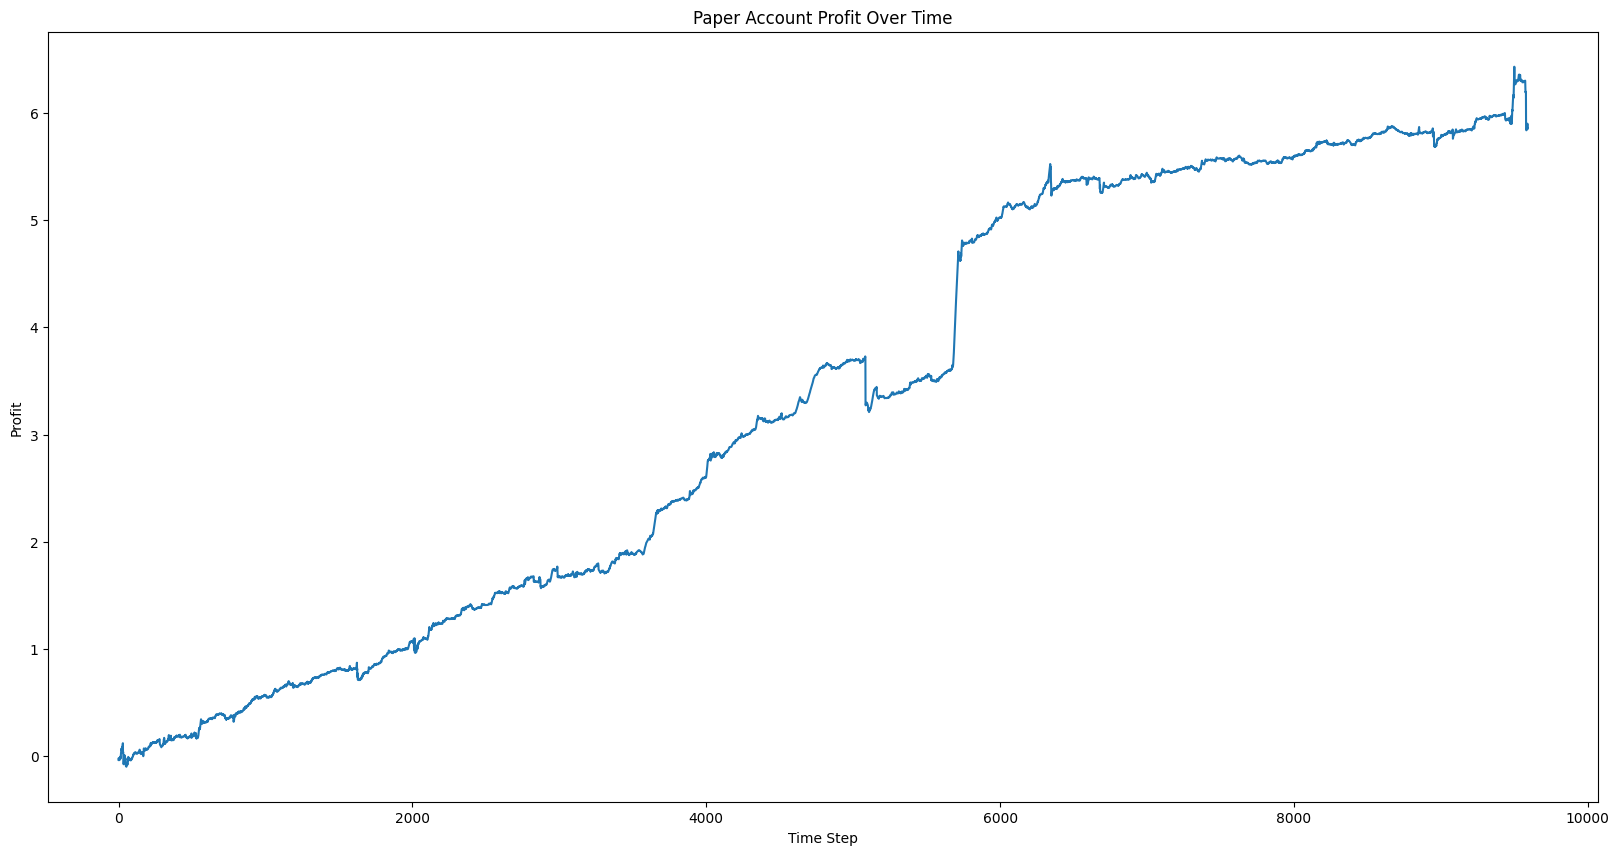

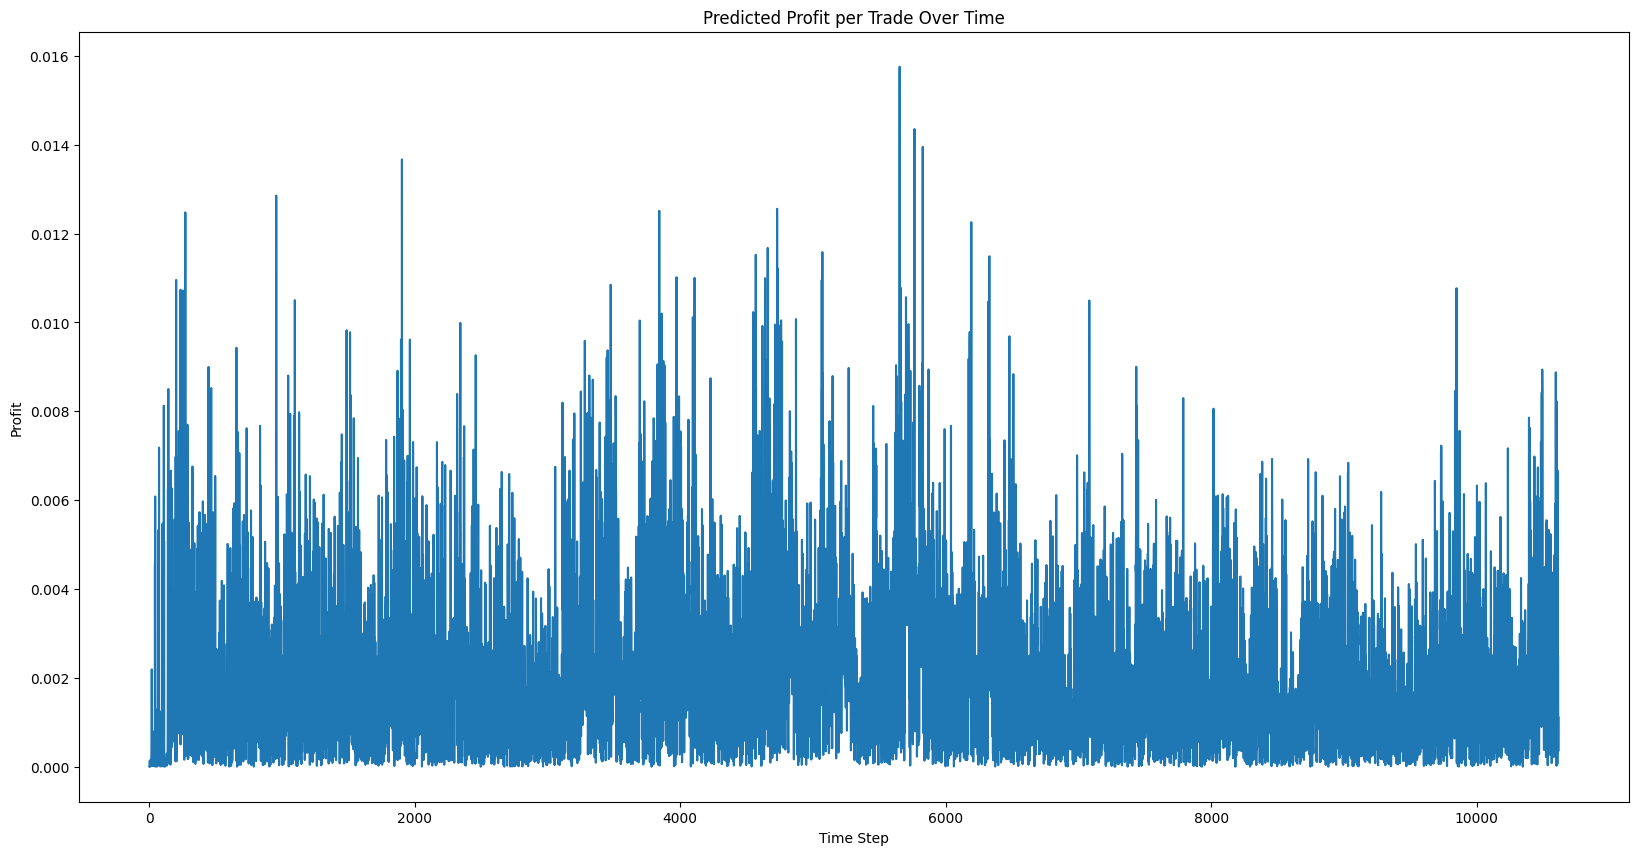

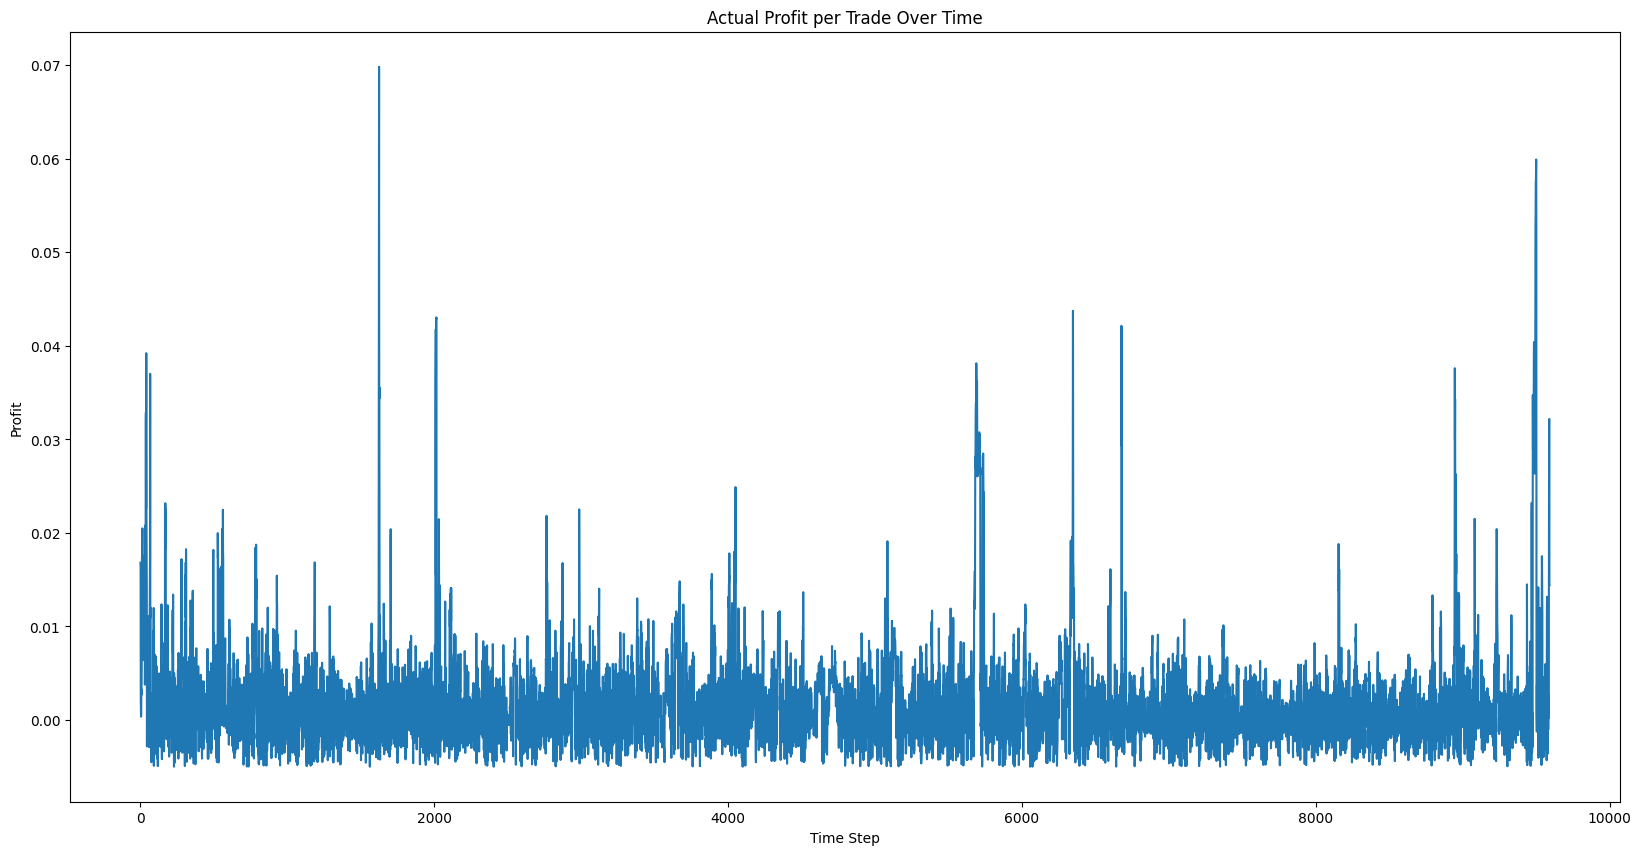

BTC_balance: 0.0021391714130267843
USDT_balance: 48.14935657999983
total account value: 109.92315070939601


In [133]:
# stop loss corrected, 20K
# stop_loss = 0.005
# for 2M model, with stop loss, expoential growth, 5% position ratio
%reset -f
import pandas as pd
import numpy as np
import pandas as pd
from Get_balance import get_free_btc, get_free_usd, get_free_usdt
from joblib import dump, load
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import matplotlib.pyplot as plt

# define the stop loss ratio (e.g., 5%)
stop_loss = 0.005 # in US dollars

# define the wait time in terms of number of steps
wait_time_steps = 10 # in minutes

n_steps = 30

delta_t_trading = 60

historic_data_input_filename = "../Prediction_Model/LSTM/BTCUSDT4Y1MKline_cleaned_24features_nSteps"+str(n_steps)+".csv"
historic_df = pd.read_csv(historic_data_input_filename)
historic_df=historic_df[['Open Time','Close', 'Volume']]

model_parameters_file = '../Prediction_Model/GradientBoosting/GB_model_data_2M_main_parameters_10000_1000_2_1_10_10.pkl'

paper_trading=True
symbol = 'BTC/USDT'
Exchange_Comission=0
position_ratio=0.05
quantity=0
type="MARKET"
trade_approved = False
num_approved_trades=0
trade_comission=0
global initial_run
initial_run = True

def fetch_historic_data(start, end):
    return historic_df[start : end].copy()

model = GradientBoostingRegressor(n_estimators=10000,  
                                  max_depth=1000,      
                                  min_samples_split=2,
                                  learning_rate=1, 
                                  min_samples_leaf=10,
                                  n_iter_no_change=10, 
                                  loss='squared_error')

model = joblib.load(model_parameters_file)

def trade_evaluation():

    global num_approved_trades
    global BTC_balance
    global USDT_balance
    global initial_run

    side=None

    if paper_trading==True and initial_run==True:
        U=1
        BTC_balance=0.00193116*U
        USDT_balance=47.79670558*U
        initial_run=False
    
    elif paper_trading==False:
        BTC_balance=get_free_btc()
        USDT_balance=get_free_usdt()
  
    # position ratio: 0.02
    # BTC_balance=0.00193116

    quantity_long=position_ratio*BTC_balance
    quantity_short=position_ratio*USDT_balance/current_price

    trade_comission_long=0
    trade_comission_short=0

    potential_profit_long=(predicted_price-current_price)*quantity_long
    potential_profit_short=-(predicted_price-current_price)*quantity_short

    if potential_profit_long > (trade_comission_long):
        side="BUY"
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_long
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    elif potential_profit_short> (trade_comission_short):
        side='SELL'
        trade_approved=True
        num_approved_trades+=1
        profit__per_trade_predicted = potential_profit_short
        profit_per_trade_predicted_list.append(profit__per_trade_predicted)

    else:
        side='None'
        trade_approved=False


    if side=='BUY':
        quantity=quantity_long
        trade_comission=trade_comission_long
    elif side=='SELL':
        quantity=quantity_short
        trade_comission=trade_comission_short
    else:
        quantity=0
        trade_comission=0

    if quantity != 0 and quantity < 1e-4:
        quantity=1e-4

    return trade_approved, side, quantity

prediction = []

start_point = len(historic_df) - 20000
end_point = start_point + n_steps + 1
# start_point = 0
# end_point = start_point + n_steps + 1
iteration_step = 1

profit_per_trade_predicted_list = [] # profit_predicted_list is the storage of the profit of each trade over time
profit_per_trade_predicted = 0 # profit_predicted is the profit of the current trade
profit_per_trade_actual_list = [] # profit_per_trade_list is the profit of each trade
profit_per_trade_actual = 0 # profit_per_trade is the profit of the current trade
paper_account_profit_list = [] # paper_account_profit_list is the accumulated profit of the paper account
paper_account_profit=0 # paper_account_profit is the profit of the paper account at the current time step

while end_point < len(historic_df) and (end_point + 2 * delta_t_trading < len(historic_df)):

    df = fetch_historic_data(start_point, end_point) 
    df=df[['Open Time','Close', 'Volume']]

    predicting_index = df.columns.get_loc('Close')

    current_price = float(df.iloc[-1]['Close'])

    scaled_data = df.values

    X = []
    for i in range(n_steps, len(scaled_data)):
        X.append(scaled_data[i - n_steps:i])
    X = np.array(X)

    n_features = X.shape[2]
    X = X.reshape((X.shape[0], X.shape[1], n_features))

    # flatten input
    n_input = X.shape[1] * X.shape[2]
    X_flat = X.reshape((X.shape[0], n_input))

    predicted_price = model.predict(X_flat)

    trade_approved, side, quantity = trade_evaluation()

    if trade_approved:
        
        if paper_trading==True:

            if side=='SELL':

                sold_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_bought_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (-(SecTrade_bought_price-sold_price)*(quantity)*(1-Exchange_Comission))
                USDT_balance += profit_per_trade_actual
                if profit_per_trade_actual < -stop_loss:
                    start_point += wait_time_steps
                    end_point += wait_time_steps
                    continue

            elif side=='BUY':

                purchased_price = float(fetch_historic_data(start_point, end_point).iloc[-1]['Close'])
                SecTrade_sold_price = float(fetch_historic_data(end_point, end_point + delta_t_trading).iloc[-1]['Close'])
                paper_account_profit += (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                profit_per_trade_actual = (+(SecTrade_sold_price-purchased_price)*(quantity)*(1-Exchange_Comission))
                BTC_balance += profit_per_trade_actual/SecTrade_sold_price

                if profit_per_trade_actual < -stop_loss:
                    start_point += wait_time_steps
                    end_point += wait_time_steps
                    continue  # skip the rest of the loop and start a new iteration

                
    paper_account_profit_list.append(paper_account_profit)
    profit_per_trade_actual_list.append(profit_per_trade_actual)

    start_point += iteration_step
    end_point += iteration_step
    print("\rstart_point: {}".format(start_point), end="")

profit_account_actual_df = pd.DataFrame(paper_account_profit_list, columns=['Paper Account Profit'])
profit_per_trade_predicted_df = pd.DataFrame(profit_per_trade_predicted_list, columns=['Profit per Trade Predicted'])
profit_per_trade_actual_df = pd.DataFrame(profit_per_trade_actual_list, columns=['Profit per Trade Actual'])
profit_account_actual_df.to_csv('profit_account_actual_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_predicted_df.to_csv('profit_per_trade_predicted_5Kdata_500Kmodel.csv', index=False)
profit_per_trade_actual_df.to_csv('profit_per_trade_actual_5Kdata_500Kmodel.csv', index=False)

plt.plot(paper_account_profit_list)
plt.title('Paper Account Profit Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_predicted_list)
plt.title('Predicted Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

plt.plot(profit_per_trade_actual_list)
plt.title('Actual Profit per Trade Over Time')
plt.xlabel('Time Step')
plt.ylabel('Profit')
plt.show()

print("BTC_balance: {}".format(BTC_balance))
print("USDT_balance: {}".format(USDT_balance))
print("total account value: {}".format(BTC_balance*current_price+USDT_balance))